## Import Statements

In [2]:
import ijson
import json
import random
from decimal import Decimal
from tqdm import tqdm
import networkx as nx
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Citation Network Analysis

Below we are analyzing the academic citation network located here: https://www.aminer.cn/citation

Specifically we are looking at v14 in this notebook. We will be subsampling due to the large size of the dataset.

## Subsampling and Reading in Data

In [11]:
#Accidentally ran so now commenting out to prevent repeating

# input_file = "dblp_v14.json"
# output_file = "subsampled_v14_1percent.json"
# sample_prob = 0.01  # Keep some % of records

# def convert_decimal(obj):
#     if isinstance(obj, Decimal):
#         return float(obj)
#     raise TypeError(f"Type {type(obj)} not serializable")

# with open(input_file, "r") as f, open(output_file, "w") as fout:
#     items = ijson.items(f, "item")
#     subset = [item for item in items if random.random() < sample_prob]

#     json.dump(subset, fout, indent=4, default=convert_decimal)

# print("Subsampling complete.")

Subsampling complete.


In [6]:
with open('subsampled_v14.json', 'r') as file:
    data = json.load(file)

In [20]:
with open('subsampled_v14_1percent.json', 'r') as file:
    data = json.load(file)

## Early Basic Analysis

Looking at simple analysis to start understanding a dataset.

In [8]:
type(data)

list

In [4]:
data[0]

{'id': '53e9978ab7602d9701f47342',
 'title': 'Causation',
 'doi': '10.1007/BF01054036',
 'issue': '6',
 'keywords': [],
 'lang': 'en',
 'venue': {'raw': 'Journal of Philosophical Logic'},
 'year': 1993,
 'n_citation': 19,
 'page_start': '563',
 'page_end': '588',
 'volume': '22',
 'issn': '1573-0433',
 'isbn': '',
 'url': ['http://dx.doi.org/10.1007/BF01054036',
  'http://link.springer.com/article/10.1007/BF01054036'],
 'abstract': "As cause we often specify an event the occurrence of which first guaranteed that of the effect. This notion is explicated in a framework of branching worlds in Sections I to V. VI and VII point out its close relations to the concept of an agent's bringing about an event. The topic of the last two sections is the distinction between causes and necessary circumstances. For this purpose conditionals are used, interpreted with respect to branching worlds without a similarity relation between them.",
 'authors': [{'id': '53f4757ddabfaee4dc88a39f',
   'name': 'Fr

In [10]:
data[1]

{'id': '53e9978db7602d9701f517e6',
 'title': 'Wirtschaftsinformatik',
 'doi': '',
 'issue': '',
 'keywords': [],
 'lang': 'en',
 'venue': {'raw': 'Informatik: Grundlagen - Amwendungen - Perspektiven [Forum "Perspektiven der Informatik", Dagstuhl, November 1993]'},
 'year': 1993,
 'n_citation': 1106,
 'page_start': '23',
 'page_end': '25',
 'volume': '',
 'issn': '',
 'isbn': '3-406-40338-7',
 'url': [],
 'abstract': '',
 'authors': [{'id': '', 'name': 'Peter Mertens', 'org': ''}],
 'doc_type': 'Conference'}

In [11]:
data[2]

{'id': '53e99796b7602d9701f5d865',
 'title': 'FIZ Karlsruhe',
 'doi': '',
 'issue': '3',
 'keywords': ['FIZ Karlsruhe'],
 'lang': 'en',
 'venue': {'raw': 'Information Services and Use'},
 'year': 2005,
 'n_citation': 0,
 'page_start': '203',
 'page_end': '204',
 'volume': '25',
 'issn': '',
 'isbn': '',
 'url': [],
 'abstract': '',
 'authors': [{'id': '53f4573fdabfaefedbb53924',
   'name': 'R&#252/diger Mack',
   'org': 'FIZ Karlsruhe, Hermann-von-Helmholtz-Platz 1, 76344 Eggenstein-Leopoldshafen/Germany Tel.: +49 7247 808 513/ Fax: +49 7247 808 136/ E-mail: Ruediger.Mack@fiz-karlsruhe.de.'}],
 'doc_type': 'Journal'}

In [12]:
data[-1]

{'id': '63ac35c6d88656000c1106a8',
 'title': 'The Airborne and Satellite Investigation of Asian Air Quality (Asia-Aq): An Opportunity for International Collaboration.',
 'doi': '10.1109/IGARSS46834.2022.9883819',
 'issue': '',
 'keywords': [],
 'lang': 'en',
 'venue': {'raw': 'IEEE International Geoscience and Remote Sensing Symposium (IGARSS)'},
 'year': 2022,
 'n_citation': 0,
 'page_start': '6506',
 'page_end': '6509',
 'volume': '',
 'issn': '',
 'isbn': '',
 'url': ['https://scholar.google.com.hk/citations?view_op=view_citation&hl=zh-CN&user=vX5XCJMAAAAJ&pagesize=100&sortby=pubdate&citation_for_view=vX5XCJMAAAAJ:MpfHP-DdYjUC',
  'https://doi.org/10.1109/IGARSS46834.2022.9883819'],
 'abstract': '',
 'authors': [{'id': '', 'name': 'jh crawford', 'org': ''},
  {'id': '', 'name': 'k travis', 'org': ''},
  {'id': '', 'name': 'l judd', 'org': ''},
  {'id': '', 'name': 'b lefer', 'org': ''},
  {'id': '', 'name': 'j dibb', 'org': ''},
  {'id': '', 'name': 'j kim', 'org': ''},
  {'id': '',

In [16]:
ref_index = []
for i in data:
    if 'references' in i.keys():
        if len(i['references']) > 0:
            ref_index.append(data.index(i))

I've done this a better way below.

In [23]:
len(ref_index)

163210

In [24]:
len(data)

262595

In [17]:
len(ref_index)/len(data)

0.6262040197193781

About 63% of the node

In [27]:
data[ref_index[0]]

{'id': '53e997bdb7602d9701fa5fe1',
 'title': 'Tracing Traitors',
 'doi': '10.1007/3-540-48658-5_25',
 'issue': '3',
 'keywords': ['help trace',
  'pay television',
  'large set',
  'authorized user',
  'cryptographic scheme',
  'database access system',
  'proprietary data',
  'Tracing Traitors',
  'Broadcast Encryption scheme'],
 'lang': 'en',
 'venue': {'raw': 'International Crytology Conference'},
 'year': 2000,
 'n_citation': 889,
 'page_start': '257',
 'page_end': '270',
 'volume': '46',
 'issn': '',
 'isbn': '3-540-58333-5',
 'url': ['http://dx.doi.org/10.1007/3-540-48658-5_25',
  'https://static.aminer.org/pdf/20170130/pdfs/index.txt',
  'http://dx.doi.org/10.1109/18.841169'],
 'abstract': ' We give cryptographic schemes that help trace the source of leaks when sensitive or proprietary data is made available to a large set of parties. A very relevant application is in the context of pay television, where only paying customers should be able to view certain programs. In this appl

In [3]:
id_list = []

for paper in tqdm(data):
    id_list.append(paper['id'])
print(len(id_list))

100%|██████████| 262595/262595 [00:00<00:00, 1922032.21it/s]

262595


In [4]:
id_ref_dict = {}

for paper in tqdm(data):
    if 'references' in paper.keys():
        id_ref_dict[paper['id']] = paper['references']
    else:
        id_ref_dict[paper['id']] = []

100%|██████████| 262595/262595 [00:02<00:00, 95725.83it/s]  


In [35]:
len(id_ref_dict)

262595

In [37]:
id_ref_dict

{'53e9978ab7602d9701f47342': [],
 '53e9978db7602d9701f517e6': [],
 '53e99796b7602d9701f5d865': [],
 '53e997bdb7602d9701fa5fe1': ['53e99858b7602d97020923bb',
  '53e9a9f0b7602d9703359ad4',
  '53e9b5e6b7602d9704138a3a',
  '53e9ba95b7602d97046c03d8',
  '53e9bba1b7602d97047eaa02',
  '53e9be0eb7602d9704ac49e2'],
 '53e997d7b7602d9701fcb029': ['53e9bb8db7602d97047d767d'],
 '53e997f5b7602d9701ffb8c3': ['53e999a6b7602d97021ec630',
  '53e99ad1b7602d97023541d6',
  '53e99d3eb7602d97025f445b',
  '53e9a1d5b7602d9702ad1d49',
  '53e9a58cb7602d9702eb5459',
  '53e9a974b7602d97032ce127',
  '53e9ac13b7602d97035d7993',
  '53e9ad42b7602d97037244c5',
  '53e9b023b7602d9703a812da',
  '53e9bcb3b7602d970493373f',
  '558aa49de4b0b32fcb38029b'],
 '53e997f8b7602d9701ffec20': [],
 '53e997f9b7602d97020038ca': ['53e999eeb7602d9702232e7e',
  '53e9af5ab7602d970399e28b'],
 '53e99808b7602d970201a746': ['53e99866b7602d97020a09de',
  '53e99d6cb7602d97026285ce',
  '53e99f94b7602d9702866efc',
  '53e9a2fab7602d9702c02211',
  '5

Can also try approach of converting into a form like {ID: References}

#### How to get turn this into a network
Get list of ID's and feed into a networkx graph. Then use references for directed edges

Consider if we have node A in this graph that references a paper B not in the node list. Need to verify if including (A,B) edge adds B as a node automatically or if we need to handle this some way. These sorts of nodes will be dead ends basically.

Could also just extract all ids, even in references, as a master list and use it to create nodes, then use the id_ref_dict above as my edges.

Also look into node attributes in networkx, this is a way of applying attributes to a node to include relevant info like keywords if we go that route.

For now I'm just gonna test getting it into a graph.

In [5]:
G = nx.Graph()
G.add_nodes_from(id_list)

beautiful

In [6]:
id_ref_tups = []

for paper in id_ref_dict:
    ref_len = len(id_ref_dict[paper])
    if ref_len > 0:
        for i in range(ref_len):
            id_ref_tups.append((paper, id_ref_dict[paper][i]))
print(len(id_ref_tups))

1831452


In [7]:
G.add_edges_from(id_ref_tups)

I'll note here that I ran G.edges in a cell and it caused my notebook to crash. Long and short, don't do that.

Also may be a cause for concern later when we get to heavier calculations. We'll need to get to the calculations of stuff to find out if we get into dangerous territory with runtimes or crashes. If we dont, then I think we may want to consider adding nodes.

#### Reducing Data Size
Need to consider cutting out data that aren't references and IDs. This may allow us to significantly reduce the data size and get more data in. This is valuable because it allows us to capture more of the relationships we'll miss due to having to subsample. My though is we can store these aspects of the data in multiple json files. The main json will be the ID and references. The ancillary json could include the extra metadata paired to the ID allowing us to return to it later. We could even break this down into multiple sub-jsons, perhaps broken up to allow us to load efficiently.

Need to look into ways to do this. May just be modifying the subsampling function up above.

Also we could consider reencoding the IDs. After all an id of 53e9addbb7602d97037e6b69 reencoded as, lets say, 0 is a much smaller footprint. Even reencoded as 250000 is much smaller.

#### Next Steps
Start checking centralities and look into info for the X highest. Also look at group centralities and diameter and such. Katz centrality in particular likely to be interesting to us as it seems to fit academic citations the best.

In [8]:
deg_cent = nx.degree_centrality(G)

In [10]:
deg_cent

{'53e9978ab7602d9701f47342': 0.0,
 '53e9978db7602d9701f517e6': 0.0,
 '53e99796b7602d9701f5d865': 0.0,
 '53e997bdb7602d9701fa5fe1': 1.4436933801502471e-05,
 '53e997d7b7602d9701fcb029': 1.0312095572501765e-06,
 '53e997f5b7602d9701ffb8c3': 1.1343305129751941e-05,
 '53e997f8b7602d9701ffec20': 0.0,
 '53e997f9b7602d97020038ca': 3.0936286717505295e-06,
 '53e99808b7602d970201a746': 2.4749029374004236e-05,
 '53e99808b7602d970201b4dc': 4.124838229000706e-06,
 '53e99818b7602d970203048d': 8.249676458001412e-06,
 '53e998afb7602d97020e75b4': 0.0,
 '53e9993fb7602d970217a39b': 9.384006970976606e-05,
 '53e99945b7602d9702181b9b': 0.0,
 '53e99a2fb7602d970228b23e': 8.249676458001412e-06,
 '53e99a52b7602d97022b732e': 8.249676458001412e-06,
 '53e99a62b7602d97022d176d': 0.0,
 '53e99a67b7602d97022d6d5c': 2.062419114500353e-06,
 '53e99a6db7602d97022dabb0': 3.0936286717505295e-06,
 '53e99a73b7602d97022e0754': 1.0312095572501765e-06,
 '53e99a85b7602d97022fb22e': 1.0312095572501765e-06,
 '53e99abeb7602d970233d8ee

In [11]:
max_node = max(deg_cent, key=deg_cent.get)
max_value = deg_cent[max_node]

In [12]:
print(max_node)
print(max_value)

55503fe145ce0a409eb30ba8
0.0008435294178306444


In [13]:
deg_cent = dict(G.degree())
max_node = max(deg_cent, key=deg_cent.get)
max_value = deg_cent[max_node]
print(max_node)
print(max_value)

55503fe145ce0a409eb30ba8
818


In [15]:
len(G.nodes)

969736

## Analysis Proper

Try making analysis tools to play with graph.

First Step:
Make graph, ancillary functions


### Analysis Tools

In [3]:
def make_v14_graph(data, dir='dir'):
    '''
    Make data dict, get them into nodes and edges
    '''
    
    # make dict function
    id_ref_dict = make_v14_dict(data)
    id_ref_tups = make_v14_tups(id_ref_dict)

    if dir == 'dir':
        G = nx.DiGraph()    
        G.add_nodes_from(id_ref_dict.keys())
        G.add_edges_from(id_ref_tups)
    elif dir == 'undir':
        G = nx.Graph()    
        G.add_nodes_from(id_ref_dict.keys())
        G.add_edges_from(id_ref_tups)
    else:
        return print("Input Error: Input 'dir' or 'undir' for Directed or Undirected graph type.")

    return G


def make_v14_dict(data):
    id_ref_dict = {}
    for paper in data:
        if 'references' in paper.keys():
            id_ref_dict[paper['id']] = paper['references']
        else:
            id_ref_dict[paper['id']] = []

    return id_ref_dict

def make_v14_tups(id_ref_dict):
    id_ref_tups = []

    for paper in id_ref_dict:
        ref_len = len(id_ref_dict[paper])
        if ref_len > 0:
            for i in range(ref_len):
                id_ref_tups.append((paper, id_ref_dict[paper][i]))

    return id_ref_tups

def make_ref_dict(data):
    ref_dict = {}
    for paper in data:
        ref_dict[paper['id']] = paper
    return ref_dict

### Basic Topological Features

In [4]:
G = make_v14_graph(data,dir='undir')

print(len(G.nodes))
print(len(G.edges))

285845
332189


In [25]:
ref_dict = make_ref_dict(data)
print(len(ref_dict))

52740


#### Making Analysis Functions



In [5]:
# VERY fast
deg_cent = nx.degree_centrality(G)
max_node = max(deg_cent, key=deg_cent.get)
max_value = deg_cent[max_node]

print(max_node)
print(max_value)

53e9b86db7602d9704436356
0.002480373910244749


In [29]:
max_value * (len(G.nodes)-1)

709.0

In [26]:
ref_dict['53e9b86db7602d9704436356']

{'id': '53e9b86db7602d9704436356',
 'title': 'Comprehensive frequency-dependent substrate noise analysis using boundary element methods',
 'doi': '10.1109/ICCAD.2002.1167506',
 'issue': '',
 'keywords': ['preliminary result',
  "green's function",
  'comprehensive methodology',
  'integrated circuit interconnections',
  'comprehensive frequency-dependent substrate noise',
  'integrated circuit modelling',
  'arbitrary substrate',
  'substrate noise analysis',
  'substrate noise coupling',
  'circuit layout cad',
  'boundary element method',
  'boundary-elements methods',
  'frequency-dependent substrate noise analysis',
  'substrate transfer resistance extraction',
  "green's function methods",
  'electrodynamic modeling',
  'substrate noise modeling',
  'integrated circuit noise',
  'boundary element methods',
  'electric resistance',
  'integrated circuit layout',
  'efficient method',
  'modeling',
  'doping profiles',
  'substrate doping profiles'],
 'lang': 'en',
 'venue': {'raw':

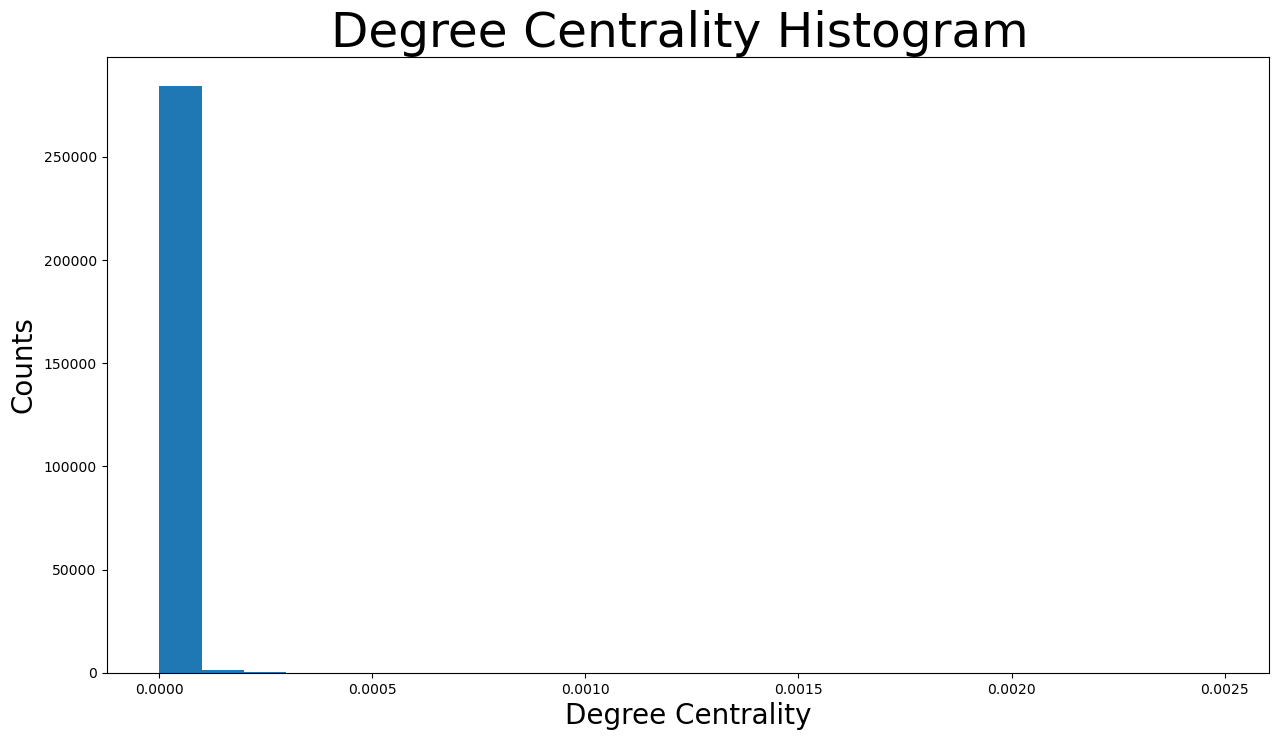

In [34]:
plt.figure(figsize=(15, 8))
plt.hist(deg_cent.values(), bins=25)
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

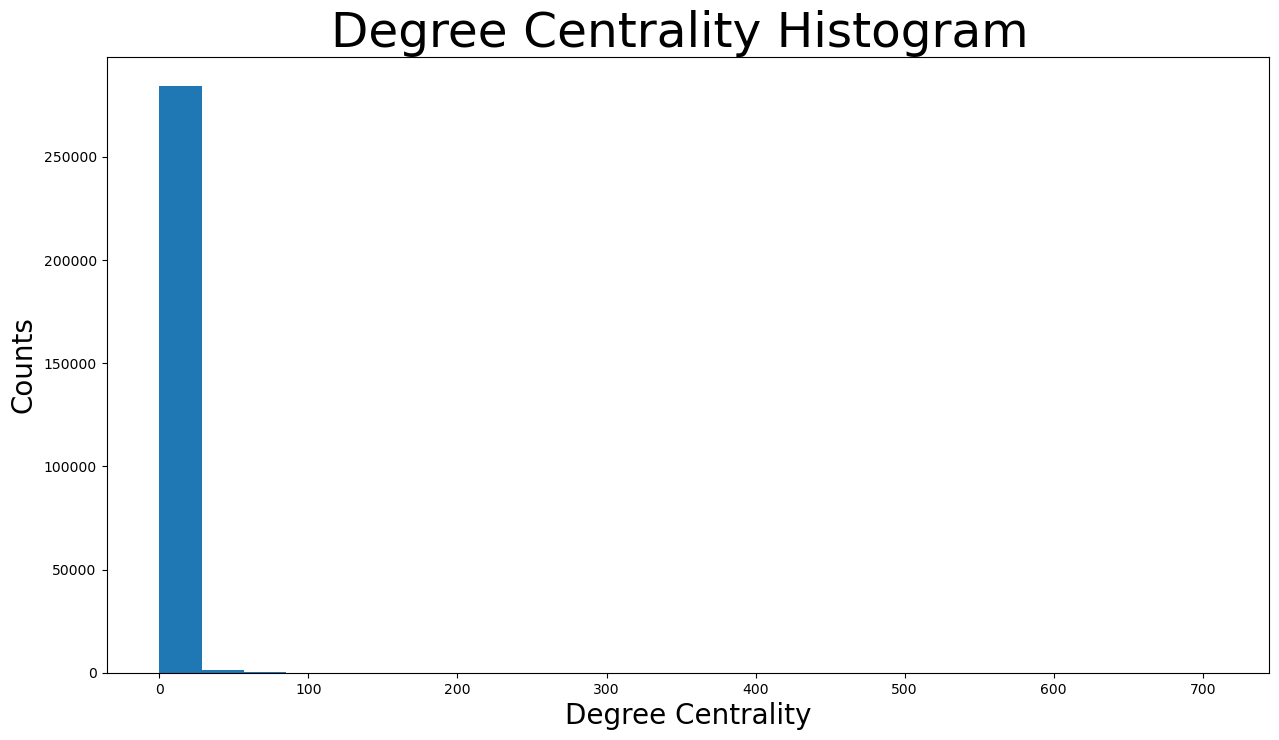

In [47]:
test = list(deg_cent.values())
test2 = np.array(test)*(len(G.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [13]:
i = 0
for k in tqdm(deg_cent):
    if deg_cent[k] > 0:
        i += 1
print(i)

100%|██████████| 285845/285845 [00:00<00:00, 3243552.58it/s]

266343


In [32]:
np.mean(list(deg_cent.values()))

8.131217206621696e-06

In [22]:
np.mean(list(deg_cent.values()))*(len(G.nodes)-1)

2.324259651209572

In [21]:
i = 0
for k in tqdm(deg_cent):
    if deg_cent[k] == 0:
        i += 1
print(i)

100%|██████████| 285845/285845 [00:00<00:00, 3682245.82it/s]

19502


In [51]:
i = 0
for k in tqdm(deg_cent):
    if deg_cent[k] == (1/(len(G.nodes)-1)):
        i += 1
print(i)

100%|██████████| 285845/285845 [00:00<00:00, 2209971.94it/s]

190684


In [52]:
i = 0
for k in tqdm(deg_cent):
    if deg_cent[k] > (1/(len(G.nodes)-1)):
        i += 1
print(i)

100%|██████████| 285845/285845 [00:00<00:00, 2277507.28it/s]

75659


What the above analysis is showing is that our network is dominated by nodes that are single connections. This is likely due to the way a large portion of our nodes are added only as connections of edges. This is a potential way to filter for more interesting nodes. that aren't trivially connected at the edges. We could even consider taking the above 1 edge situation as the actual graph and add back in the nodes with real connections to these.

Idea, in-degree and out degree can resolve these. Below I use the 1% subsample in a directed graph

In [21]:
G = make_v14_graph(data,dir='dir')

print(len(G.nodes))
print(len(G.edges))

285845
332204


In [22]:
indeg_cent = nx.in_degree_centrality(G)
max_node_in = max(indeg_cent, key=indeg_cent.get)
max_value_in = indeg_cent[max_node_in]

print(max_node_in)
print(max_value_in)

573696026e3b12023e515eec
0.0003918221127608066


In [92]:
print(max_value_in * (len(G.nodes)-1))

112.0


In [28]:
i = 0
for k in indeg_cent:
    if indeg_cent[k] == 0:
        i += 1
print(i)

50132


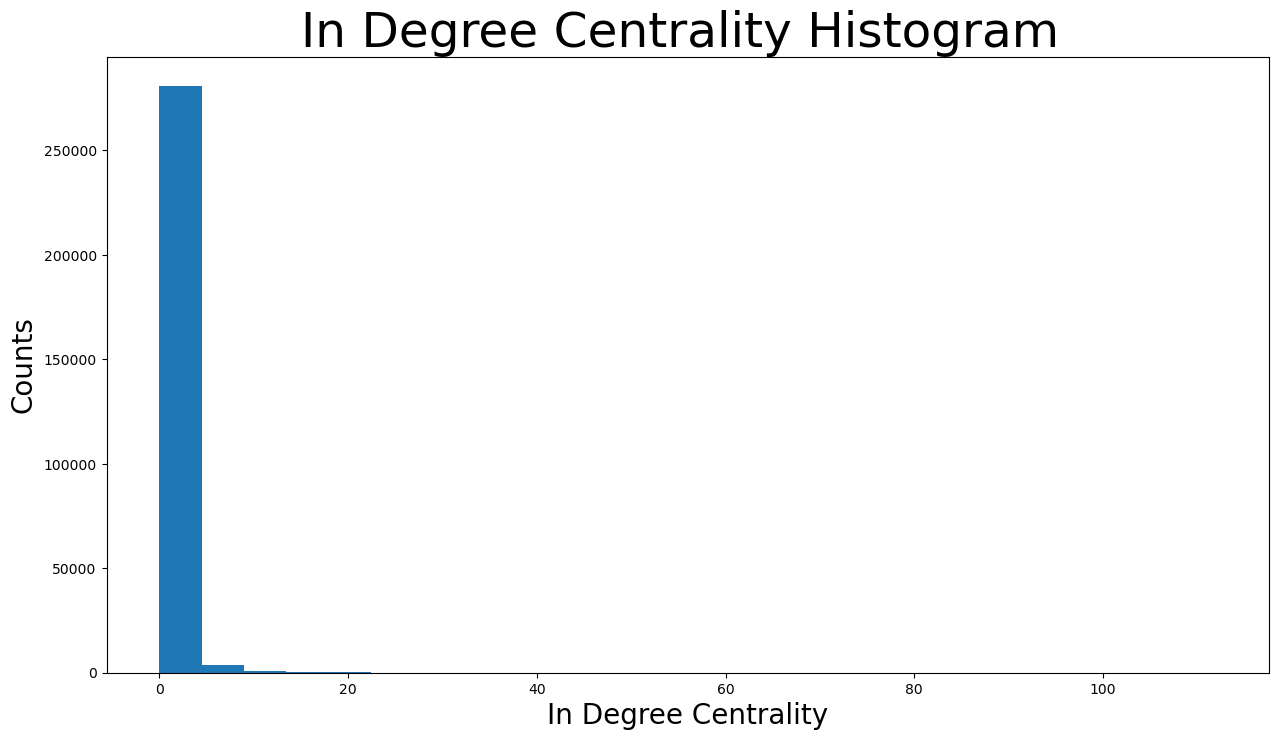

In [7]:
test = list(indeg_cent.values())
test2 = np.array(test)*(len(G.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("In Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("In Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [13]:
print(np.mean([d for _, d in G.in_degree()]))
print(np.max([d for _, d in G.in_degree()]))
print(np.min([d for _, d in G.in_degree()]))

1.1621823015970194
112
0


In [33]:
i = 0
for k in indeg_cent:
    normed = indeg_cent[k]*(len(G.nodes)-1)
    if normed == 1:
        i += 1
print(i)

189243


In [36]:
len(G.nodes) - 189243

96602

In [38]:
i = 0
for k in indeg_cent:
    normed = indeg_cent[k]*(len(G.nodes)-1)
    if normed > 1:
        i += 1
print(i)

46470


In [37]:
i = 0
for k in indeg_cent:
    normed = indeg_cent[k]*(len(G.nodes)-1)
    if normed == 2:
        i += 1
print(i)

29607


In [23]:
outdeg_cent = nx.out_degree_centrality(G)
max_node_out = max(outdeg_cent, key=outdeg_cent.get)
max_value_out = outdeg_cent[max_node_out]

print(max_node_out)
print(max_value_out)

53e9b86db7602d9704436356
0.002480373910244749


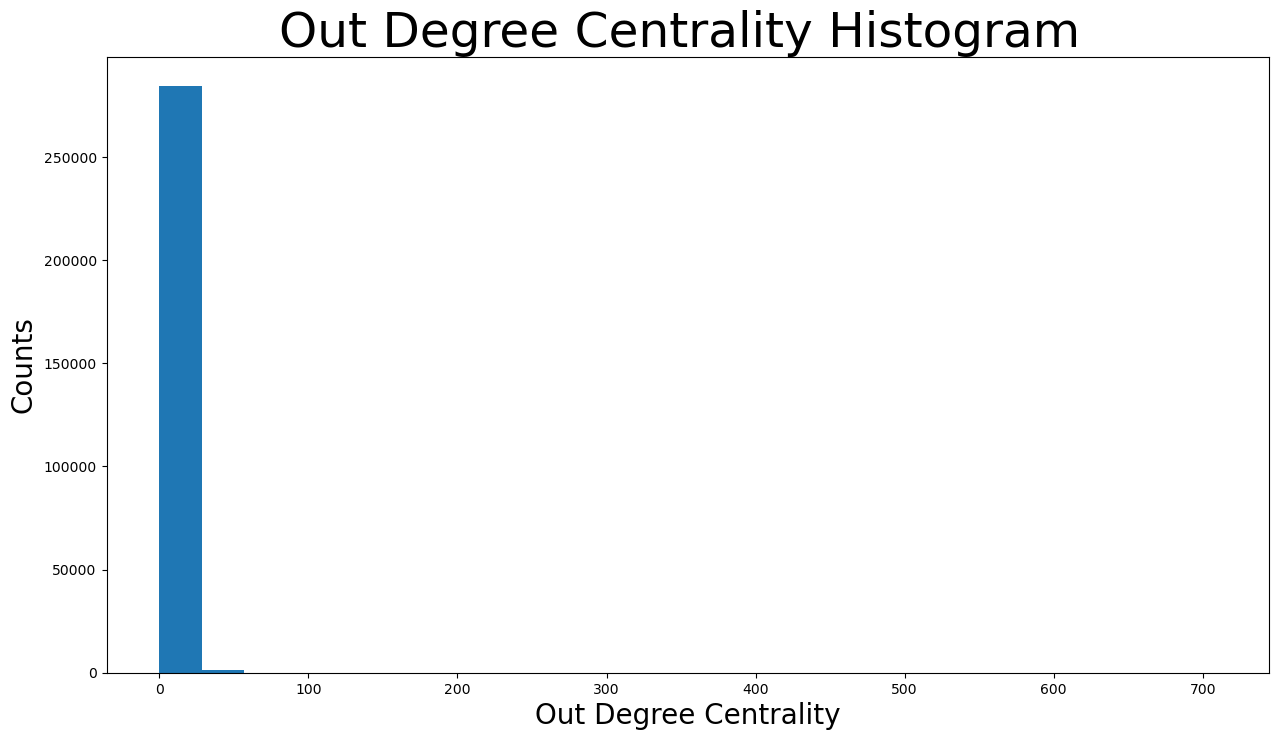

In [8]:
test = list(outdeg_cent.values())
test2 = np.array(test)*(len(G.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Out Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Out Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [10]:
print(max_value_out * (len(G.nodes)-1))

709.0


In [9]:
i = 0
for k in outdeg_cent:
    if outdeg_cent[k] == 0:
        i += 1
print(i)

252819


In [11]:
i = 0
for k in outdeg_cent:
    if outdeg_cent[k] > 0:
        i += 1
print(i)

33026


In [40]:
i = 0
for k in outdeg_cent:
    normed = outdeg_cent[k]*(len(G.nodes)-1)
    if normed == 1:
        i += 1
print(i)

3453


In [39]:
i = 0
for k in outdeg_cent:
    normed = outdeg_cent[k]*(len(G.nodes)-1)
    if normed > 1:
        i += 1
print(i)

29573


In [14]:
print(np.mean([d for _, d in G.out_degree()]))
print(np.max([d for _, d in G.out_degree()]))
print(np.min([d for _, d in G.out_degree()]))

1.1621823015970194
709
0


So what are these telling us?
In Degree
- In degree means they are being cited (listed in another papers Reference section).
- So about 50K papers are cited in this network.
- The relevant citations for us to understand prestigious papers is the in degree measure.

Out Degree
- Out degree means they are citing (have references).
- We see only 33K actually are citing something.



We should probably consider removing the intersection of 0 in and out degree of 0.

In [24]:
test_no0= {}
for k in G:
    if indeg_cent[k] != 0 and outdeg_cent[k] != 0:
        test_no0[k] = G[k]

In [54]:
len(test_no0)

2396

In [62]:
for k in test_no0['53e9988cb7602d97020c81a0']:
    k

In [25]:
G2 = nx.DiGraph()    
G2.add_nodes_from(test_no0.keys())

edge_list = []
for k in test_no0.keys():
    for v in test_no0[k]:
        edge_list.append((k, v))

G2.add_edges_from(edge_list)

In [9]:
len(G2)

32002

In [66]:
print(len(G2.nodes))
print(len(G2.edges))

32002
34091


In [71]:
indeg_cent = nx.in_degree_centrality(G2)
max_node_in = max(indeg_cent, key=indeg_cent.get)
max_value_in = indeg_cent[max_node_in]*(len(G2.nodes)-1)

print(max_node_in)
print(max_value_in)

53e9a1dbb7602d9702ada28b
12.0


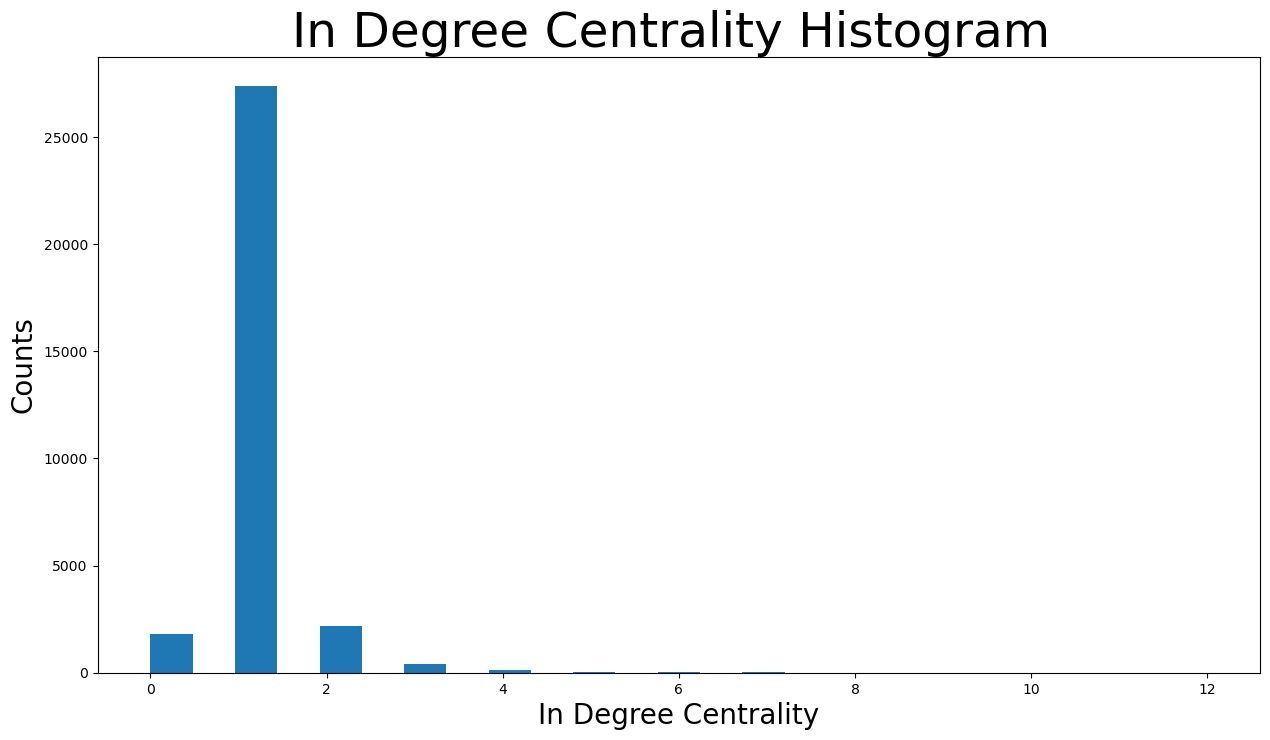

In [73]:
test = list(indeg_cent.values())
test2 = np.array(test)*(len(G2.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("In Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("In Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [72]:
outdeg_cent = nx.out_degree_centrality(G2)
max_node_out = max(outdeg_cent, key=outdeg_cent.get)
max_value_out = outdeg_cent[max_node_out]*(len(G2.nodes)-1)

print(max_node_out)
print(max_value_out)

55323c1d45cec66b6f9db3a3
408.0


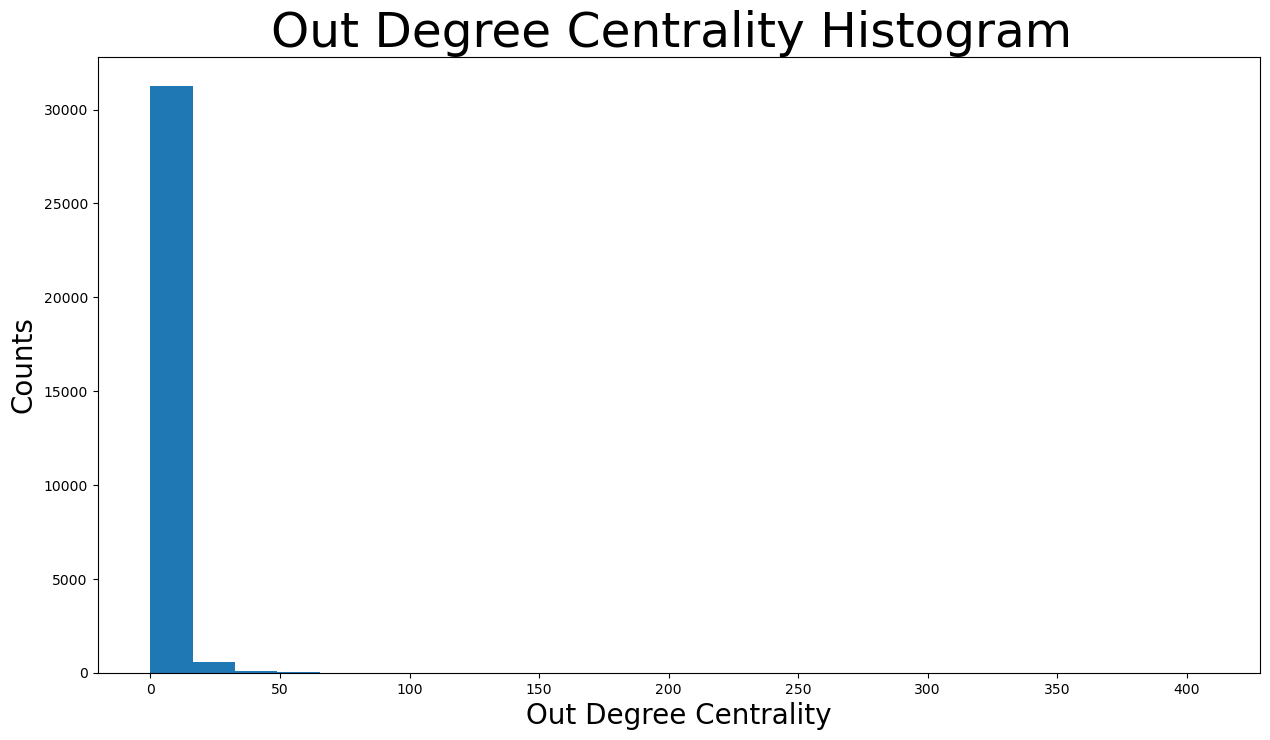

In [74]:
test = list(outdeg_cent.values())
test2 = np.array(test)*(len(G2.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Out Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Out Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [94]:
test_no02= {}
for k in G:
    if indeg_cent[k] != 0 or outdeg_cent[k] != 0:
        test_no02[k] = G[k]
len(test_no02)

266343

### Centralities

#### Degree Centralities

#### Closeness Centrality

In [37]:
close_cent = nx.closeness_centrality(G2)

max_node = max(close_cent, key=close_cent.get)
max_value = close_cent[max_node]*(len(G2.nodes)-1)

print(f'{max_node}: {max_value}')

53e9a690b7602d9702fc0e25: 12.25


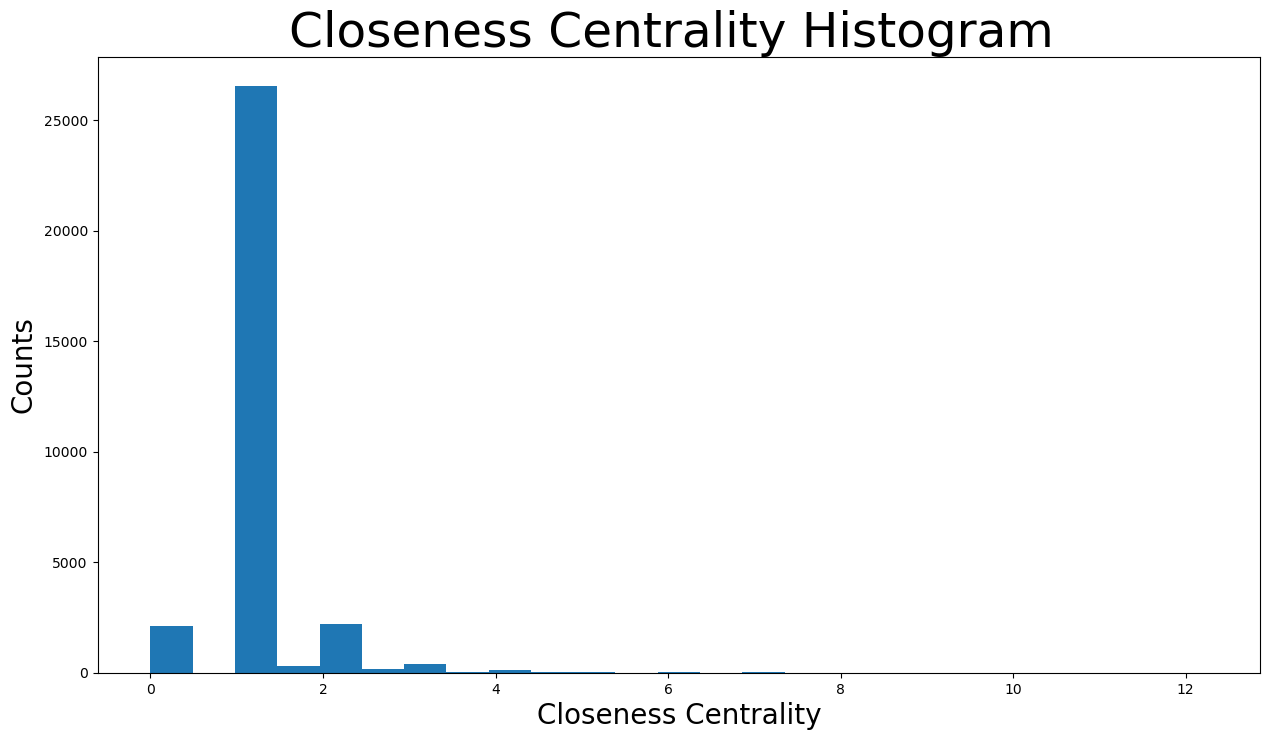

In [36]:
test = list(close_cent.values())
test2 = np.array(test)*(len(G2.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

#### Betweenness Centrality

In [26]:
#
betweenness_centrality =  nx.betweenness_centrality(G2, normalized=False)
max_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_value = betweenness_centrality[max_node]

print(f'{max_node}: {max_value}')

53e9bcd2b7602d97049561f9: 667.0


In [86]:
ref_dict = make_ref_dict(data)

In [87]:
ref_dict['53e9bcd2b7602d97049561f9']

{'id': '53e9bcd2b7602d97049561f9',
 'title': 'Interactive sketching for the early stages of user interface design',
 'doi': '10.1145/223904.223910',
 'issue': '',
 'keywords': ['silk',
  'design detail',
  'user interface',
  'interactive sketching',
  'interface idea',
  'garnet',
  'user interface design',
  'finished interface',
  'current interactive user interface',
  'gesture recognition',
  'user interfaces',
  'programming-by- demonstration',
  'interface designer',
  'final interface',
  'early stages',
  'early stage',
  'sketching',
  'interaction techniques',
  'pen-based computing',
  'early design phase',
  'design'],
 'lang': 'en',
 'venue': {'raw': 'human factors in computing systems'},
 'year': 1995,
 'n_citation': 662,
 'page_start': '43',
 'page_end': '50',
 'volume': '',
 'issn': '',
 'isbn': '0-201-84705-1',
 'url': ['http://dx.doi.org/10.1145/223904.223910',
  'http://doi.acm.org/10.1145/223904.223910'],
 'abstract': 'Current interactive user interface constructio

In [88]:
len(ref_dict['53e9bcd2b7602d97049561f9']['references'])

146

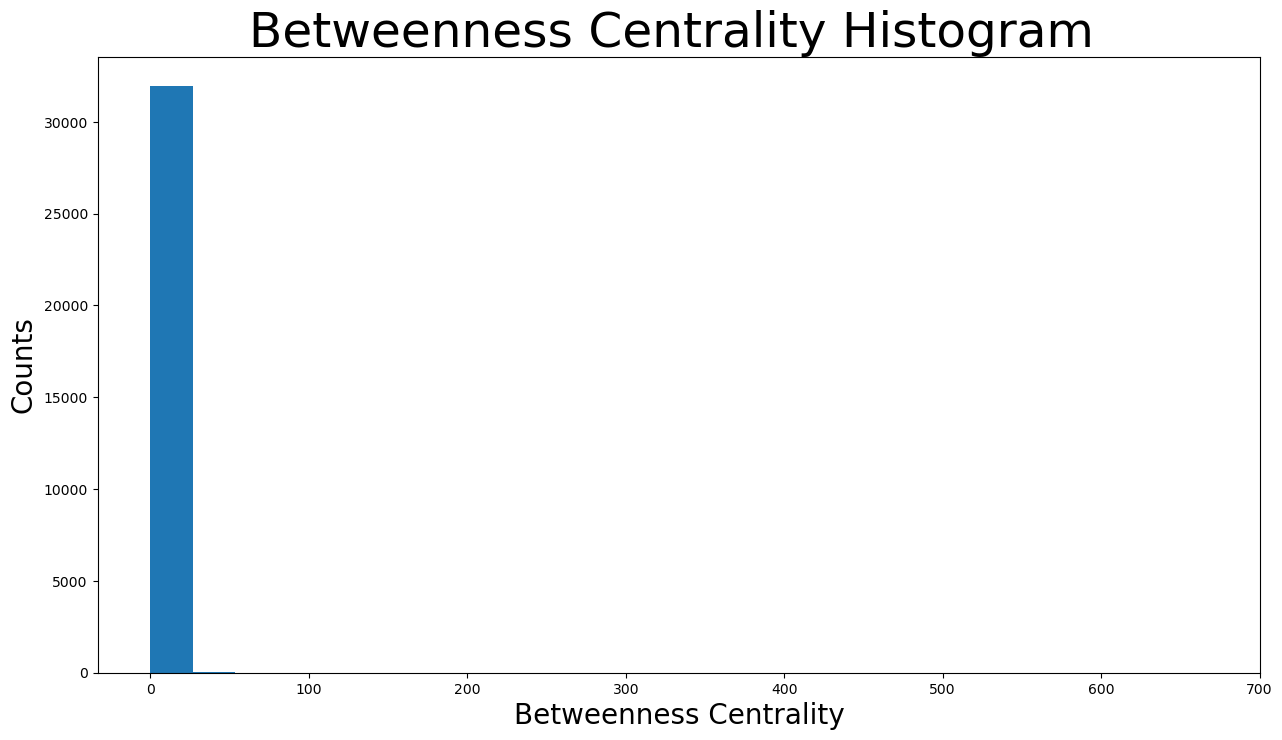

In [28]:
test = list(betweenness_centrality.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [42]:
np.min([v for v in betweenness_centrality.values()])

0.0

In [43]:
np.max([v for v in betweenness_centrality.values()])

667.0

In [44]:
np.mean([v for v in betweenness_centrality.values()])

0.20514342853571652

An enormous chunk has 0 betweeness. This makes sense given how we made this graph as there are TONS of nodes with only one connection made.

In [48]:
i=0
for v in betweenness_centrality.values():
    if v == 0:
        i+=1

print(i)

31709


In [49]:
len(G2.nodes)

32002

#### Eigenvector Centrality

In [31]:
# Pretty fast
eig_cent = nx.eigenvector_centrality(G2)
max_node = max(eig_cent, key=eig_cent.get)
max_value = eig_cent[max_node]
print(f'{max_node}: {max_value}')

53e9a0b5b7602d970299e03a: 0.38459717256675613


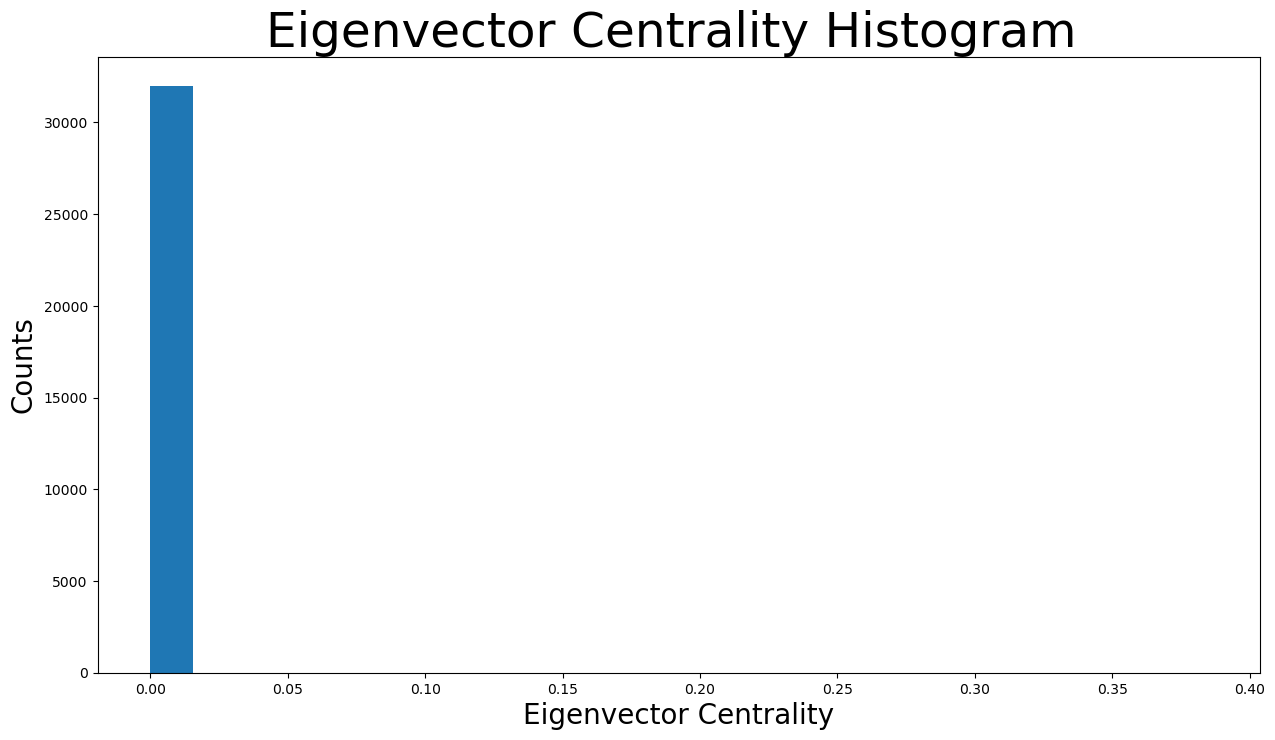

In [32]:
test = list(eig_cent.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

#### Katz Centrality

In [33]:
katz_cent = nx.katz_centrality(G2)
max_node = max(katz_cent, key=katz_cent.get)
max_value = katz_cent[max_node]
print(f'{max_node}: {max_value}')

53e9a1dbb7602d9702ada28b: 0.011225985578408567


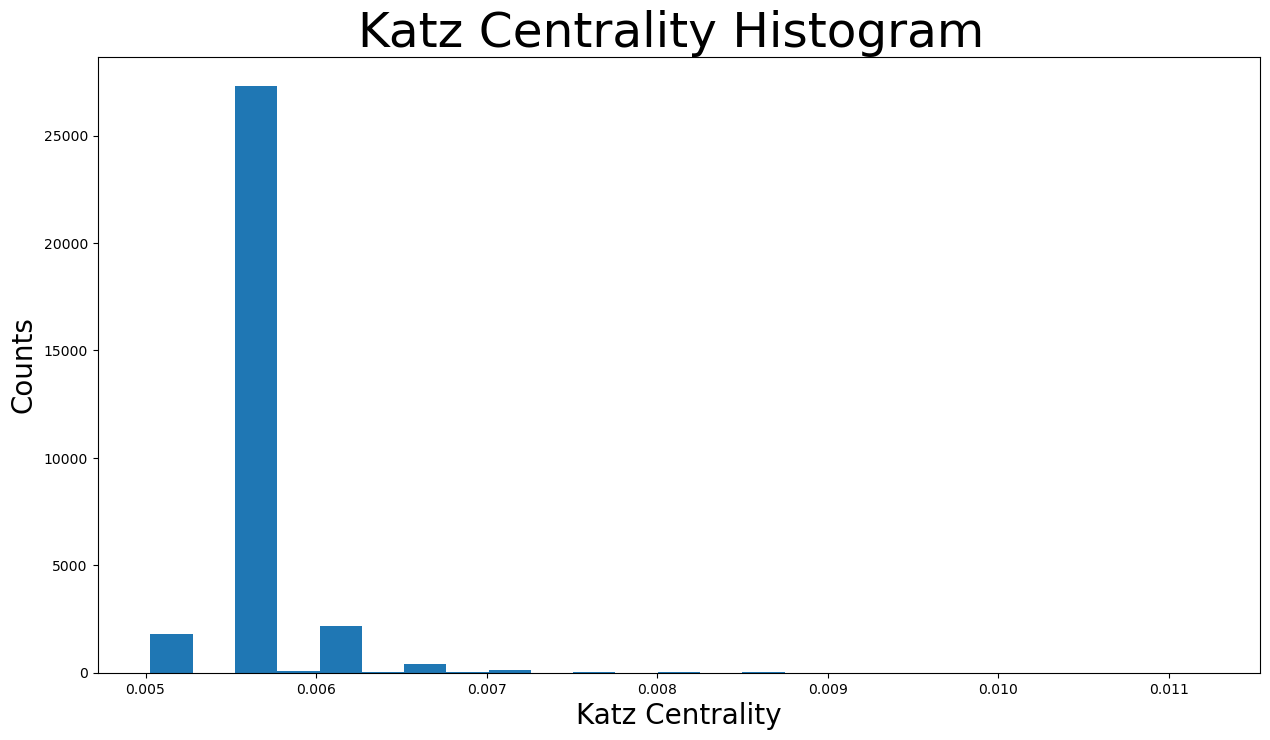

In [34]:
test = list(katz_cent.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Katz Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Katz Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

### Network Plotting

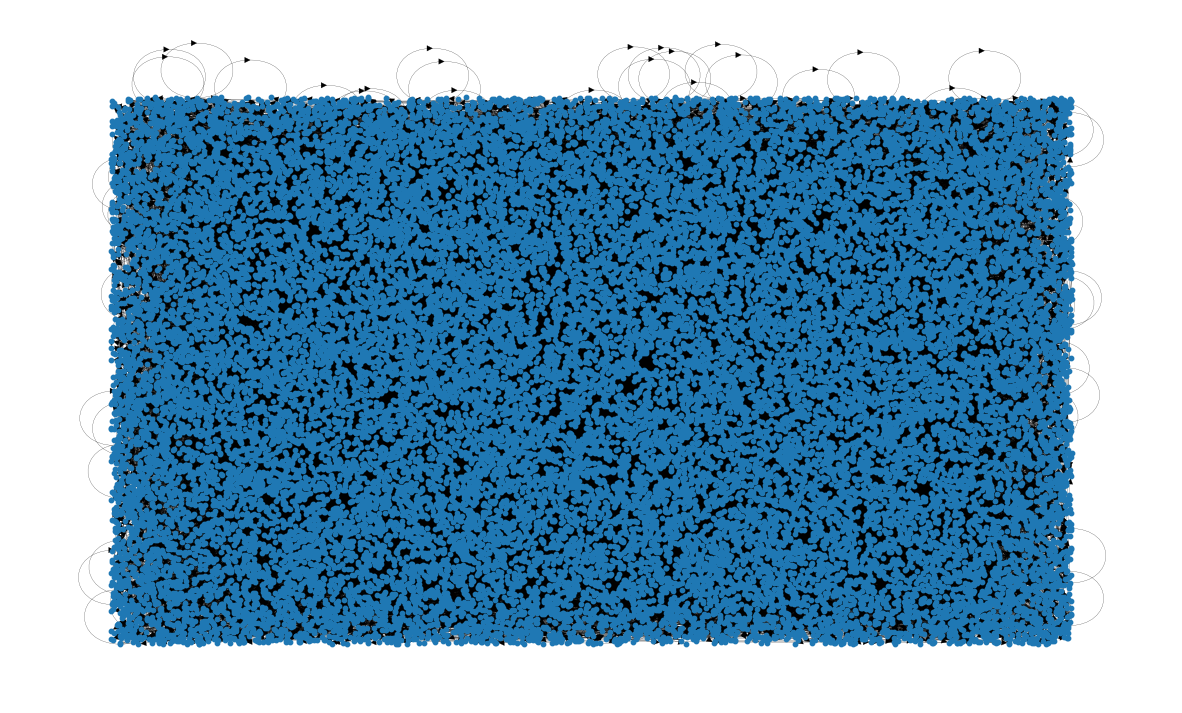

In [83]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G2, pos=nx.random_layout(G2), ax=ax, **plot_options)

In [95]:
pos = nx.spectral_layout(G2)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G2, pos=pos, ax=ax, **plot_options)

KeyboardInterrupt: 

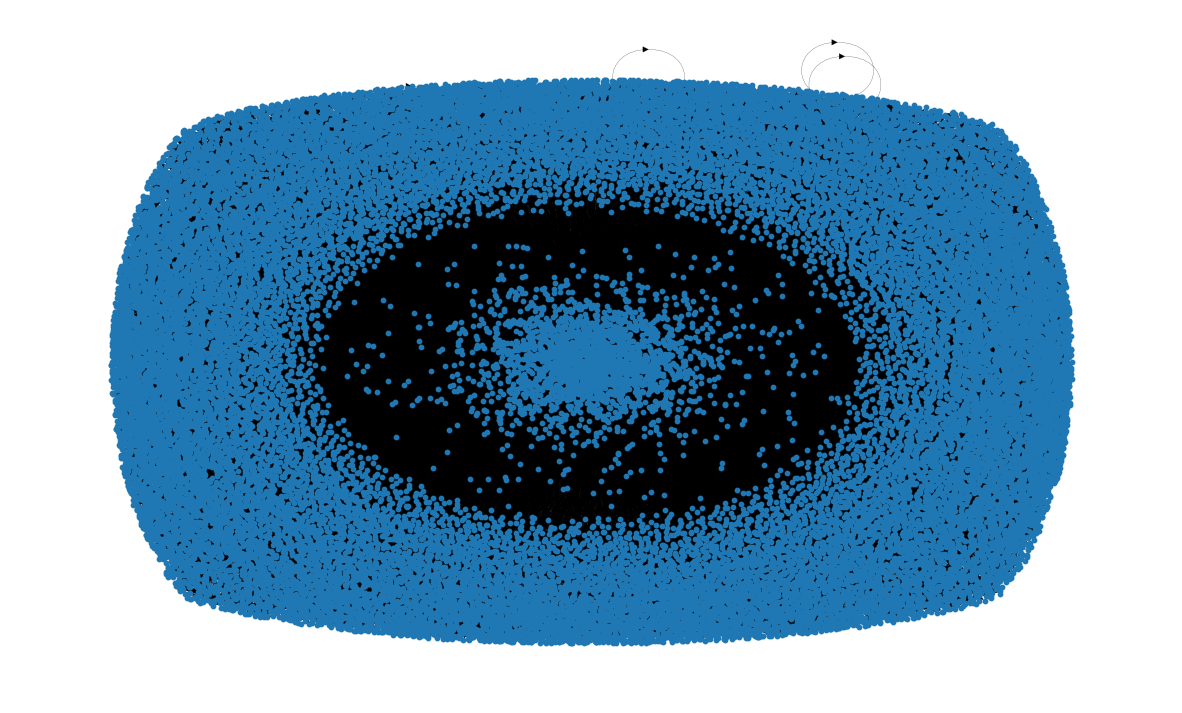

In [84]:
pos = nx.spring_layout(G2, iterations=10, seed=269)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G2, pos=pos, ax=ax, **plot_options)

### Diameter

In [96]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G2))

In [97]:
diameter = max(nx.eccentricity(G2, sp=shortest_path_lengths).values())
diameter

NetworkXError: Found infinite path length because the digraph is not strongly connected

In [108]:
s = shortest_path_lengths
s
print(np.min([d for l in s for d in l]))
print(np.max([d for l in s for d in l]))
print(np.mean([d for l in s for d in l]))

UFuncTypeError: ufunc 'minimum' did not contain a loop with signature matching types (dtype('<U1'), dtype('<U1')) -> None

In [100]:
s['53e9bcd2b7602d97049561f9']

{'53e9bcd2b7602d97049561f9': 0,
 '53e9ba3fb7602d970464e7c4': 1,
 '53e997bdb7602d9701faabe5': 1,
 '53e997ecb7602d9701fe6ba3': 1,
 '53e99800b7602d97020112a3': 1,
 '53e9985fb7602d9702099616': 1,
 '53e998f6b7602d9702131ac1': 1,
 '53e99924b7602d9702160965': 1,
 '53e999c3b7602d9702205b1f': 1,
 '53e99a0ab7602d970225933d': 1,
 '53e99a14b7602d97022685ac': 1,
 '53e99ae7b7602d97023707a2': 1,
 '53e99af7b7602d9702383219': 1,
 '53e99b16b7602d97023a91d0': 1,
 '53e99b2cb7602d97023c6cc3': 1,
 '53e99b95b7602d970243e7b3': 1,
 '53e99c59b7602d9702509523': 1,
 '53e99c60b7602d9702514432': 1,
 '53e99d80b7602d970263d21b': 1,
 '53e99dbfb7602d9702682683': 1,
 '53e99f8db7602d97028624c4': 1,
 '53e9a08ab7602d97029742a5': 1,
 '53e9a246b7602d9702b4b27c': 1,
 '53e9a2c7b7602d9702bceb95': 1,
 '53e9a350b7602d9702c5aaa2': 1,
 '53e9a38fb7602d9702c9bd59': 1,
 '53e9a3edb7602d9702d02fc4': 1,
 '53e9a495b7602d9702db4ff9': 1,
 '53e9a650b7602d9702f80563': 1,
 '53e9a67bb7602d9702faa7b6': 1,
 '53e9a682b7602d9702fb49ae': 1,
 '53e9a7

### 5%
Can start looking at 5% subsampling to get more data after this filtering.

In [10]:
with open('subsampled_v14.json', 'r') as file:
    data = json.load(file)

In [13]:
G = make_v14_graph(data,dir='dir')

print(len(G.nodes))
print(len(G.edges))

indeg_cent = nx.in_degree_centrality(G)
outdeg_cent = nx.out_degree_centrality(G)

test_no0= {}
for k in G:
    if indeg_cent[k] != 0 and outdeg_cent[k] != 0:
        test_no0[k] = G[k]

print(len(test_no0))

G2 = nx.DiGraph()    
G2.add_nodes_from(test_no0.keys())

edge_list = []
for k in test_no0.keys():
    for v in test_no0[k]:
        edge_list.append((k, v))

G2.add_edges_from(edge_list)

print(len(G2.nodes))
print(len(G2.edges))

969736
1634624
34280
292562
459548


Too large on the 5%. Perhaps a lower percent will be better? Let's try 2.5%

In [51]:
# input_file = "dblp_v14.json"
# output_file = "subsampled_v14_2p5percent.json"
# sample_prob = 0.025  # Keep some % of records

# def convert_decimal(obj):
#     if isinstance(obj, Decimal):
#         return float(obj)
#     raise TypeError(f"Type {type(obj)} not serializable")

# with open(input_file, "r") as f, open(output_file, "w") as fout:
#     items = ijson.items(f, "item")
#     subset = [item for item in items if random.random() < sample_prob]

#     json.dump(subset, fout, indent=4, default=convert_decimal)

# print("Subsampling complete.")

Subsampling complete.


In [52]:
with open('subsampled_v14_2p5percent.json', 'r') as file:
    data = json.load(file)

G = make_v14_graph(data,dir='dir')

print(len(G.nodes))
print(len(G.edges))

indeg_cent = nx.in_degree_centrality(G)
outdeg_cent = nx.out_degree_centrality(G)

test_no0= {}
for k in G:
    if indeg_cent[k] != 0 and outdeg_cent[k] != 0:
        test_no0[k] = G[k]

print(len(test_no0))

G2 = nx.DiGraph()    
G2.add_nodes_from(test_no0.keys())

edge_list = []
for k in test_no0.keys():
    for v in test_no0[k]:
        edge_list.append((k, v))

G2.add_edges_from(edge_list)

print(len(G2.nodes))
print(len(G2.edges))

589969
824912
11118
123354
156427


In [53]:
indeg_cent = nx.in_degree_centrality(G2)
max_node_in = max(indeg_cent, key=indeg_cent.get)
max_value_in = indeg_cent[max_node_in]*(len(G2.nodes)-1)

print(max_node_in)
print(max_value_in)

outdeg_cent = nx.out_degree_centrality(G2)
max_node_out = max(outdeg_cent, key=outdeg_cent.get)
max_value_out = outdeg_cent[max_node_out]*(len(G2.nodes)-1)

print(max_node_out)
print(max_value_out)

53e9986eb7602d97020ab93b
61.99999999999999
53e9a091b7602d97029767d8
655.9999999999999


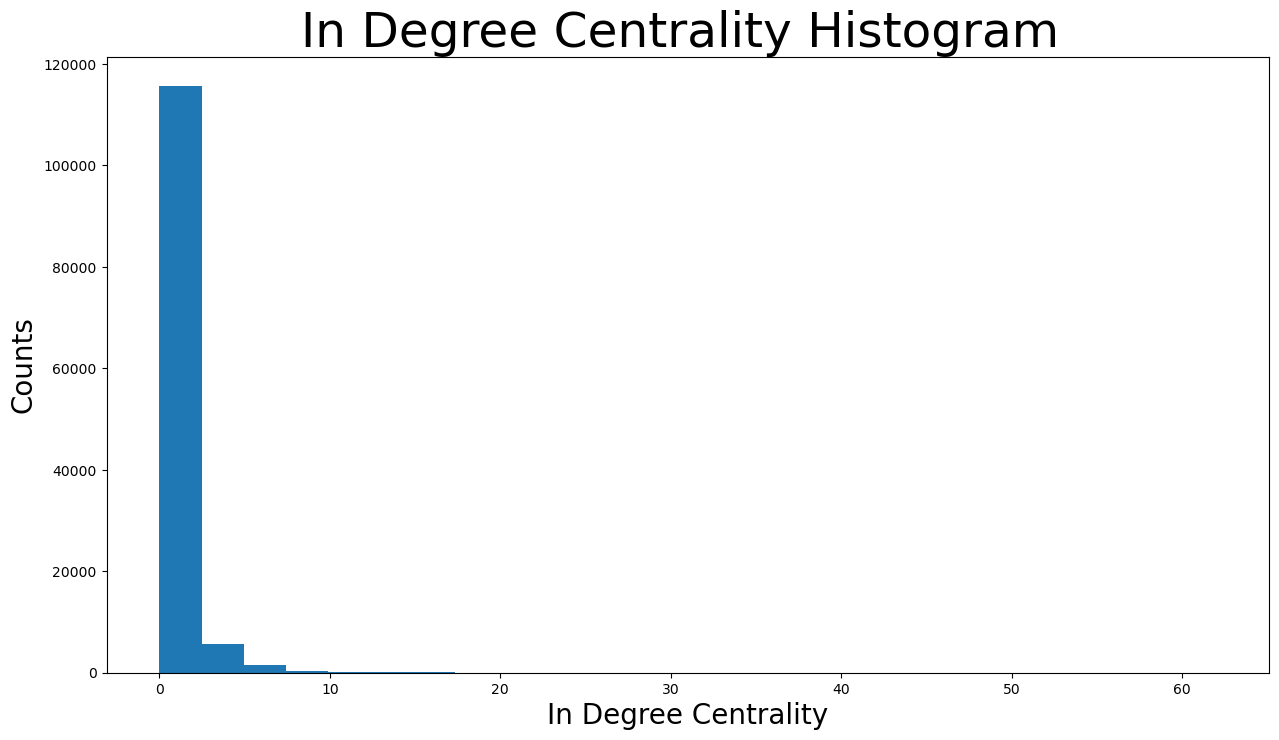

In [54]:
test = list(indeg_cent.values())
test2 = np.array(test)*(len(G2.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("In Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("In Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

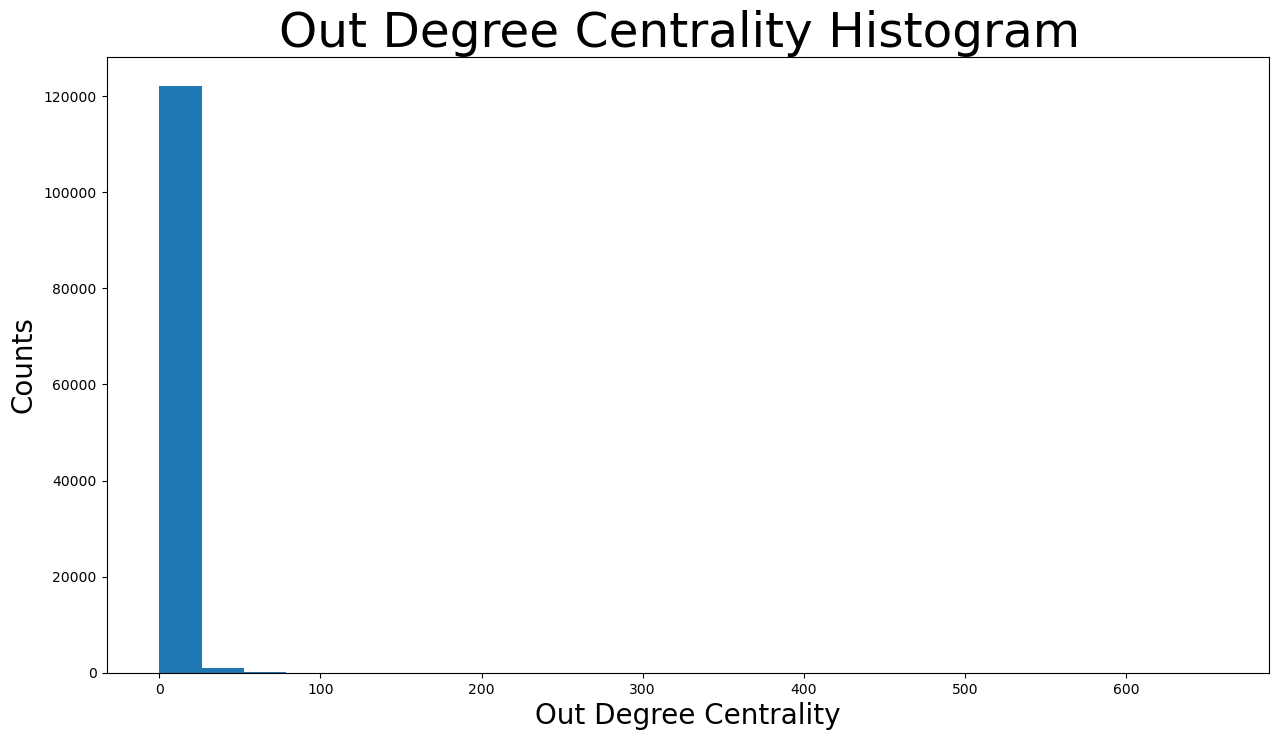

In [55]:
test = list(outdeg_cent.values())
test2 = np.array(test)*(len(G2.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Out Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Out Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [56]:
close_cent = nx.closeness_centrality(G2)
max_node = max(close_cent, key=close_cent.get)
max_value = close_cent[max_node]*(len(G2.nodes)-1)

print(f'{max_node}: {max_value}')

53e9986eb7602d97020ab93b: 57.18918918918919


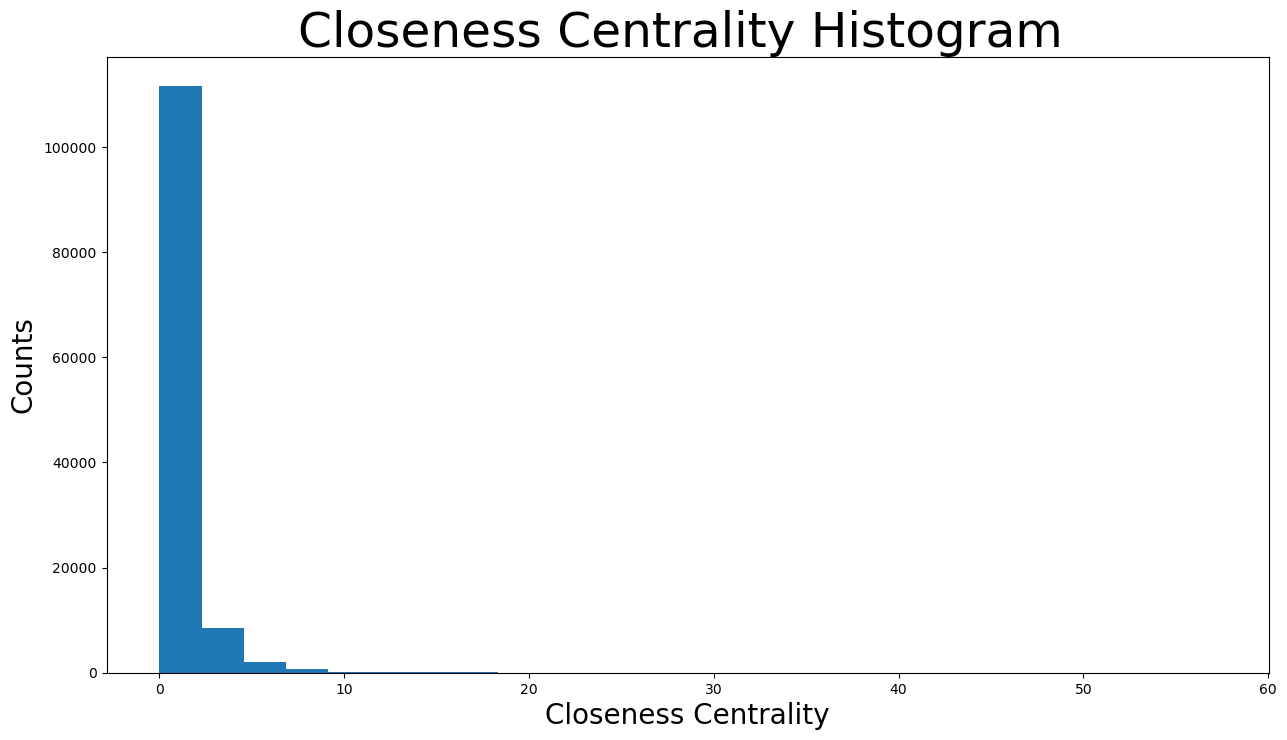

In [57]:
test = list(close_cent.values())
test2 = np.array(test)*(len(G2.nodes)-1)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [62]:
betweenness_centrality =  nx.betweenness_centrality(G2, normalized=False)
max_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_value = betweenness_centrality[max_node]

print(f'{max_node}: {max_value}')

53e99c3db7602d97024e8a5d: 1732.0


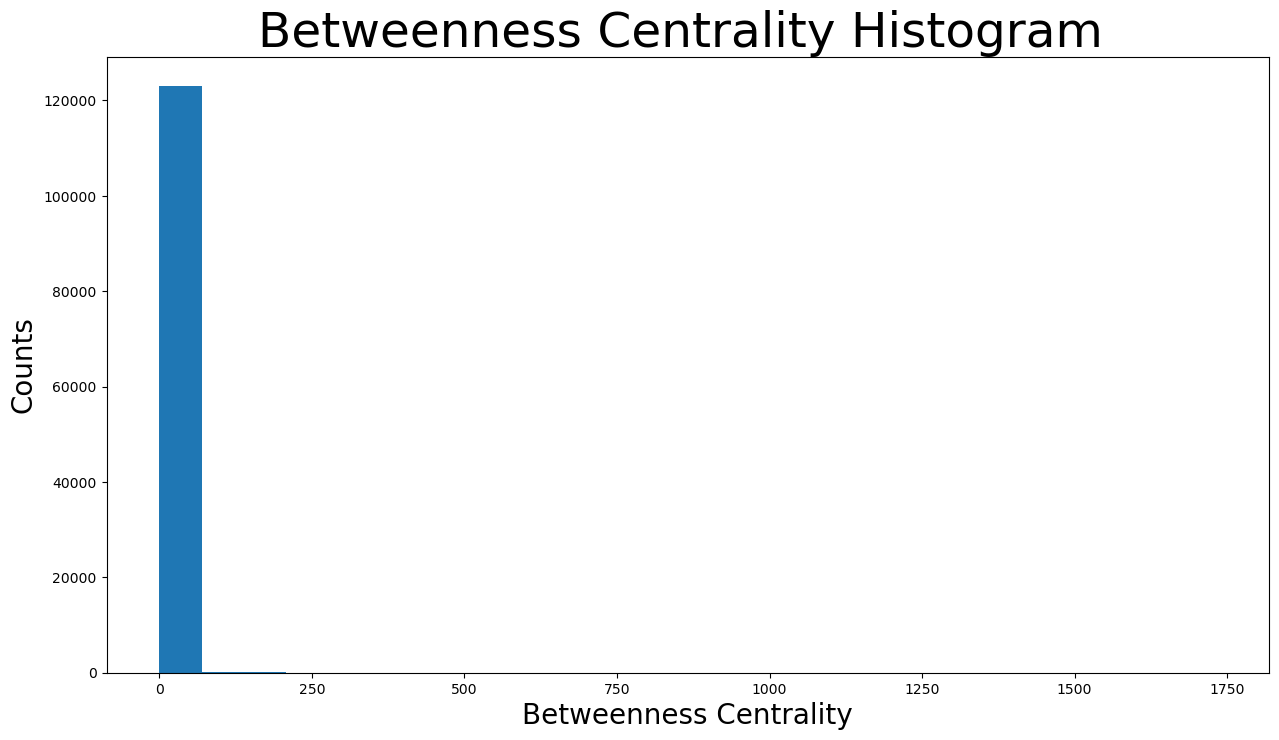

In [63]:
test = list(betweenness_centrality.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [64]:
np.mean([v for v in betweenness_centrality.values()])

0.8793391377661041

In [58]:
eig_cent = nx.eigenvector_centrality(G2)
max_node = max(eig_cent, key=eig_cent.get)
max_value = eig_cent[max_node]
print(f'{max_node}: {max_value}')

53e9b1c2b7602d9703c50d8a: 0.14035081225283502


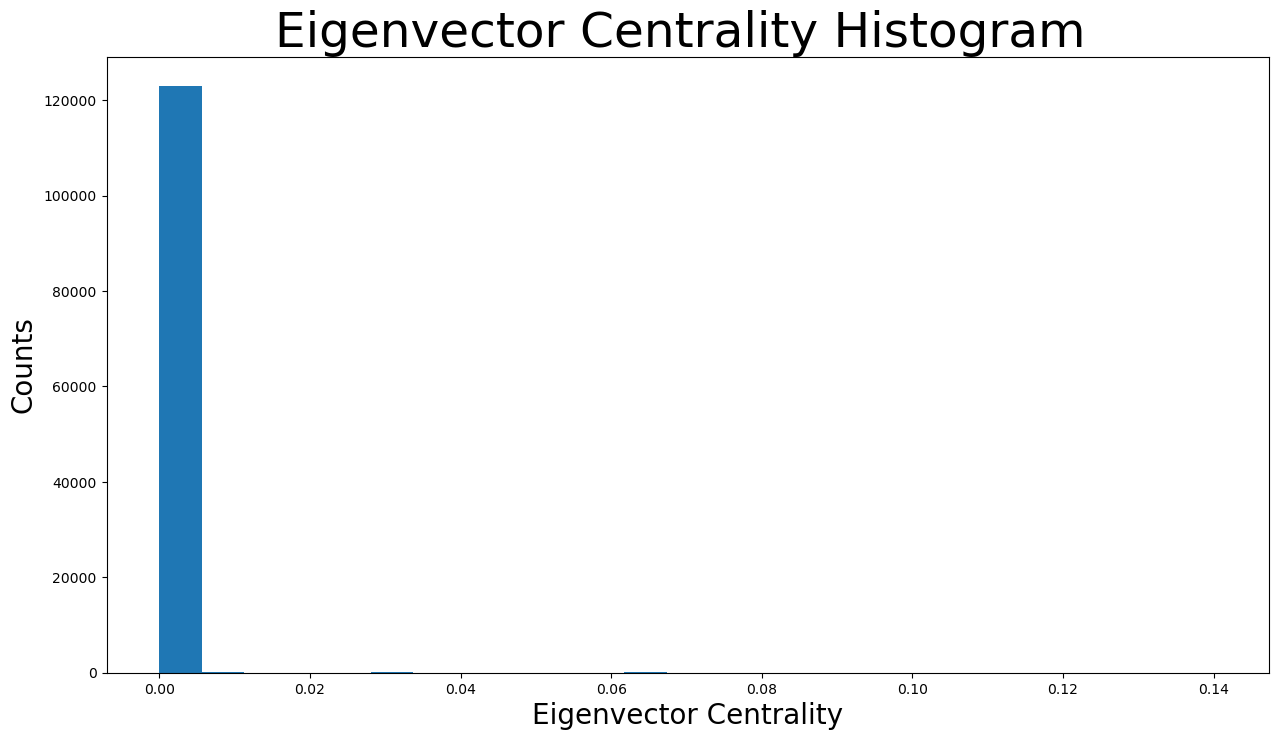

In [59]:
test = list(eig_cent.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [60]:
katz_cent = nx.katz_centrality(G2)
max_node = max(katz_cent, key=katz_cent.get)
max_value = katz_cent[max_node]
print(f'{max_node}: {max_value}')

53e9986eb7602d97020ab93b: 0.0187818052126226


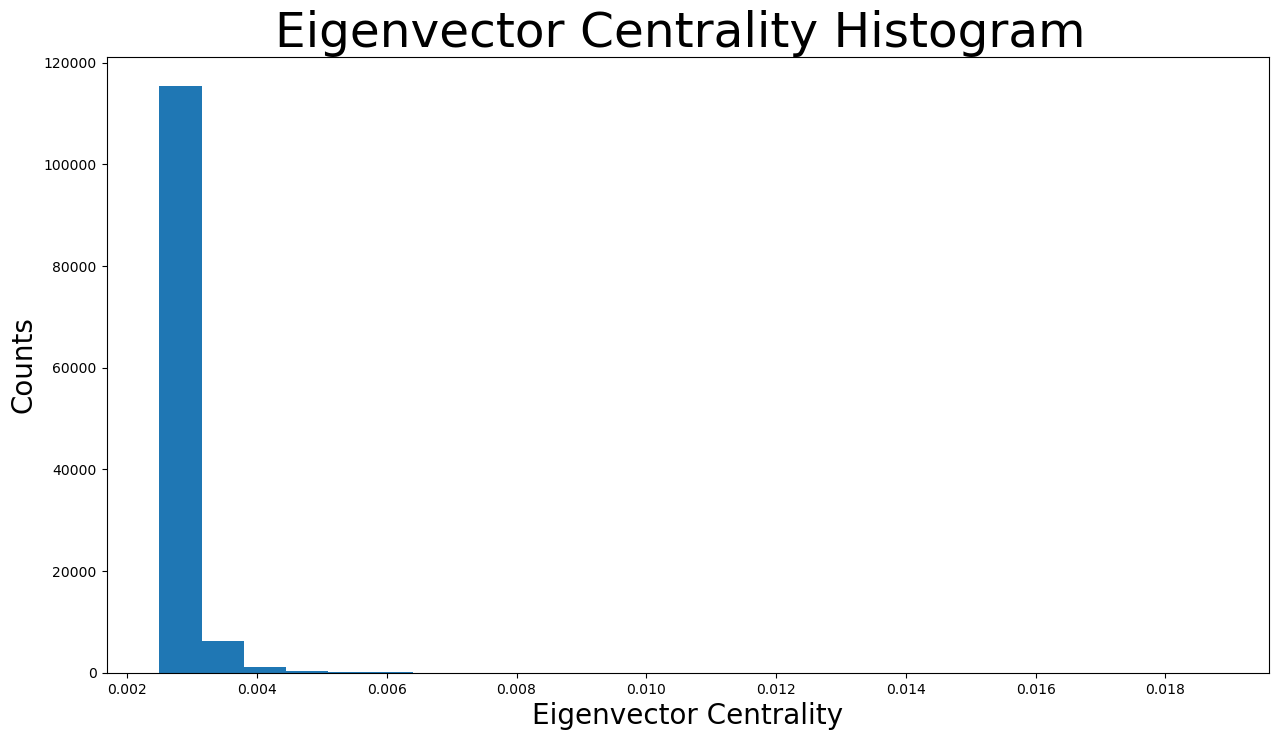

In [61]:
test = list(katz_cent.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=25)
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

This excursion into the indegree and outdegree may be useful but I'm going to start by looking at the 1% subsample and do some stuff for cliques and k-cores. May also be more efficient or appropriate to use k-edges to filter nodes before analysis. For example, using a k-edge-components of 2 or greater to filter. Or maybe even better k-core as it is relevant to our class.

Other things: k-cliques

In [66]:
with open('subsampled_v14_1percent.json', 'r') as file:
    data = json.load(file)

G = make_v14_graph(data,dir='dir')

print(len(G.nodes))
print(len(G.edges))

285845
332204


In [68]:
G_1core = nx.k_core(G, k=1)
print(len(G_1core.nodes))
print(len(G_1core.edges))

NetworkXError: Input graph has self loops which is not permitted; Consider using G.remove_edges_from(nx.selfloop_edges(G)).

In [69]:
G.remove_edges_from(nx.selfloop_edges(G))

In [71]:
print(len(G.nodes))
print(len(G.edges))

285845
331904


In [72]:
G_1core = nx.k_core(G, k=1)
print(len(G_1core.nodes))
print(len(G_1core.edges))

266338
331904


Slight reduction.

In [73]:
G_2core = nx.k_core(G, k=2)
print(len(G_2core.nodes))
print(len(G_2core.edges))

64542
136213


Significant reduction!

In [74]:
G_3core = nx.k_core(G, k=3)
print(len(G_3core.nodes))
print(len(G_3core.edges))

20788
57452


In [75]:
G_4core = nx.k_core(G, k=4)
print(len(G_4core.nodes))
print(len(G_4core.edges))

4495
15707


In [76]:
G_5core = nx.k_core(G, k=5)
print(len(G_5core.nodes))
print(len(G_5core.edges))

781
3253


In [82]:
core_metrics = {}
for i in range(1,7):
    core_metrics[i] = {}
    core_metrics[i]['nodes'] = len(nx.k_core(G, k=i).nodes)
    core_metrics[i]['edges'] = len(nx.k_core(G, k=i).edges)

In [83]:
core_metrics = {}
for i in range(1,7):
    core_metrics[i] = {}
    core_metrics[i]['nodes'] = len(nx.k_core(G, k=i).nodes)
    core_metrics[i]['edges'] = len(nx.k_core(G, k=i).edges)
    
for i in core_metrics:
    print(i,f':\n\tnodes: {core_metrics[i]['nodes']}' + f'\n\tedges: {core_metrics[i]['edges']}')

1 :
	nodes: 266338
	edges: 331904
2 :
	nodes: 64542
	edges: 136213
3 :
	nodes: 20788
	edges: 57452
4 :
	nodes: 4495
	edges: 15707
5 :
	nodes: 781
	edges: 3253
6 :
	nodes: 0
	edges: 0


Can look at various centralities for the above and compare. I think I can try the betweeness centrality for the full 1% subgraph, I just need to let it run. Also we should consider just removing the self loops. That seems very strange and may well be an error of some sort. At the very least its very few and we should just note it and remove it.

In [ ]:
    degree_measures = {'mean': np.mean([d for _, d in graph.degree()]),
                      'min':np.min([d for _, d in graph.degree()]),
                      'max':np.max([d for _, d in graph.degree()])}

    in_degree_measures = {'mean': np.mean([d for _, d in graph.in_degree()]), 
                          'min':np.min([d for _, d in graph.in_degree()]),
                          'max':np.max([d for _, d in graph.in_degree()])}

    out_degree_measures = {'mean': np.mean([d for _, d in graph.out_degree()]), 
                           'min':np.min([d for _, d in graph.out_degree()]),
                           'max':np.max([d for _, d in graph.out_degree()])}

In [89]:
in_degree_measures = {'mean': np.mean([d for _, d in G_4core.in_degree()]), 
                          'min':np.min([d for _, d in G_4core.in_degree()]),
                          'max':np.max([d for _, d in G_4core.in_degree()])}
print(in_degree_measures)

in_degree_measures = {'mean': np.mean([d for _, d in G_5core.in_degree()]), 
                          'min':np.min([d for _, d in G_5core.in_degree()]),
                          'max':np.max([d for _, d in G_5core.in_degree()])}
print(in_degree_measures)

{'mean': 3.49432703003337, 'min': 0, 'max': 88}
{'mean': 4.1651728553137, 'min': 0, 'max': 55}


In [90]:
def core_metrics(G, core_start=1, core_end=6):
    core_end+=1
    # Inserted to prevent errors from self loops
    G.remove_edges_from(nx.selfloop_edges(G))
    core_metrics = {}
    for i in range(core_start,core_end):
        core_metrics[i] = {}
        core_metrics[i]['nodes'] = len(nx.k_core(G, k=i).nodes)
        core_metrics[i]['edges'] = len(nx.k_core(G, k=i).edges)
    # Centrality calculations
    for i in core_metrics:
        core_metrics[i]['centralities'] = {}
        # Degree, In degree, Out Degree
        # ## fill function
        # degree_measures = {'mean': np.mean([d for _, d in graph.degree()]),
        #               'min':np.min([d for _, d in graph.degree()]),
        #               'max':np.max([d for _, d in graph.degree()])}
        # #insert function
        # in_degree_measures = {'mean': np.mean([d for _, d in graph.in_degree()]), 
        #                   'min':np.min([d for _, d in graph.in_degree()]),
        #                   'max':np.max([d for _, d in graph.in_degree()])}
        # #insert function
        # out_degree_measures = {'mean': np.mean([d for _, d in graph.out_degree()]), 
        #                    'min':np.min([d for _, d in graph.out_degree()]),
        #                    'max':np.max([d for _, d in graph.out_degree()])}
        # Closeness
        close_cent = nx.closeness_centrality(G)
        core_metrics[i]['centralities']['closeness'] = {
                        'mean': np.mean([d for _, d in close_cent]), 
                        'min':np.min([d for _, d in close_cent]),
                        'max':np.max([d for _, d in close_cent])}
        #Betweenness
        between_cent = nx.betweenness_centrality(G)
        core_metrics[i]['centralities']['Betweenness'] = {
                        'mean': np.mean([d for _, d in between_cent]), 
                        'min':np.min([d for _, d in between_cent]),
                        'max':np.max([d for _, d in between_cent])}
        #Eigenvector
        eig_cent = nx.eigenvector_centrality(G)
        core_metrics[i]['centralities']['Eigenvector'] = {
                        'mean': np.mean([d for _, d in eig_cent]), 
                        'min':np.min([d for _, d in eig_cent]),
                        'max':np.max([d for _, d in eig_cent])}
        #Katz
        katz_cent = nx.katz_centrality(G)
        core_metrics[i]['centralities']['Katz'] = {
                        'mean': np.mean([d for _, d in katz_cent]), 
                        'min':np.min([d for _, d in katz_cent]),
                        'max':np.max([d for _, d in katz_cent])}
        # Try pagerank?

Im going to try this without 1 cores to start as a test.

# Moving to V1

In [2]:
file_path = '../v1/citation-network1/outputacm.txt'

In [92]:
# Initialize a list to store parsed papers
papers = []

# Open and read the text file
with open(file_path, "r", encoding="utf-8") as file:
    paper = {}  # Dictionary to store a single paper
    for line in file:
        line = line.strip()  # Remove spaces and newlines

        if not line:  # Skip empty lines
            continue

        # Parsing logic based on line prefixes
        if line.startswith("#*"):
            if paper:  # Save previous paper before starting a new one
                paper["n_citation"] = len(paper.get("references", []))  # Count references
                papers.append(paper)
                paper = {}
            paper["title"] = line[2:].strip()
        elif line.startswith("#@"):
            paper["authors"] = [author.strip() for author in line[2:].split(",")]
        elif line.startswith("#t"):
            paper["year"] = int(line[2:].strip())
        elif line.startswith("#c"):
            paper["venue"] = line[2:].strip()
        elif line.startswith("#index"):
            paper["index_id"] = int(line[6:].strip())
        elif line.startswith("#%"):
            paper.setdefault("references", []).append(int(line[2:].strip()))
        elif line.startswith("#!"):
            paper["abstract"] = line[2:].strip()

    # Append the last paper after loop ends
    if paper:
        paper["n_citation"] = len(paper.get("references", []))  # Count references
        papers.append(paper)

# Convert the structured data into JSON format and save
output_path = "../v1/citation-network1/parsed_outputacm.json"
with open(output_path, "w", encoding="utf-8") as json_file:
    json.dump(papers, json_file, indent=4)

# Print a sample (first 3 papers) to verify
print(json.dumps(papers[:3], indent=4))

[
    {
        "title": "Automated Deduction in Geometry: 5th International Workshop, ADG 2004, Gainesville, FL, USA, September 16-18, 2004, Revised Papers (Lecture Notes in Computer ... / Lecture Notes in Artificial Intelligence)",
        "authors": [
            "Hoon Hong",
            "Dongming Wang"
        ],
        "year": 2006,
        "venue": "",
        "index_id": 0,
        "n_citation": 0
    },
    {
        "title": "A+ Certification Core Hardware (Text & Lab Manual)",
        "authors": [
            "Charles J. Brooks"
        ],
        "year": 2003,
        "venue": "",
        "index_id": 1,
        "n_citation": 0
    },
    {
        "title": "Performance engineering in industry: current practices and adoption challenges",
        "authors": [
            "Ahmed E. Hassan",
            "Parminder Flora"
        ],
        "year": 2007,
        "venue": "Proceedings of the 6th international workshop on Software and performance",
        "index_id": 2,
        "

In [93]:
papers_with_citations = sum(1 for paper in papers if paper["n_citation"] > 0)
papers_without_citations = sum(1 for paper in papers if paper["n_citation"] == 0)

print(f"Num papers with citations (n_citation > 0): {papers_with_citations}")
print(f"Num papers without citations (n_citation = 0): {papers_without_citations}")

Num papers with citations (n_citation > 0): 125372
Num papers without citations (n_citation = 0): 504442


In [5]:
def make_v1_graph(data, dir='dir'):
    '''
    Make data dict, get them into nodes and edges
    '''
    
    # make dict function
    id_ref_dict = make_v1_dict(data)
    id_ref_tups = make_v1_tups(id_ref_dict)

    if dir == 'dir':
        G = nx.DiGraph()    
        G.add_nodes_from(id_ref_dict.keys())
        G.add_edges_from(id_ref_tups)
    elif dir == 'undir':
        G = nx.Graph()    
        G.add_nodes_from(id_ref_dict.keys())
        G.add_edges_from(id_ref_tups)
    else:
        return print("Input Error: Input 'dir' or 'undir' for Directed or Undirected graph type.")

    return G


def make_v1_dict(data):
    id_ref_dict = {}
    for paper in data:
        if 'references' in paper.keys():
            id_ref_dict[paper['index_id']] = paper['references']
        else:
            id_ref_dict[paper['index_id']] = []

    return id_ref_dict

def make_v1_tups(id_ref_dict):
    id_ref_tups = []

    for paper in id_ref_dict:
        ref_len = len(id_ref_dict[paper])
        if ref_len > 0:
            for i in range(ref_len):
                id_ref_tups.append((paper, id_ref_dict[paper][i]))

    return id_ref_tups

# def make_ref_dict(data):
#     ref_dict = {}
#     for paper in data:
#         ref_dict[paper['id']] = paper
#     return ref_dict

In [2]:
with open("../v1/citation-network1/parsed_outputacm.json", 'r') as file:
    data = json.load(file)

In [6]:
G = make_v1_graph(data)
print(len(G.nodes))
print(len(G.edges))

629814
632751


In [13]:
in_degree_measures = {'mean': np.mean([d for _, d in G.in_degree()]), 
                          'min':np.min([d for _, d in G.in_degree()]),
                          'max':np.max([d for _, d in G.in_degree()])}

In [14]:
in_degree_measures

{'mean': 1.0046632815402643, 'min': 0, 'max': 816}

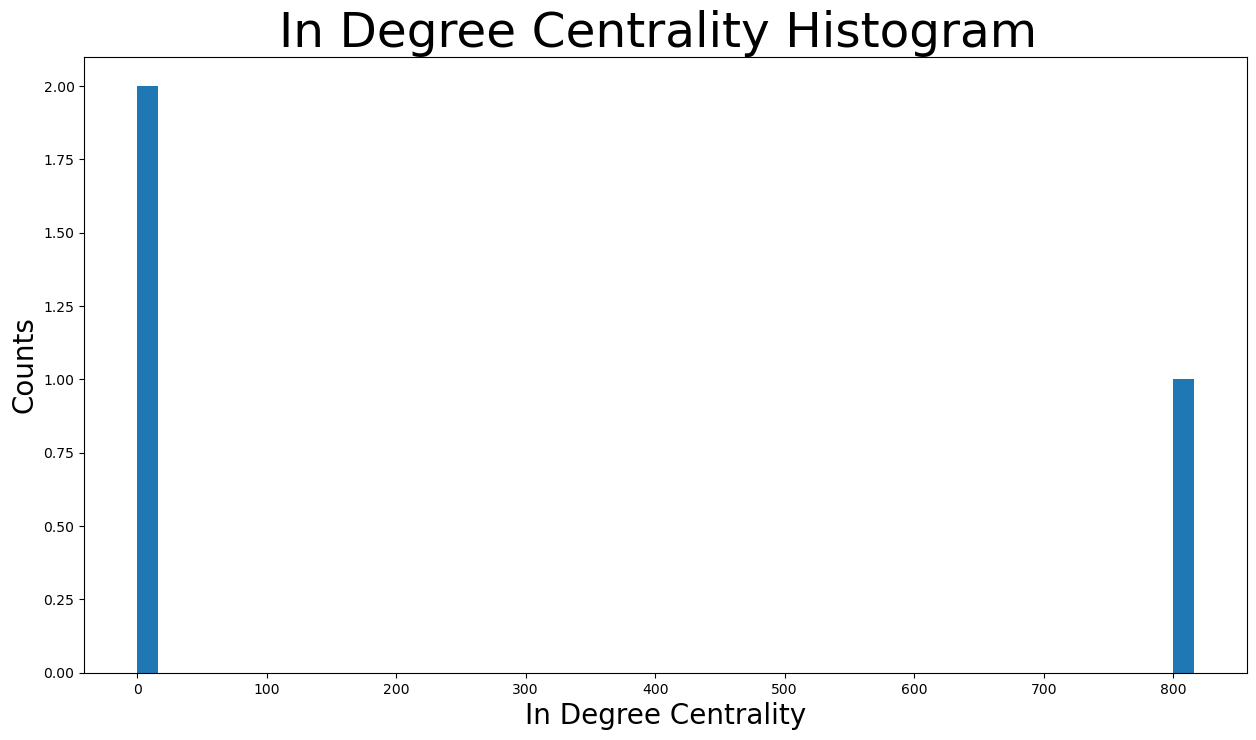

In [17]:
test = list(in_degree_measures.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=50)
plt.title("In Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("In Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [18]:
out_degree_measures = {'mean': np.mean([d for _, d in G.out_degree()]), 
                          'min':np.min([d for _, d in G.out_degree()]),
                          'max':np.max([d for _, d in G.out_degree()])}
out_degree_measures

{'mean': 1.0046632815402643, 'min': 0, 'max': 195}

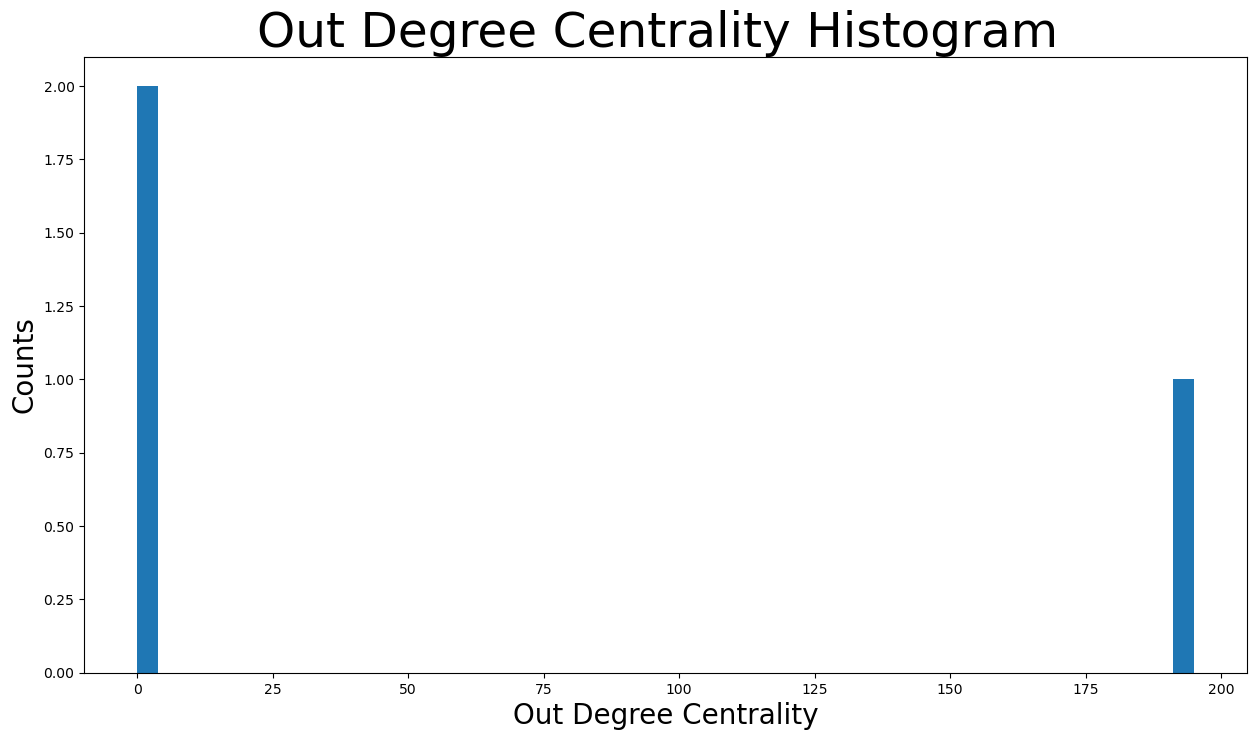

In [22]:
test = list(out_degree_measures.values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=50)
plt.title("Out Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Out Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [105]:
test.remove_edges_from(nx.selfloop_edges(test))

print(len(test.nodes))
print(len(test.edges))

629814
632542


In [108]:
core_metrics = {}
for i in range(1,16):
    core_metrics[i] = {}
    core_metrics[i]['nodes'] = len(nx.k_core(test, k=i).nodes)
    core_metrics[i]['edges'] = len(nx.k_core(test, k=i).edges)

    if core_metrics[i]['nodes'] == 0:
        break

for i in core_metrics:
    print(i,f':\n\tnodes: {core_metrics[i]['nodes']}' + f'\n\tedges: {core_metrics[i]['edges']}')

1 :
	nodes: 217312
	edges: 632542
2 :
	nodes: 143969
	edges: 563444
3 :
	nodes: 103032
	edges: 487054
4 :
	nodes: 74366
	edges: 406606
5 :
	nodes: 52804
	edges: 325908
6 :
	nodes: 35889
	edges: 246708
7 :
	nodes: 23507
	edges: 177169
8 :
	nodes: 13976
	edges: 114889
9 :
	nodes: 7952
	edges: 69823
10 :
	nodes: 4057
	edges: 37046
11 :
	nodes: 1742
	edges: 15604
12 :
	nodes: 0
	edges: 0


In [144]:
# I fucked up and forgot to include the k-cores lol

def core_metrics(G, core_start=1, core_end=6):
    core_end+=1
    # Inserted to prevent errors from self loops
    G.remove_edges_from(nx.selfloop_edges(G))
    core_metrics = {}
    for i in range(core_start,core_end):
        core_metrics[i] = {}
        # core_metrics[i]['nodes'] = len(nx.k_core(G, k=i).nodes)
        # core_metrics[i]['edges'] = len(nx.k_core(G, k=i).edges)
    # Centrality calculations
    for i in core_metrics:
        core = nx.k_core(G, k=i)
        
        core_metrics[i]['nodes'] = len(core.nodes)
        core_metrics[i]['edges'] = len(core.edges)
        
        core_metrics[i]['centralities'] = {}
        # Degree, In degree, Out Degree
        deg_cent = core.degree()
        core_metrics[i]['centralities']['Degree'] = {
                      'mean': np.mean([d for _, d in deg_cent]),
                      'min':np.min([d for _, d in deg_cent]),
                      'max':np.max([d for _, d in deg_cent])}
        
        indeg_cent = core.in_degree()
        core_metrics[i]['centralities']['In Degree'] = {
                          'mean': np.mean([d for _, d in indeg_cent]), 
                          'min':np.min([d for _, d in indeg_cent]),
                          'max':np.max([d for _, d in indeg_cent])}
        
        outdeg_cent = core.out_degree()
        core_metrics[i]['centralities']['Out Degree'] = {
                           'mean': np.mean([d for _, d in outdeg_cent]), 
                           'min':np.min([d for _, d in outdeg_cent]),
                           'max':np.max([d for _, d in outdeg_cent])}
        
        # Closeness
        close_cent = nx.closeness_centrality(core)
        core_metrics[i]['centralities']['closeness'] = {
                        'mean': np.mean([d for d in close_cent.values()]), 
                        'min':np.min([d for d in close_cent.values()]),
                        'max':np.max([d for d in close_cent.values()])}
        
        #Betweenness
        between_cent = nx.betweenness_centrality(core)
        core_metrics[i]['centralities']['Betweenness'] = {
                        'mean': np.mean([d for d in between_cent.values()]), 
                        'min':np.min([d for d in between_cent.values()]),
                        'max':np.max([d for d in between_cent.values()])}
        
        #Eigenvector
        eig_cent = nx.eigenvector_centrality(core)
        core_metrics[i]['centralities']['Eigenvector'] = {
                        'mean': np.mean([d for d in eig_cent.values()]), 
                        'min':np.min([d for d in eig_cent.values()]),
                        'max':np.max([d for d in eig_cent.values()])}
        
        #Katz
        katz_cent = nx.katz_centrality(core)
        core_metrics[i]['centralities']['Katz'] = {
                        'mean': np.mean([d for d in katz_cent.values()]), 
                        'min':np.min([d for d in katz_cent.values()]),
                        'max':np.max([d for d in katz_cent.values()])}

    return core_metrics




In [145]:
cm = core_metrics(G, core_start=1, core_end=11)

In [146]:
pprint(cm)

{1: {'centralities': {'Betweenness': {'max': 0.00027051845645020465,
                                      'mean': 1.8937889129207522e-07,
                                      'min': 0.0},
                      'Degree': {'max': 816,
                                 'mean': 5.821510086879694,
                                 'min': 1},
                      'Eigenvector': {'max': 0.40670866420268464,
                                      'mean': 1.4043406270634275e-05,
                                      'min': 2.7115637743923044e-26},
                      'In Degree': {'max': 816,
                                    'mean': 2.910755043439847,
                                    'min': 0},
                      'Katz': {'max': 0.16499045693680106,
                               'mean': 0.001182785600087657,
                               'min': 0.000789704083259869},
                      'Out Degree': {'max': 195,
                                     'mean': 2.910755043439847,
   

In [1]:
test = {1: {'centralities': {'Betweenness': {'max': 0.00027051845645020465,
                                      'mean': 1.8937889129207522e-07,
                                      'min': 0.0},
                      'Degree': {'max': 816,
                                 'mean': 5.821510086879694,
                                 'min': 1},
                      'Eigenvector': {'max': 0.40670866420268464,
                                      'mean': 1.4043406270634275e-05,
                                      'min': 2.7115637743923044e-26},
                      'In Degree': {'max': 816,
                                    'mean': 2.910755043439847,
                                    'min': 0},
                      'Katz': {'max': 0.16499045693680106,
                               'mean': 0.001182785600087657,
                               'min': 0.000789704083259869},
                      'Out Degree': {'max': 195,
                                     'mean': 2.910755043439847,
                                     'min': 0},
                      'closeness': {'max': 0.06840408874030698,
                                    'mean': 0.000764097633468672,
                                    'min': 0.0}},
     'edges': 632542,
     'nodes': 217312},
 2: {'centralities': {'Betweenness': {'max': 0.0005338185473792771,
                                      'mean': 5.549047902386837e-07,
                                      'min': 0.0},
                      'Degree': {'max': 791,
                                 'mean': 7.82729615403316,
                                 'min': 2},
                      'Eigenvector': {'max': 0.40678920921199485,
                                      'mean': 2.01959245642e-05,
                                      'min': 4.599758103433232e-27},
                      'In Degree': {'max': 791,
                                    'mean': 3.91364807701658,
                                    'min': 0},
                      'Katz': {'max': 0.16963946956971238,
                               'mean': 0.0013921854849925036,
                               'min': 0.0008235594554826208},
                      'Out Degree': {'max': 187,
                                     'mean': 3.91364807701658,
                                     'min': 0},
                      'closeness': {'max': 0.09898391248226153,
                                    'mean': 0.0015339715453201624,
                                    'min': 0.0}},
     'edges': 563444,
     'nodes': 143969},
 3: {'centralities': {'Betweenness': {'max': 0.000864055857916082,
                                      'mean': 1.1808661981869838e-06,
                                      'min': 0.0},
                      'Degree': {'max': 742,
                                 'mean': 9.454421927168259,
                                 'min': 3},
                      'Eigenvector': {'max': 0.4068030107608806,
                                      'mean': 2.7434546776214683e-05,
                                      'min': 8.424902991449294e-28},
                      'In Degree': {'max': 742,
                                    'mean': 4.727210963584129,
                                    'min': 0},
                      'Katz': {'max': 0.17299527902790396,
                               'mean': 0.001615839816671629,
                               'min': 0.0008668273762059277},
                      'Out Degree': {'max': 183,
                                     'mean': 4.727210963584129,
                                     'min': 0},
                      'closeness': {'max': 0.12553868263840137,
                                    'mean': 0.0024693110475131007,
                                    'min': 0.0}},
     'edges': 487054,
     'nodes': 103032},
 4: {'centralities': {'Betweenness': {'max': 0.0012856443259894848,
                                      'mean': 2.250501573122877e-06,
                                      'min': 0.0},
                      'Degree': {'max': 692,
                                 'mean': 10.935266116235914,
                                 'min': 4},
                      'Eigenvector': {'max': 0.40680599539230156,
                                      'mean': 3.749726820621595e-05,
                                      'min': 1.7242499058234001e-28},
                      'In Degree': {'max': 692,
                                    'mean': 5.467633058117957,
                                    'min': 0},
                      'Katz': {'max': 0.17625785292044951,
                               'mean': 0.001892256749612733,
                               'min': 0.0009285250870879998},
                      'Out Degree': {'max': 178,
                                     'mean': 5.467633058117957,
                                     'min': 0},
                      'closeness': {'max': 0.14967220486176167,
                                    'mean': 0.0036552890269163757,
                                    'min': 0.0}},
     'edges': 406606,
     'nodes': 74366},
 5: {'centralities': {'Betweenness': {'max': 0.0018668885921817667,
                                      'mean': 4.080562586887661e-06,
                                      'min': 0.0},
                      'Degree': {'max': 634,
                                 'mean': 12.344064843572456,
                                 'min': 5},
                      'Eigenvector': {'max': 0.4068183526838866,
                                      'mean': 5.1767743762389765e-05,
                                      'min': 7.363088530352547e-30},
                      'In Degree': {'max': 634,
                                    'mean': 6.172032421786228,
                                    'min': 0},
                      'Katz': {'max': 0.17749050104284875,
                               'mean': 0.0022599688177038866,
                               'min': 0.0010180943359299076},
                      'Out Degree': {'max': 172,
                                     'mean': 6.172032421786228,
                                     'min': 0},
                      'closeness': {'max': 0.17040288289568756,
                                    'mean': 0.005163821176502191,
                                    'min': 0.0}},
     'edges': 325908,
     'nodes': 52804},
 6: {'centralities': {'Betweenness': {'max': 0.002676252819658312,
                                      'mean': 7.5002943013357575e-06,
                                      'min': 0.0},
                      'Degree': {'max': 566,
                                 'mean': 13.748390871854886,
                                 'min': 6},
                      'Eigenvector': {'max': 0.40823331716986677,
                                      'mean': 7.242723539345602e-05,
                                      'min': 6.259922499499074e-32},
                      'In Degree': {'max': 566,
                                    'mean': 6.874195435927443,
                                    'min': 0},
                      'Katz': {'max': 0.18234453055048874,
                               'mean': 0.002789691315655129,
                               'min': 0.0011546014970316002},
                      'Out Degree': {'max': 167,
                                     'mean': 6.874195435927443,
                                     'min': 0},
                      'closeness': {'max': 0.18898599220757564,
                                    'mean': 0.007162163583697872,
                                    'min': 0.0}},
     'edges': 246708,
     'nodes': 35889},
 7: {'centralities': {'Betweenness': {'max': 0.003889829034961259,
                                      'mean': 1.320489044470411e-05,
                                      'min': 0.0},
                      'Degree': {'max': 479,
                                 'mean': 15.073722720891649,
                                 'min': 7},
                      'Eigenvector': {'max': 0.4082378894597487,
                                      'mean': 0.00010865925153145175,
                                      'min': 2.2658176417125033e-35},
                      'In Degree': {'max': 479,
                                    'mean': 7.536861360445824,
                                    'min': 0},
                      'Katz': {'max': 0.18980971314446524,
                               'mean': 0.0035359091990562774,
                               'min': 0.0013496838505470837},
                      'Out Degree': {'max': 160,
                                     'mean': 7.536861360445824,
                                     'min': 0},
                      'closeness': {'max': 0.20788799830915733,
                                    'mean': 0.009606495553491912,
                                    'min': 0.0}},
     'edges': 177169,
     'nodes': 23507},
 8: {'centralities': {'Betweenness': {'max': 0.005423796735654788,
                                      'mean': 2.4949262016037167e-05,
                                      'min': 0.0},
                      'Degree': {'max': 378,
                                 'mean': 16.440898683457355,
                                 'min': 8},
                      'Eigenvector': {'max': 0.40823548243696894,
                                      'mean': 0.00018017868444124586,
                                      'min': 5.0899027394488456e-33},
                      'In Degree': {'max': 378,
                                    'mean': 8.220449341728678,
                                    'min': 0},
                      'Katz': {'max': 0.1986490276402918,
                               'mean': 0.004780874073156727,
                               'min': 0.001683714831169208},
                      'Out Degree': {'max': 149,
                                     'mean': 8.220449341728678,
                                     'min': 0},
                      'closeness': {'max': 0.22416208634178936,
                                    'mean': 0.01300340399558167,
                                    'min': 0.0}},
     'edges': 114889,
     'nodes': 13976},
 9: {'centralities': {'Betweenness': {'max': 0.007614525639348827,
                                      'mean': 4.553797441927379e-05,
                                      'min': 0.0},
                      'Degree': {'max': 284,
                                 'mean': 17.561116700201207,
                                 'min': 9},
                      'Eigenvector': {'max': 0.4082445411861754,
                                      'mean': 0.00031205553051144607,
                                      'min': 3.957996196219494e-29},
                      'In Degree': {'max': 284,
                                    'mean': 8.780558350100604,
                                    'min': 0},
                      'Katz': {'max': 0.20263171465227325,
                               'mean': 0.006720272236170282,
                               'min': 0.00225362640641271},
                      'Out Degree': {'max': 131,
                                     'mean': 8.780558350100604,
                                     'min': 0},
                      'closeness': {'max': 0.23172942524916154,
                                    'mean': 0.01656853821540651,
                                    'min': 0.0}},
     'edges': 69823,
     'nodes': 7952},
 10: {'centralities': {'Betweenness': {'max': 0.011165525456792074,
                                       'mean': 9.090232977930135e-05,
                                       'min': 0.0},
                       'Degree': {'max': 191,
                                  'mean': 18.262755730835593,
                                  'min': 10},
                       'Eigenvector': {'max': 0.40824826405949766,
                                       'mean': 0.000604467328488392,
                                       'min': 3.077765908760355e-25},
                       'In Degree': {'max': 191,
                                     'mean': 9.131377865417797,
                                     'min': 0},
                       'Katz': {'max': 0.19551205152814494,
                                'mean': 0.010237584209127095,
                                'min': 0.0034219969690684523},
                       'Out Degree': {'max': 107,
                                      'mean': 9.131377865417797,
                                      'min': 0},
                       'closeness': {'max': 0.23161758634925,
                                     'mean': 0.021681500506788805,
                                     'min': 0.0}},
      'edges': 37046,
      'nodes': 4057},
 11: {'centralities': {'Betweenness': {'max': 0.01765355433789937,
                                       'mean': 0.00019297815394526868,
                                       'min': 0.0},
                       'Degree': {'max': 116,
                                  'mean': 17.9150401836969,
                                  'min': 11},
                       'Eigenvector': {'max': 0.38460879920046986,
                                       'mean': 0.003020407764494227,
                                       'min': 2.9719936632919795e-46},
                       'In Degree': {'max': 100,
                                     'mean': 8.95752009184845,
                                     'min': 0},
                       'Katz': {'max': 0.18272718317214992,
                                'mean': 0.01774926866787614,
                                'min': 0.006319235900884177},
                       'Out Degree': {'max': 80,
                                      'mean': 8.95752009184845,
                                      'min': 0},
                       'closeness': {'max': 0.22534559637666315,
                                     'mean': 0.028702275262607272,
                                     'min': 0.0}},
      'edges': 15604,
      'nodes': 1742}}

In [15]:
for i in test:
    print(test[i]['centralities']['Katz']['max'])

0.16499045693680106
0.16963946956971238
0.17299527902790396
0.17625785292044951
0.17749050104284875
0.18234453055048874
0.18980971314446524
0.1986490276402918
0.20263171465227325
0.19551205152814494
0.18272718317214992


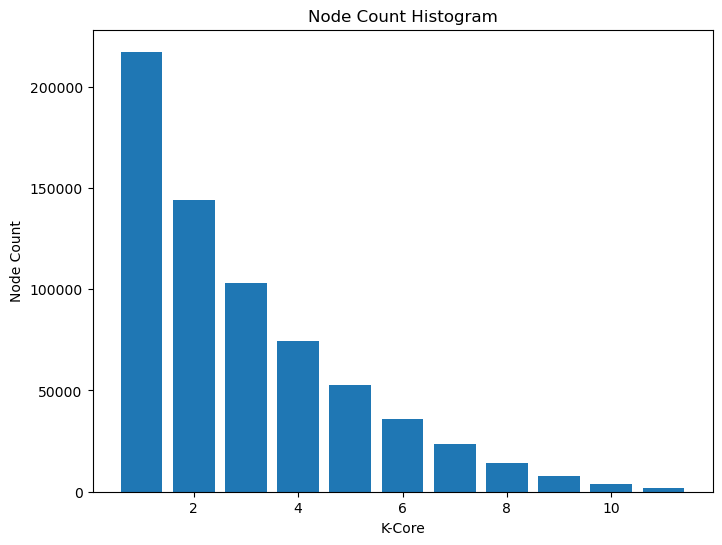

In [52]:
core_val = [i for i in test.keys()]
node_len = [test[j]['nodes'] for j in core_val]
plt.figure(figsize=(8, 6))
plt.bar(x=core_val, height=node_len)
plt.title("Node Count Histogram")
plt.xlabel("K-Core")
plt.ylabel("Node Count")
plt.show()

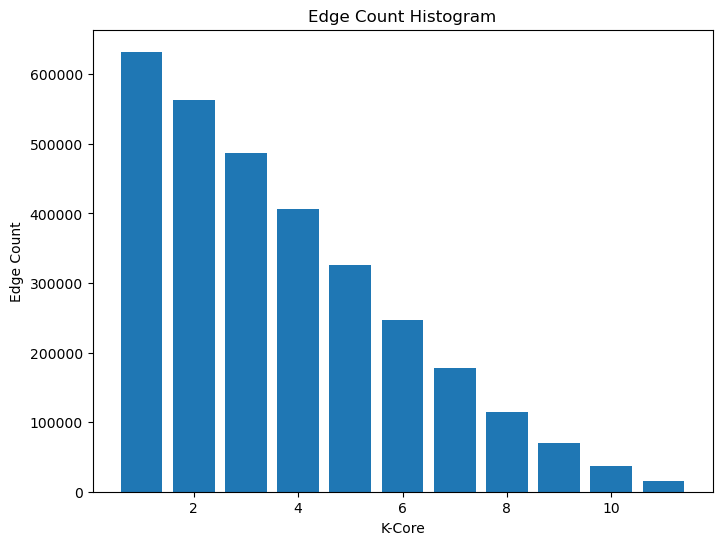

In [53]:
core_val = [i for i in test.keys()]
edge_len = [test[j]['edges'] for j in core_val]
plt.figure(figsize=(8, 6))
plt.bar(x=core_val, height=edge_len)
plt.title("Edge Count Histogram")
plt.xlabel("K-Core")
plt.ylabel("Edge Count")
plt.show()

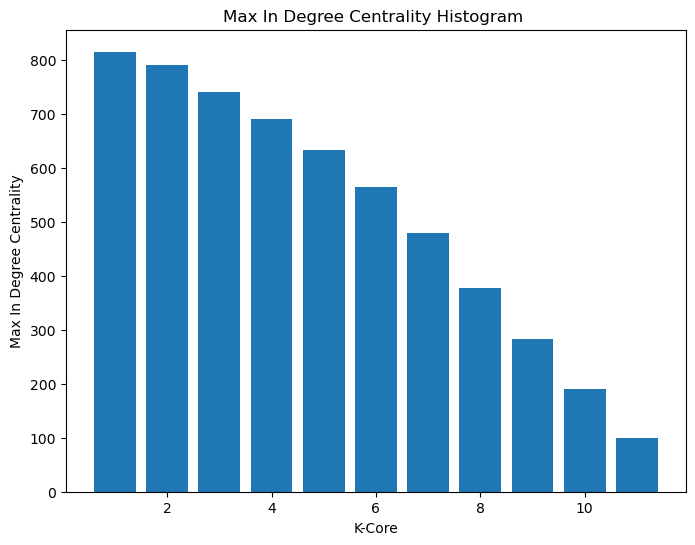

In [43]:
core_val = [i for i in test.keys()]
indeg_max = [test[j]['centralities']["In Degree"]["max"] for j in core_val]
plt.figure(figsize=(8, 6))
plt.bar(x=core_val, height=indeg_max)
plt.title("Max In Degree Centrality Histogram ")
plt.xlabel("K-Core")
plt.ylabel("Max In Degree Centrality")
plt.show()

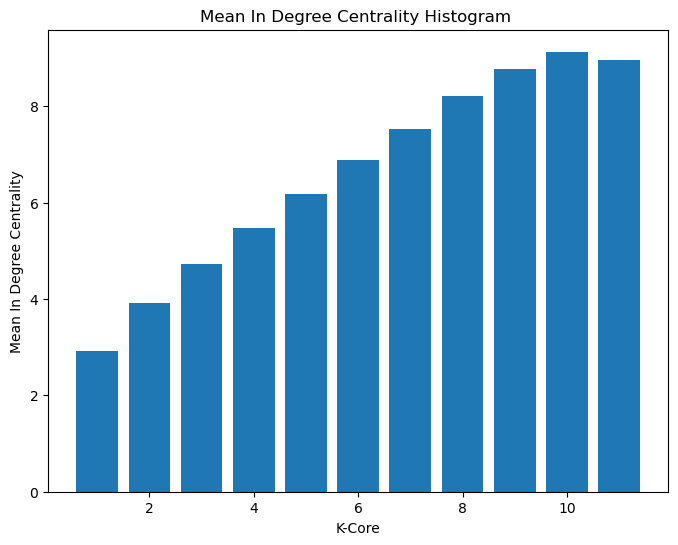

In [42]:
core_val = [i for i in test.keys()]
indeg_mean = [test[j]['centralities']["In Degree"]["mean"] for j in core_val]
plt.figure(figsize=(8, 6))
plt.bar(x=core_val, height=indeg_mean)
plt.title("Mean In Degree Centrality Histogram ")
plt.xlabel("K-Core")
plt.ylabel("Mean In Degree Centrality")
plt.show()

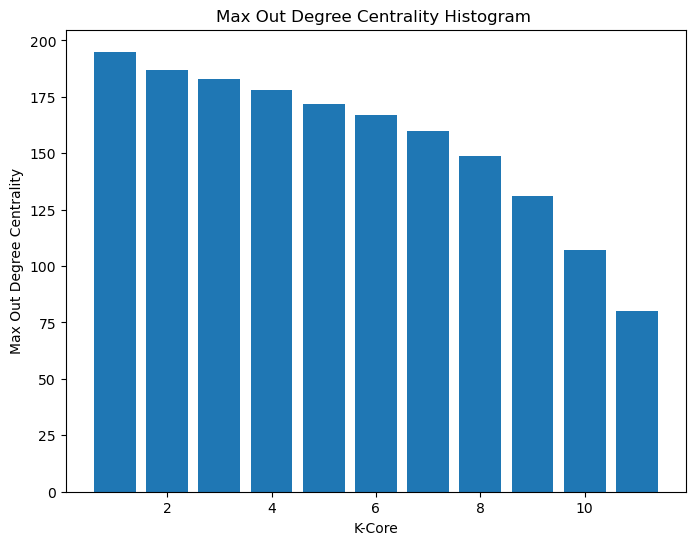

In [41]:
core_val = [i for i in test.keys()]
outdeg_max = [test[j]['centralities']["Out Degree"]["max"] for j in core_val]
plt.figure(figsize=(8, 6))
plt.bar(x=core_val, height=outdeg_max)
plt.title("Max Out Degree Centrality Histogram ")
plt.xlabel("K-Core")
plt.ylabel("Max Out Degree Centrality")
plt.show()

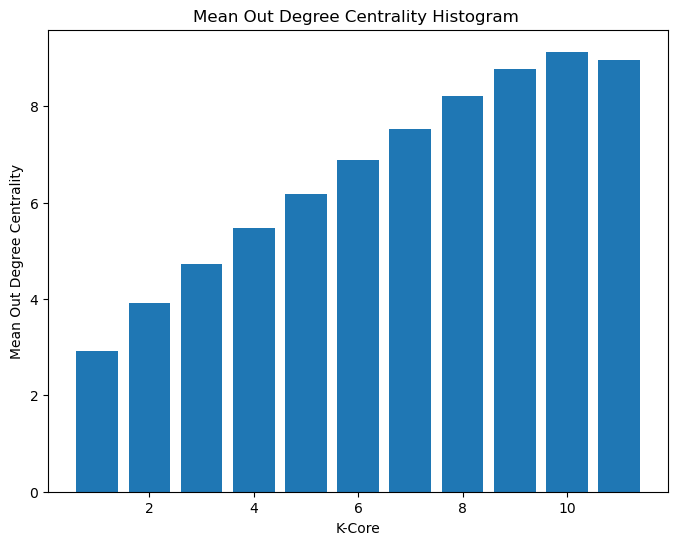

In [40]:
core_val = [i for i in test.keys()]
outdeg_mean = [test[j]['centralities']["Out Degree"]["mean"] for j in core_val]
plt.figure(figsize=(8, 6))
plt.bar(x=core_val, height=outdeg_mean)
plt.title("Mean Out Degree Centrality Histogram ")
plt.xlabel("K-Core")
plt.ylabel("Mean Out Degree Centrality")
plt.show()

In [6]:
core_graphs = {}
G.remove_edges_from(nx.selfloop_edges(G))
for i in range(1,12):
    core_graphs[i] = nx.k_core(G, k=i)

In [8]:
len(core_graphs[1].nodes())

217312

In [14]:
core_graphs[1].degree()

DiDegreeView({5: 1, 524293: 23, 524295: 2, 524296: 27, 524298: 1, 524299: 10, 12: 1, 524300: 5, 17: 9, 524306: 3, 21: 1, 524309: 1, 24: 4, 26: 1, 524317: 1, 524320: 2, 35: 3, 524325: 84, 524326: 10, 524327: 1, 524329: 1, 524330: 11, 524333: 1, 53: 7, 55: 1, 56: 9, 524345: 8, 58: 1, 524351: 2, 524355: 10, 524358: 3, 74: 9, 524363: 1, 76: 1, 524364: 2, 524365: 7, 79: 2, 524368: 8, 524371: 1, 86: 1, 90: 1, 94: 1, 524382: 1, 524383: 4, 101: 2, 107: 2, 524396: 1, 110: 4, 524398: 1, 112: 1, 113: 4, 524399: 3, 524401: 1, 524402: 2, 524404: 4, 524407: 3, 524408: 2, 125: 3, 126: 2, 524413: 1, 524417: 20, 524418: 1, 524419: 34, 524422: 16, 135: 1, 524426: 41, 141: 1, 146: 5, 524436: 2, 524437: 5, 524440: 11, 154: 5, 158: 8, 524454: 7, 524457: 7, 524458: 10, 171: 2, 524459: 2, 173: 1, 524464: 24, 524468: 6, 524469: 6, 524471: 11, 524474: 2, 188: 7, 190: 1, 524478: 5, 192: 1, 524479: 1, 524482: 3, 524484: 15, 198: 1, 524492: 1, 524493: 1, 524495: 13, 524496: 1, 524498: 11, 524501: 4, 524502: 20, 5

In [122]:
def core_degrees(G, core_start=1, core_end=11):

    # Inserted to prevent errors from self loops
    G.remove_edges_from(nx.selfloop_edges(G))
    core_degrees = {}
    for k in range(core_start, core_end + 1):
        core_degrees[k] = {}

    # Centrality calculations
    for k in range(core_start, core_end + 1):
        core_graph = nx.k_core(G, k=k)
        
        core_degrees[k]['Degree'] = core_graph.degree()

        core_degrees[k]['In Degree'] = core_graph.in_degree()

        core_degrees[k]['Out Degree'] = core_graph.out_degree()

        core_degrees[k]['closeness'] = nx.closeness_centrality(core_graph)

        core_degrees[k]['Betweenness'] = nx.betweenness_centrality(core_graph)

        core_degrees[k]['Eigenvector'] = nx.eigenvector_centrality(core_graph)

        core_degrees[k]['Katz'] = nx.katz_centrality(core_graph)

    return core_degrees


def hist_cent_plotter(core_deg, feature): # for deg, indeg, and out deg
    for i in core_deg:
        test = [v for _, v in core_deg[i][feature]]
        test2 = np.array(test)
        plt.figure(figsize=(8, 6))
        plt.hist(test2, bins=100)
        plt.title(f"{feature} Centrality Histogram for {i}-Core")
        plt.xlabel(f"{feature} Centrality")
        plt.ylabel("Counts")
        plt.show()

def hist_cent_plotter2(core_deg, feature): # for deg, indeg, and out deg
    for i in core_deg:
        test = list(core_deg[i][feature].values())
        test2 = np.array(test)
        plt.figure(figsize=(8, 6))
        plt.hist(test2, bins=100)
        plt.title(f"{feature} Centrality Histogram for {i}-Core")
        plt.xlabel(f"{feature} Centrality")
        plt.ylabel("Counts")
        plt.show()

In [40]:
core_deg = core_degrees(G, core_start=1, core_end=11)

### Plots of k-cores

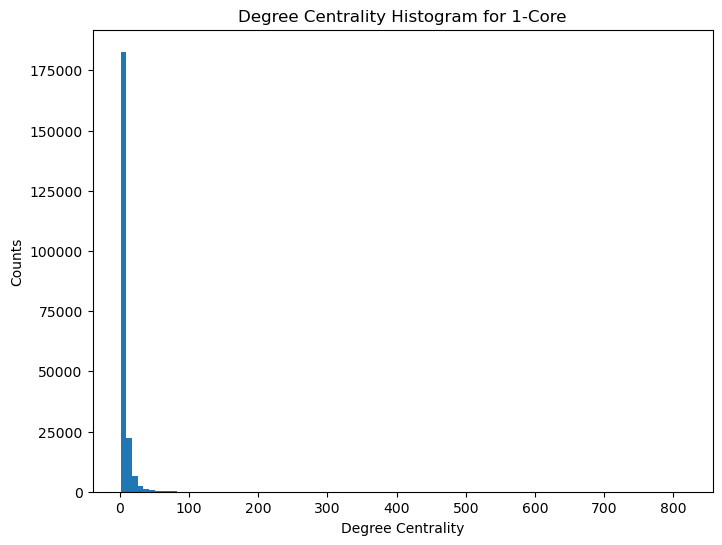

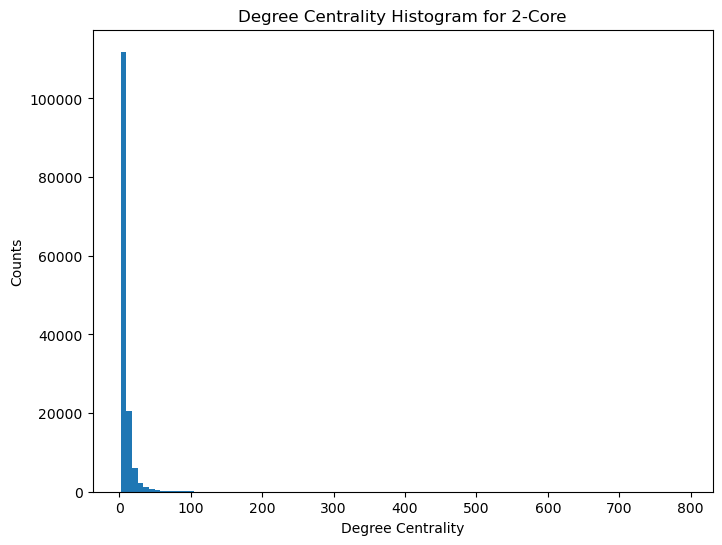

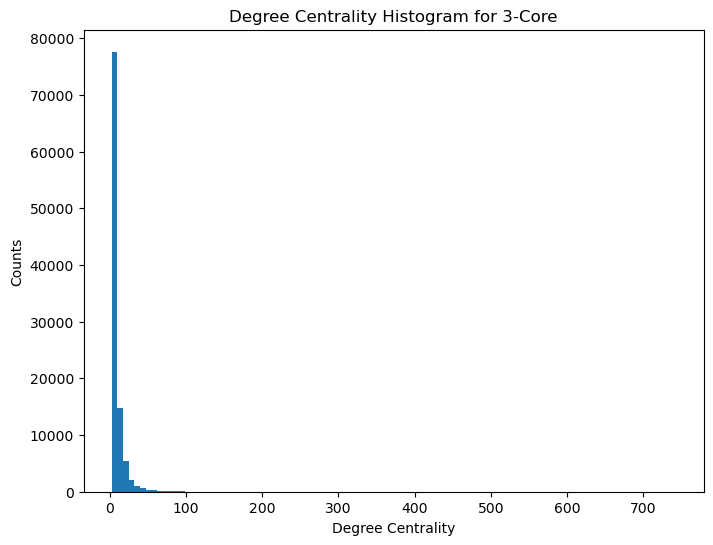

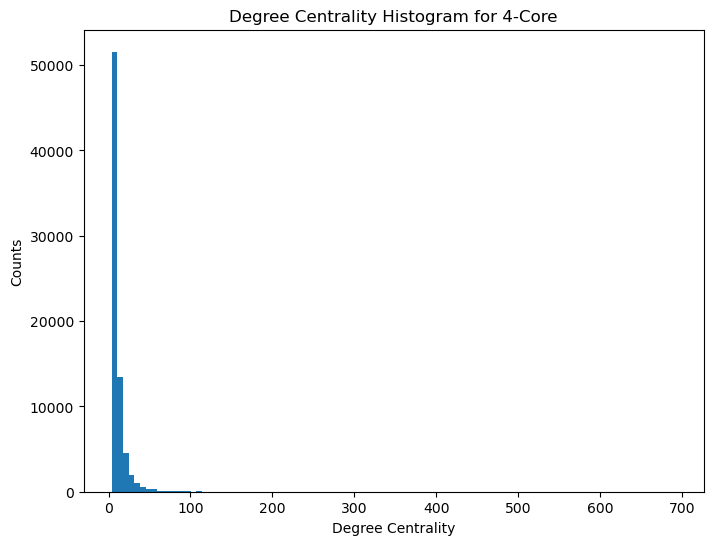

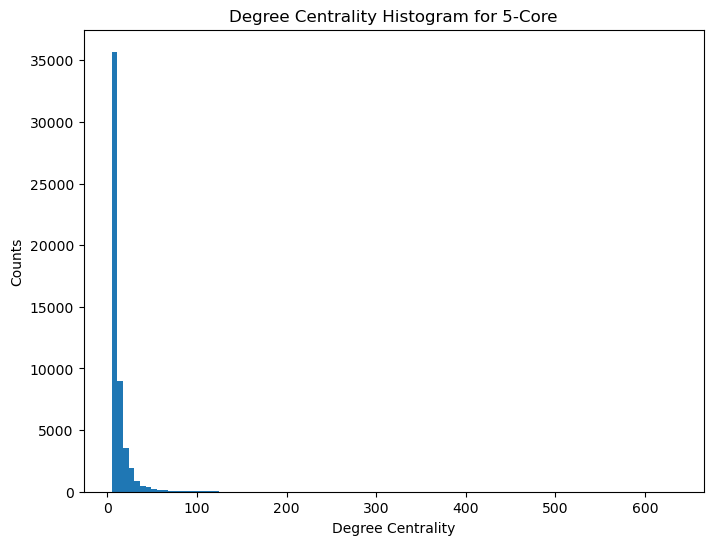

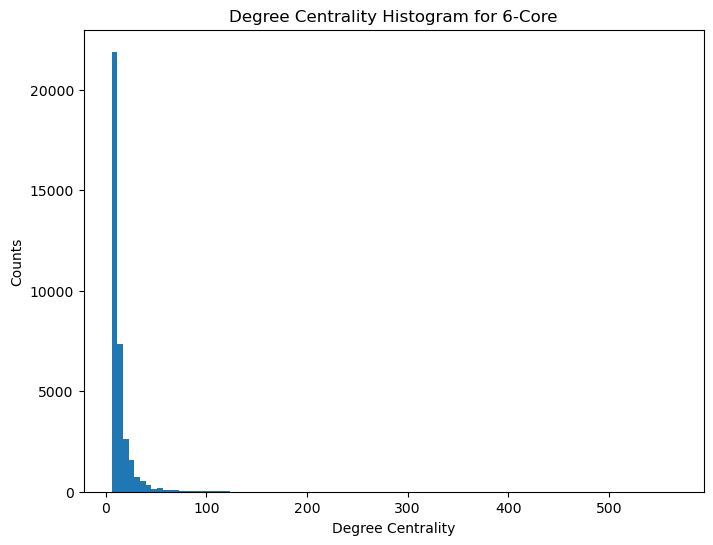

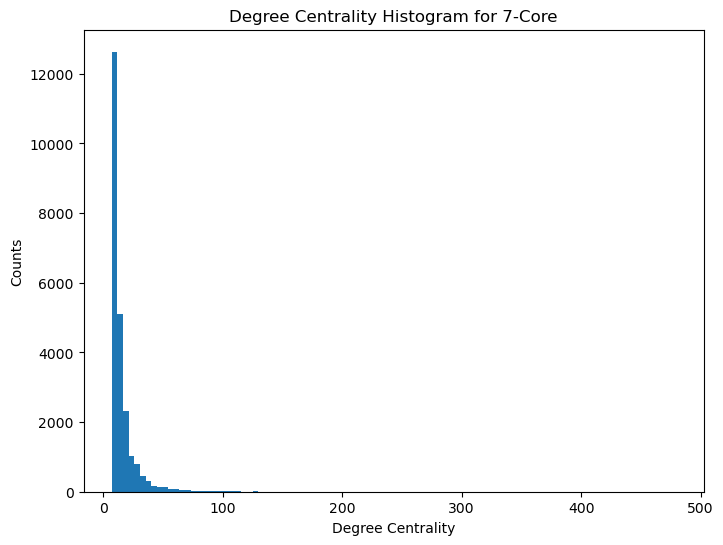

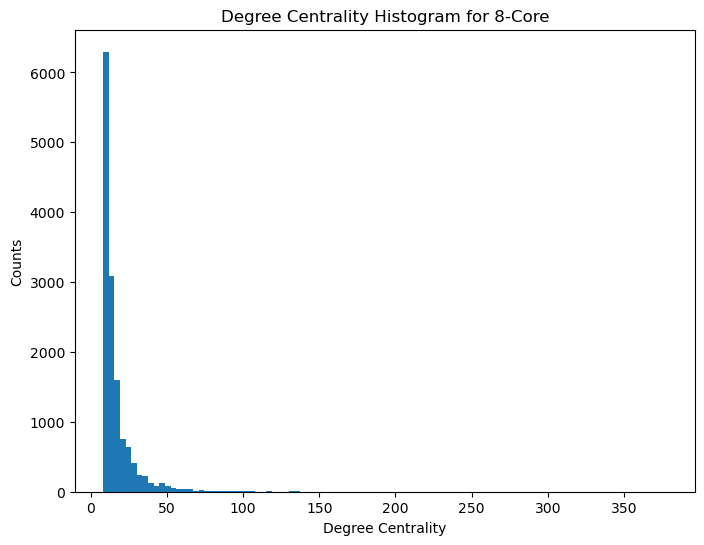

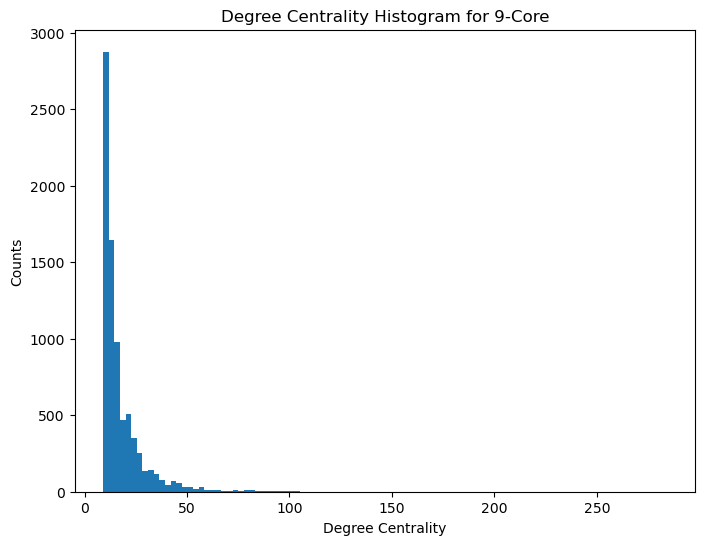

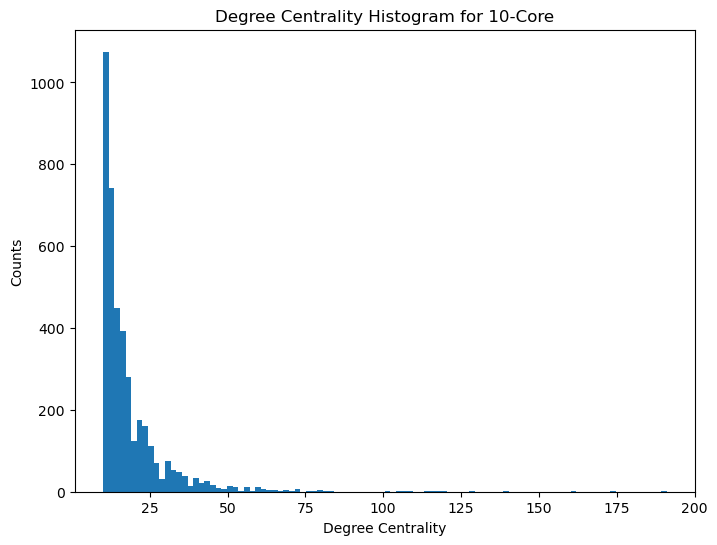

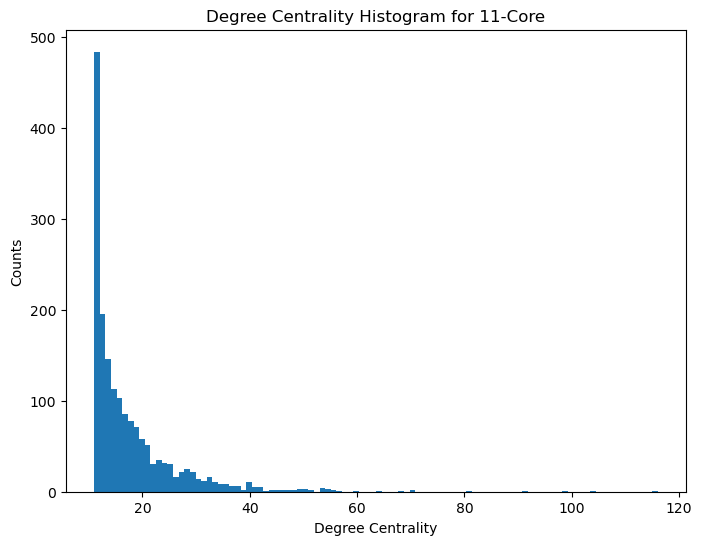

In [119]:
hist_cent_plotter(core_deg, 'Degree')

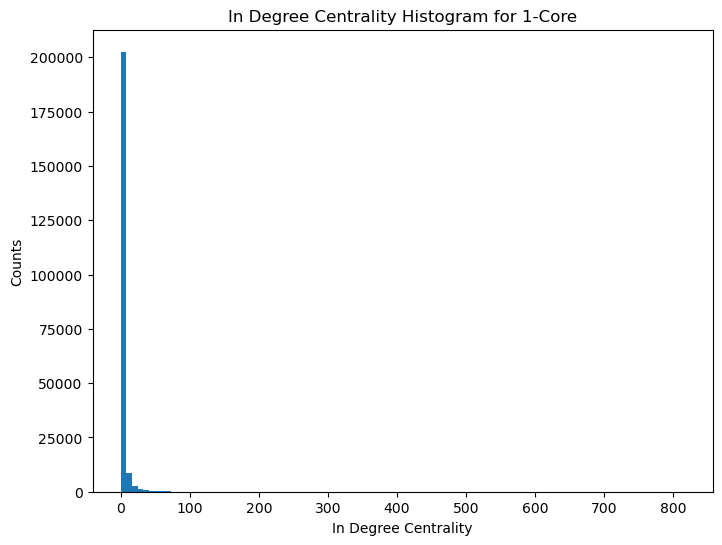

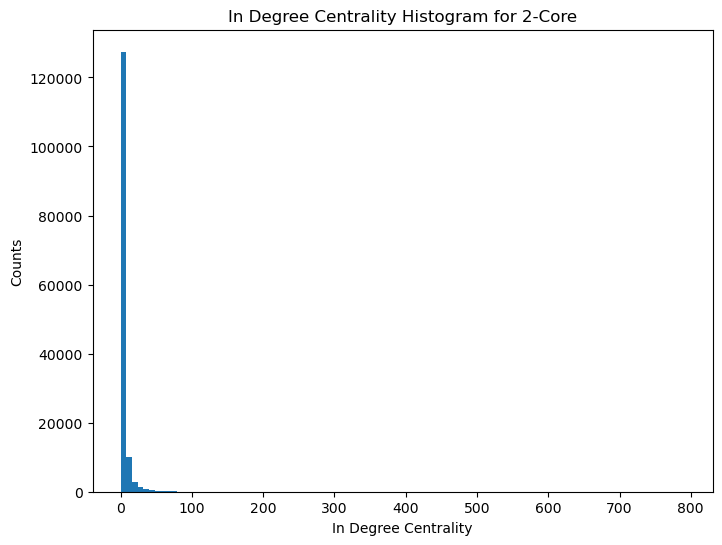

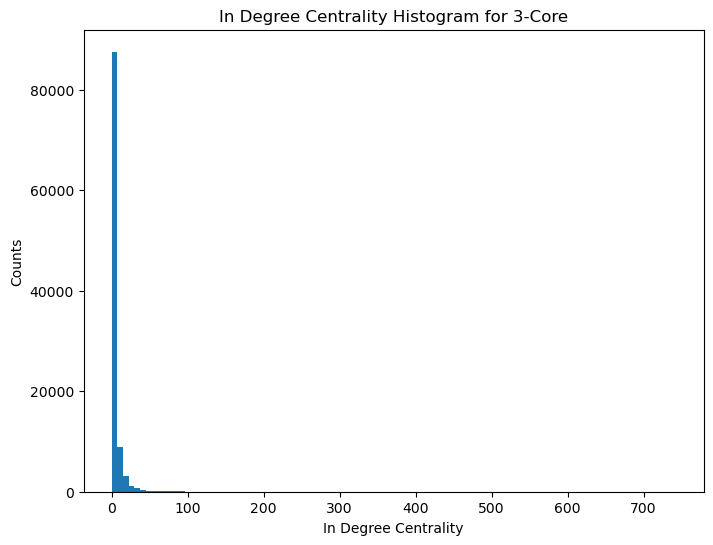

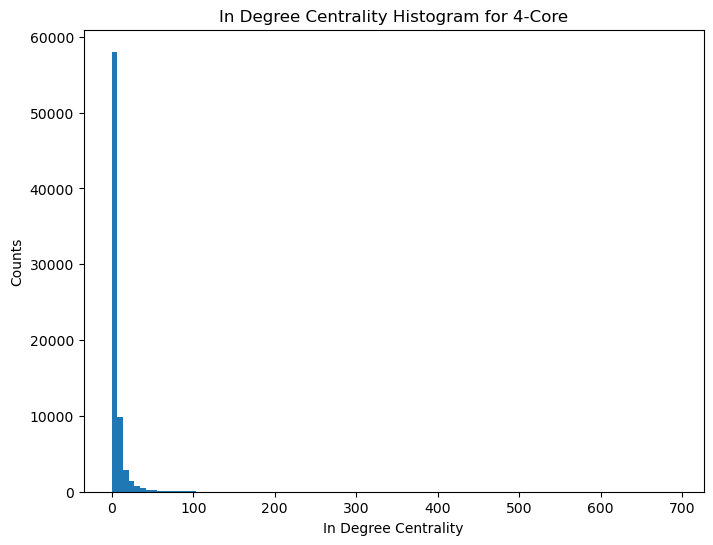

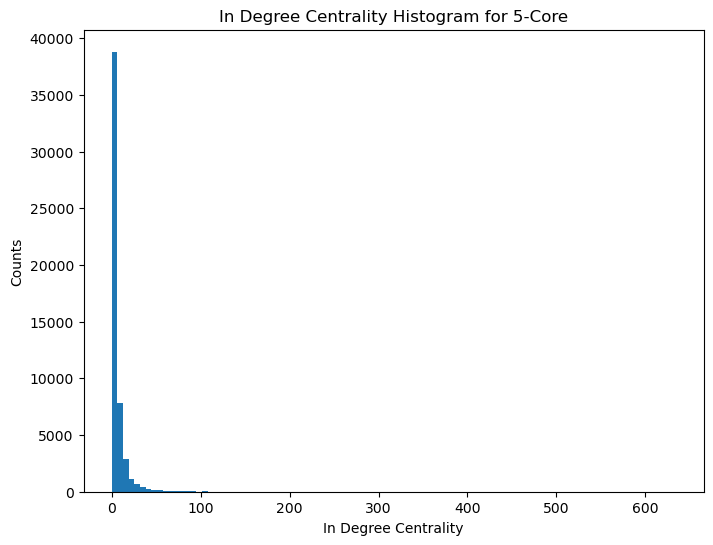

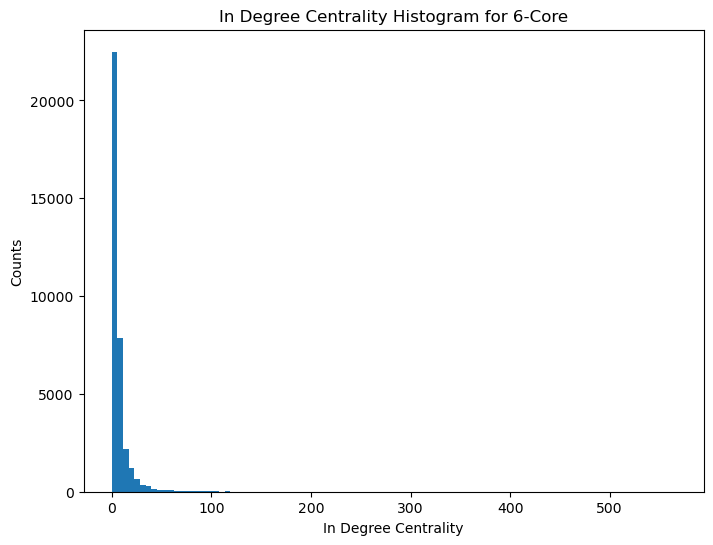

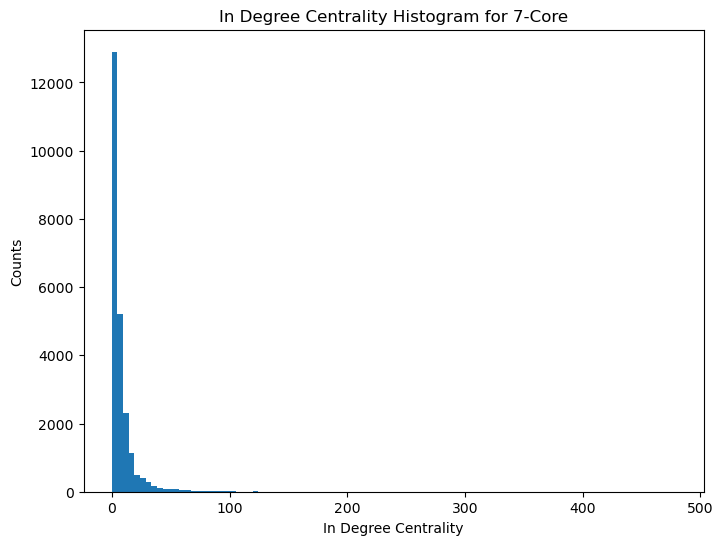

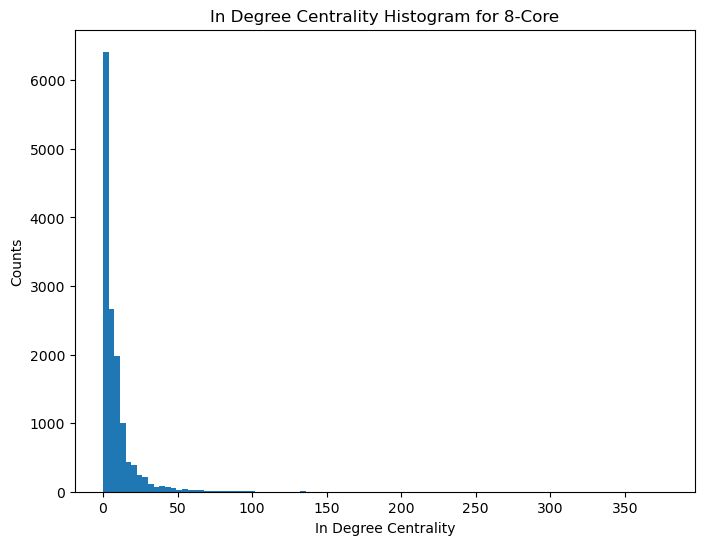

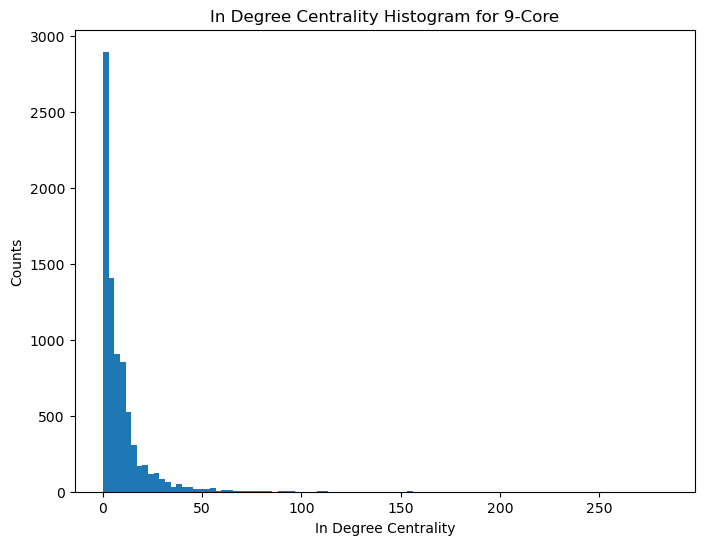

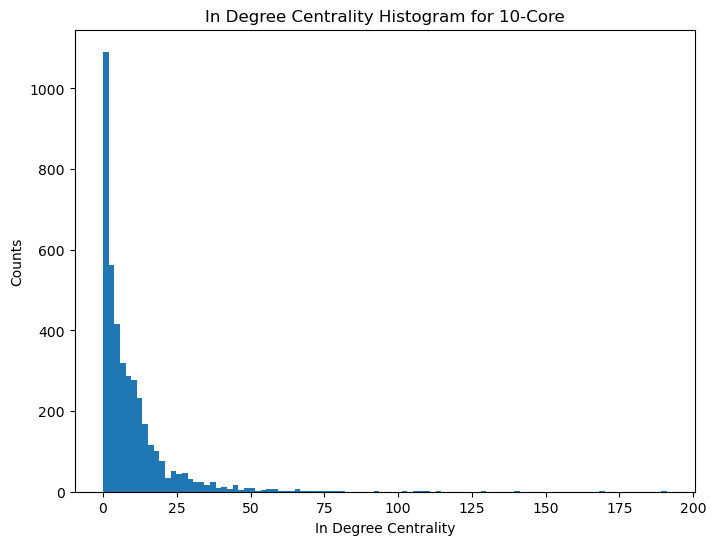

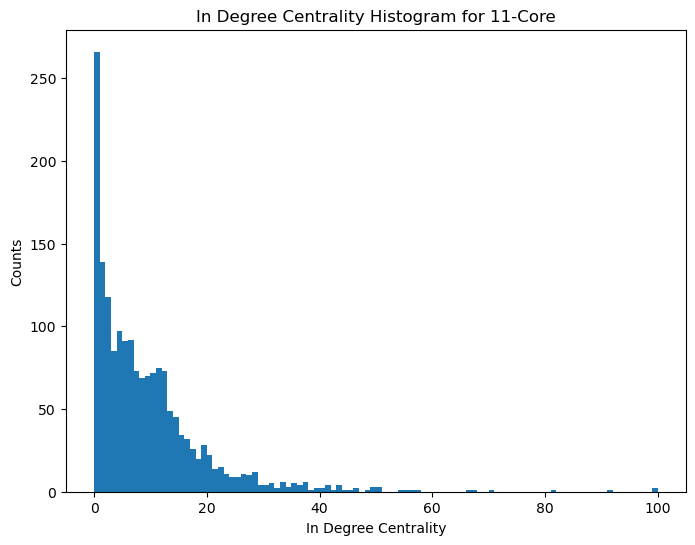

In [118]:
hist_cent_plotter(core_deg, 'In Degree')

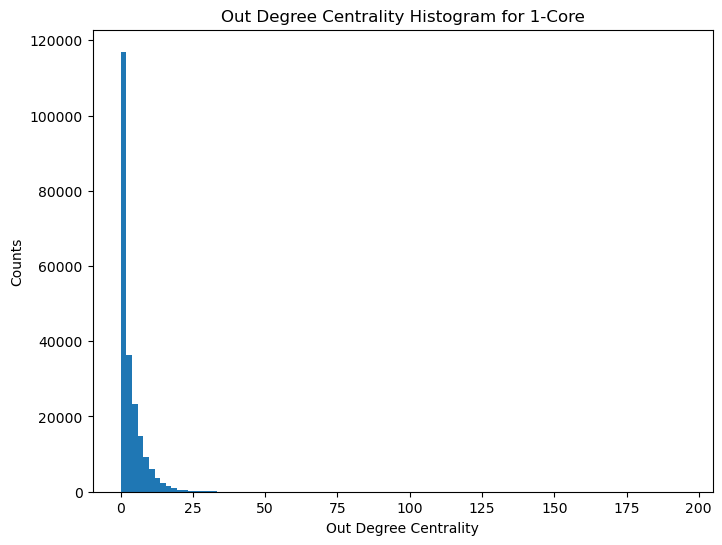

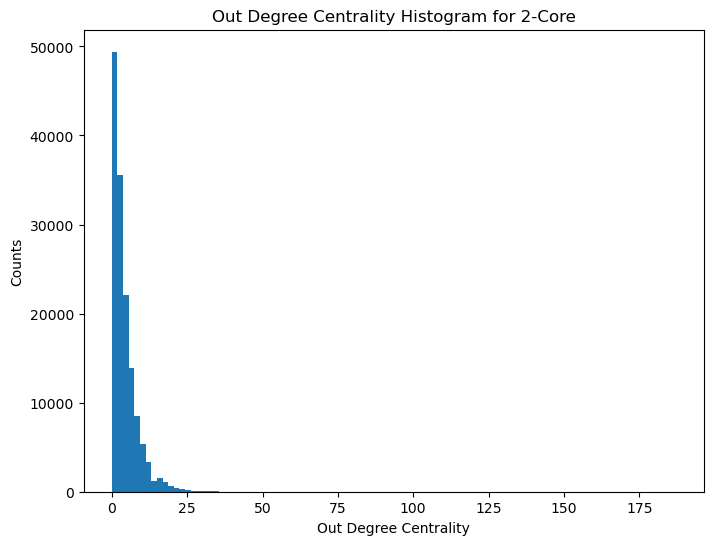

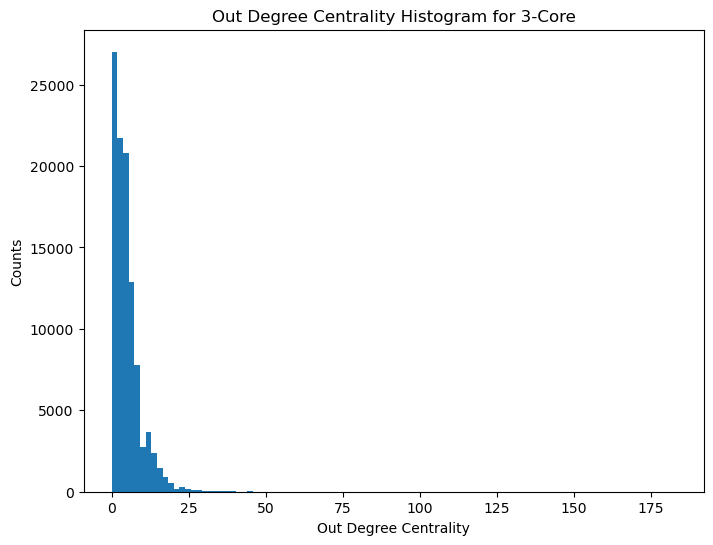

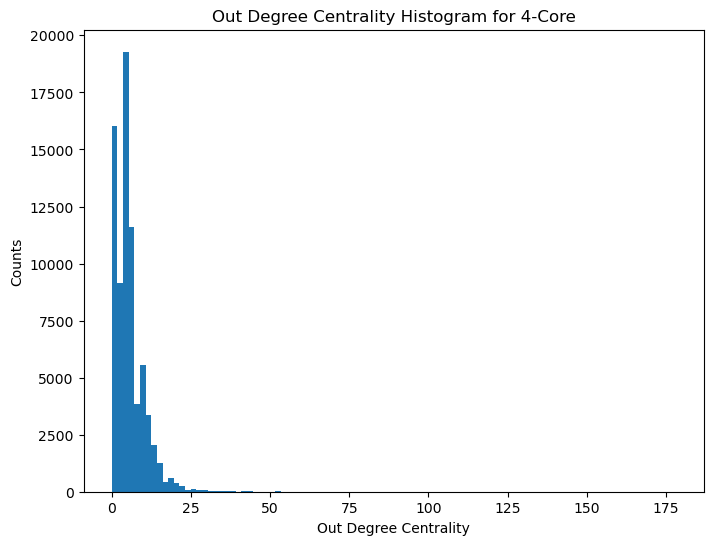

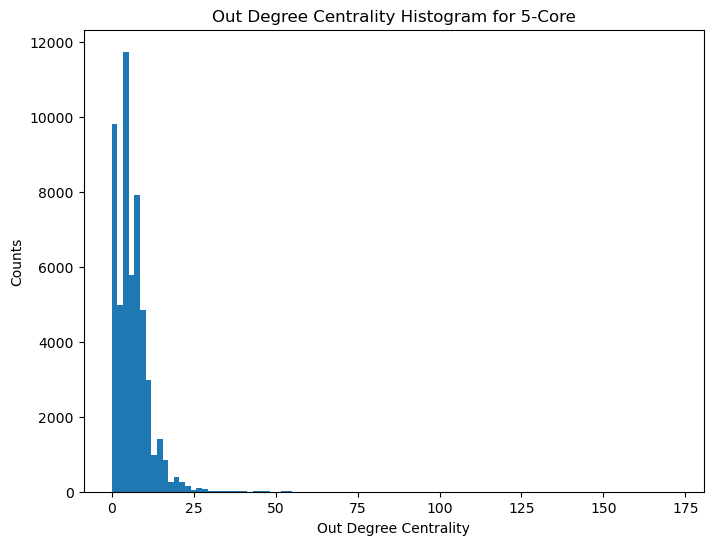

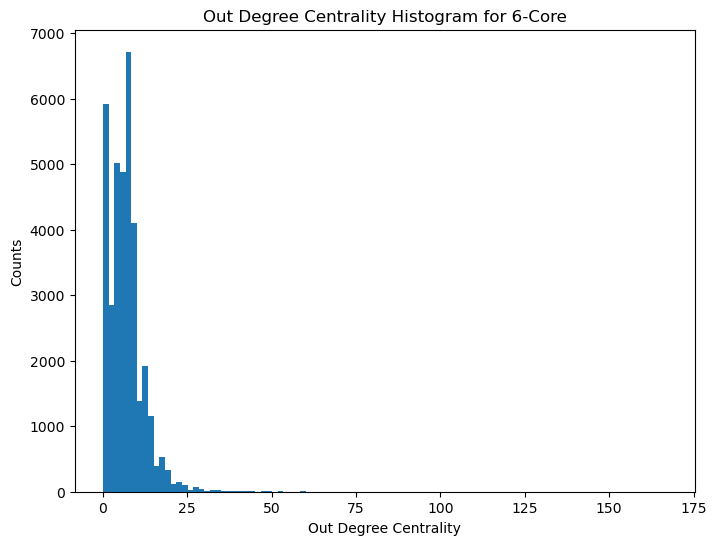

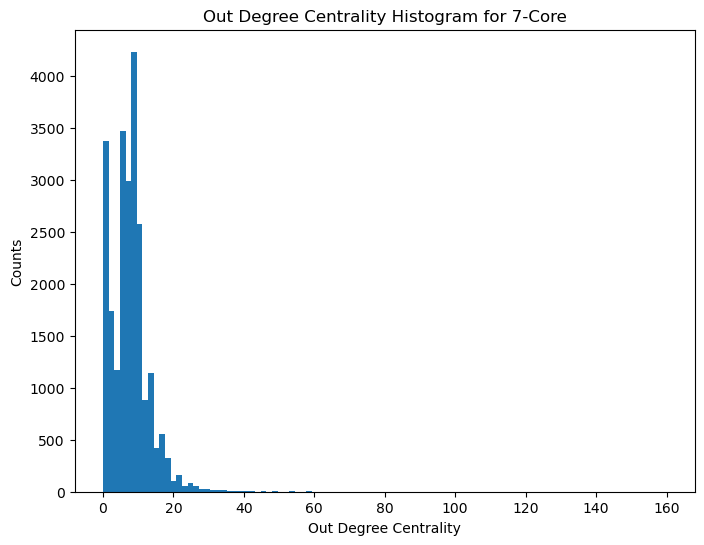

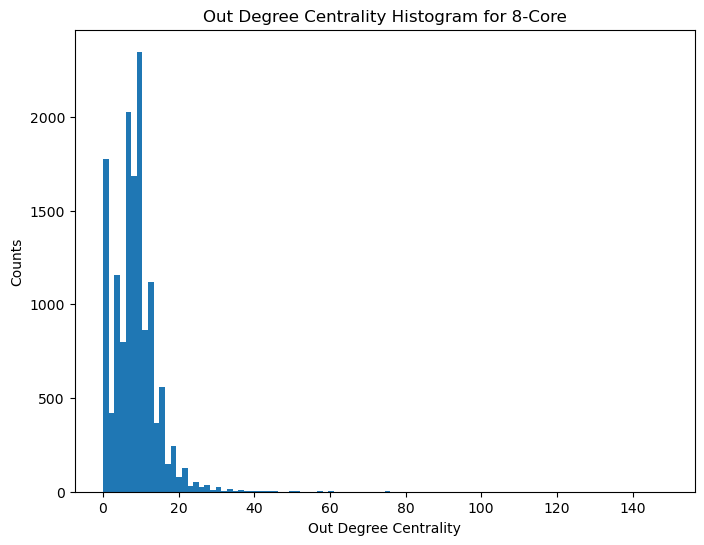

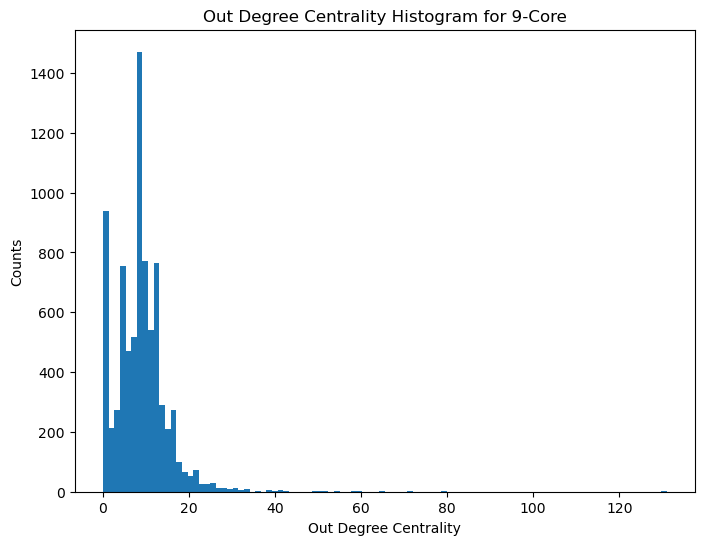

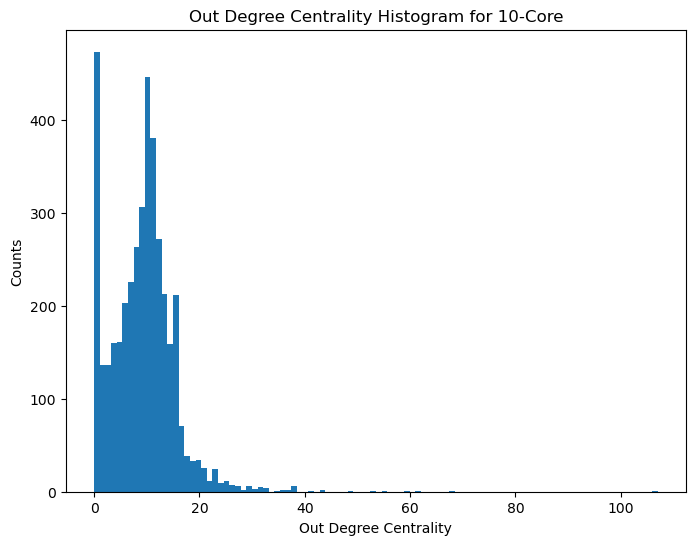

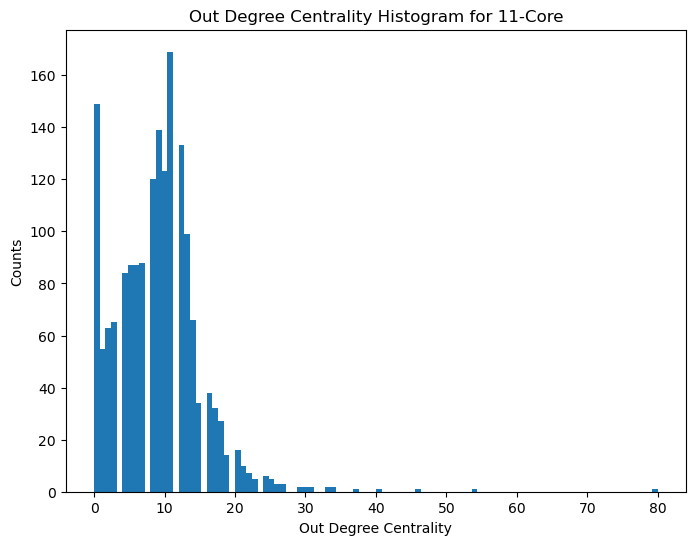

In [120]:
hist_cent_plotter(core_deg, 'Out Degree')

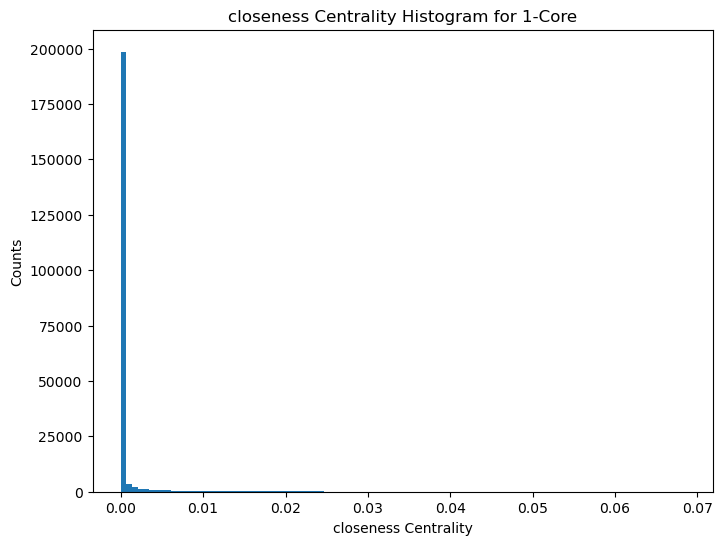

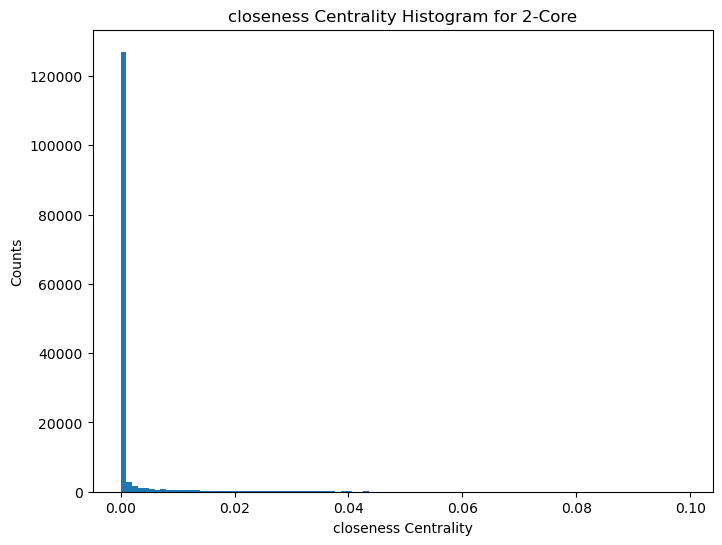

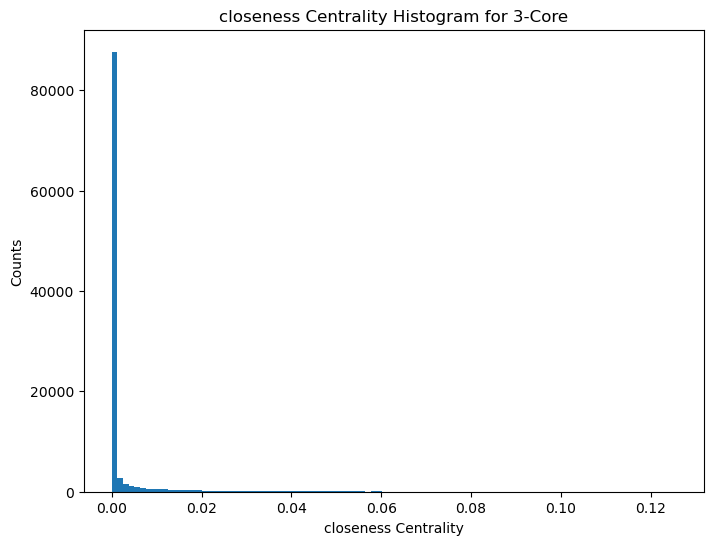

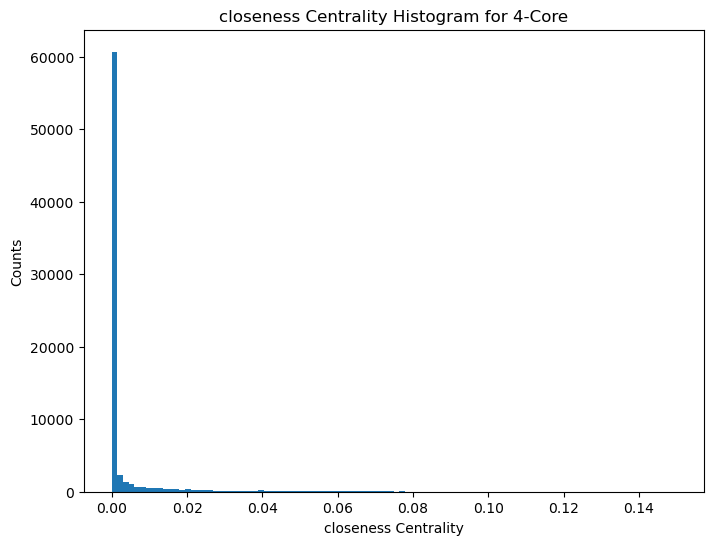

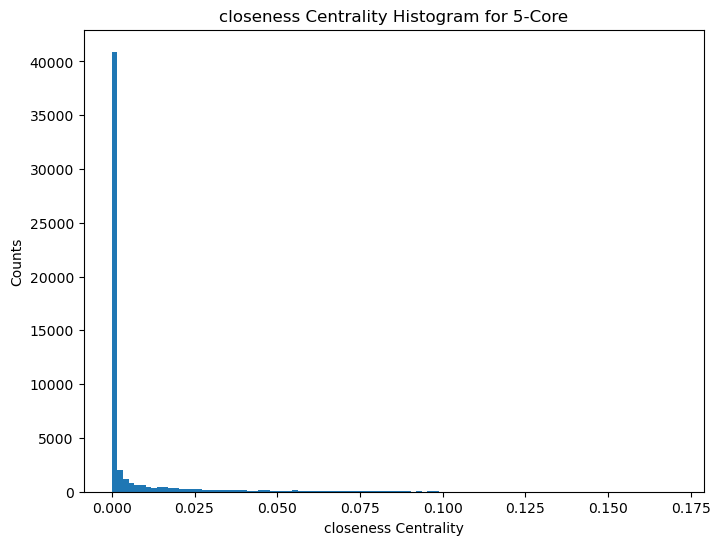

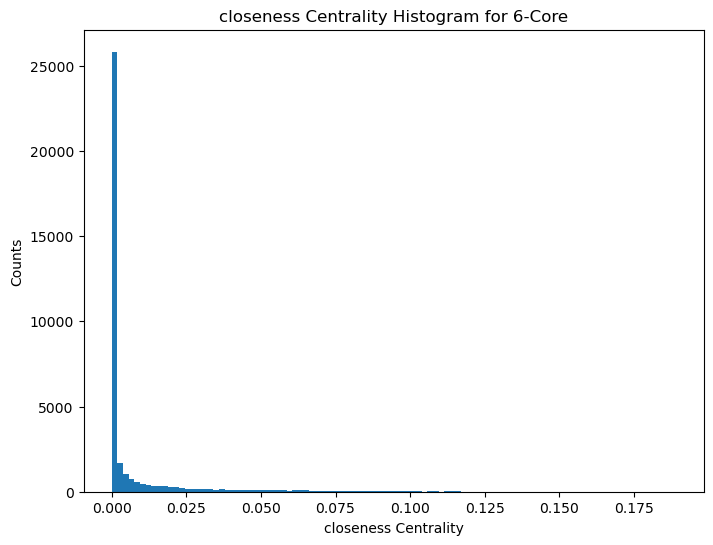

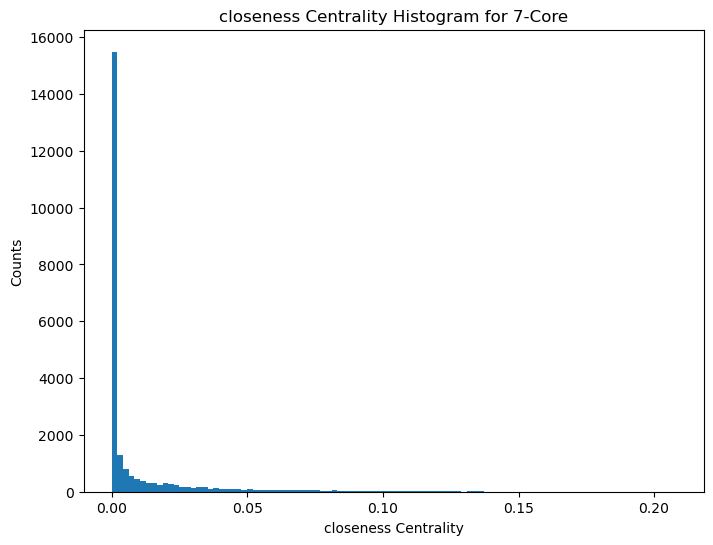

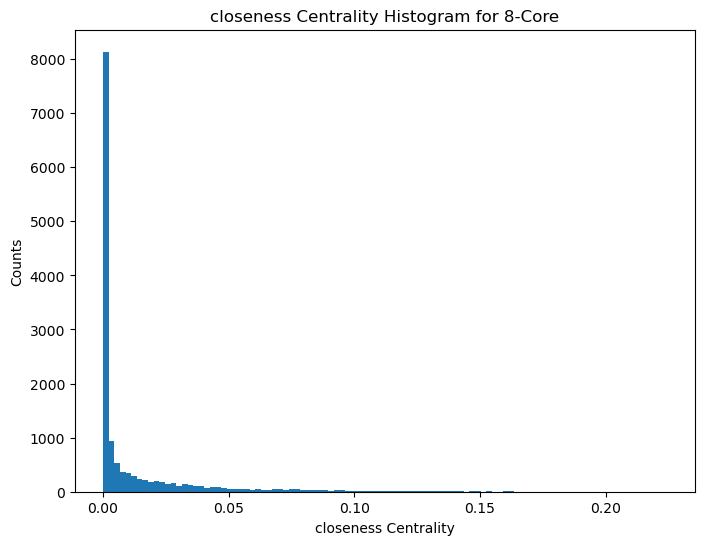

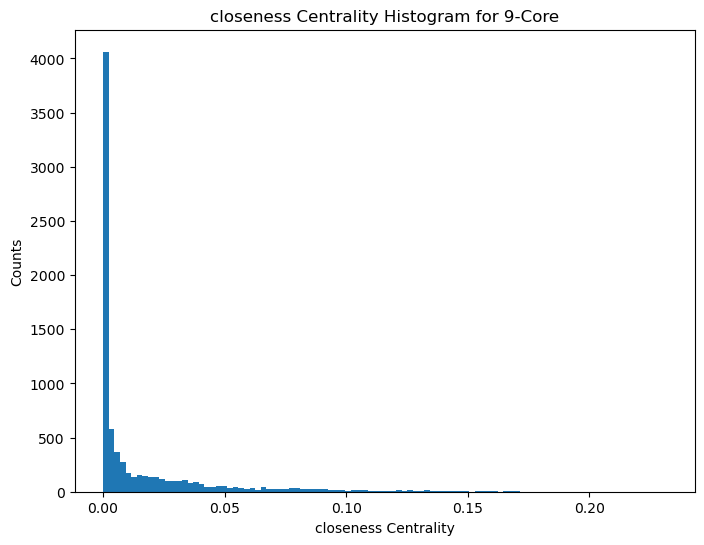

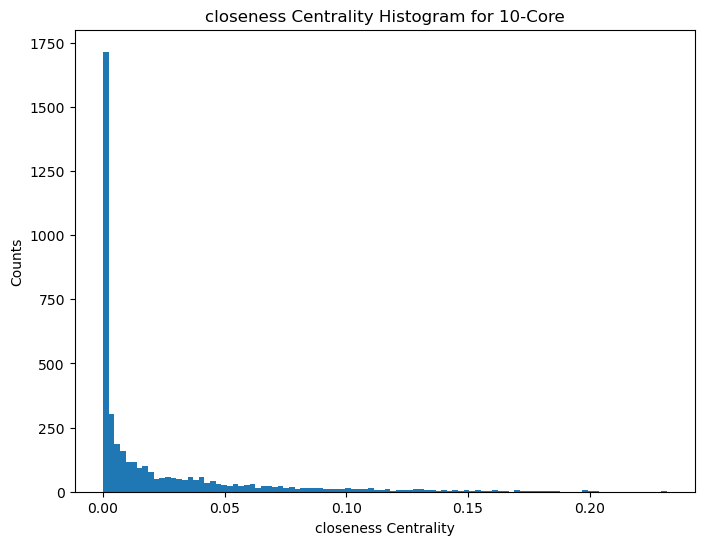

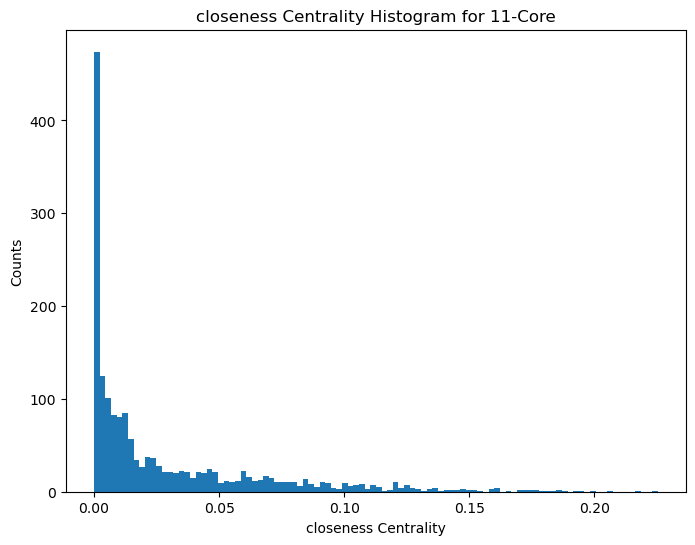

In [123]:
hist_cent_plotter2(core_deg, 'closeness')

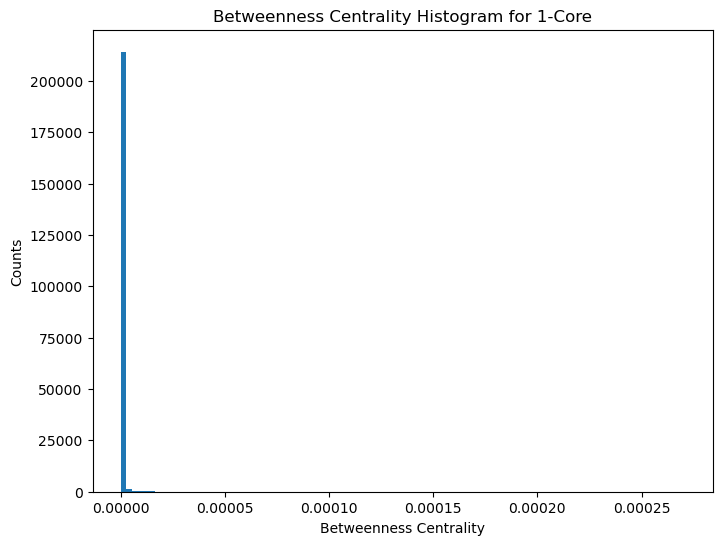

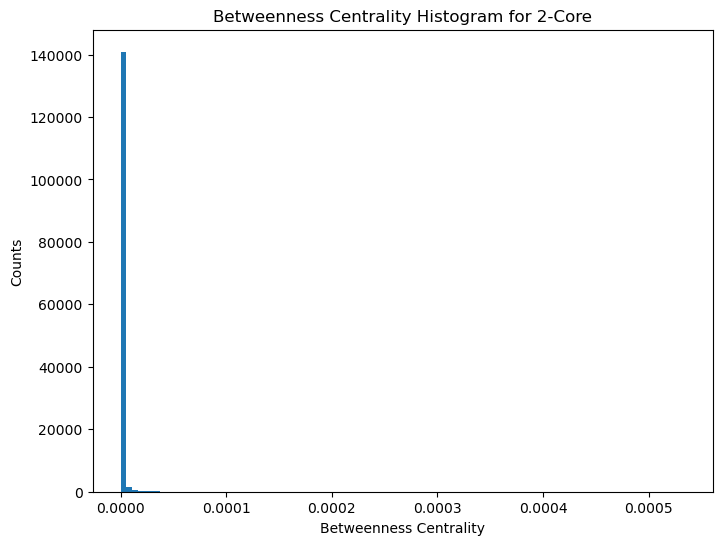

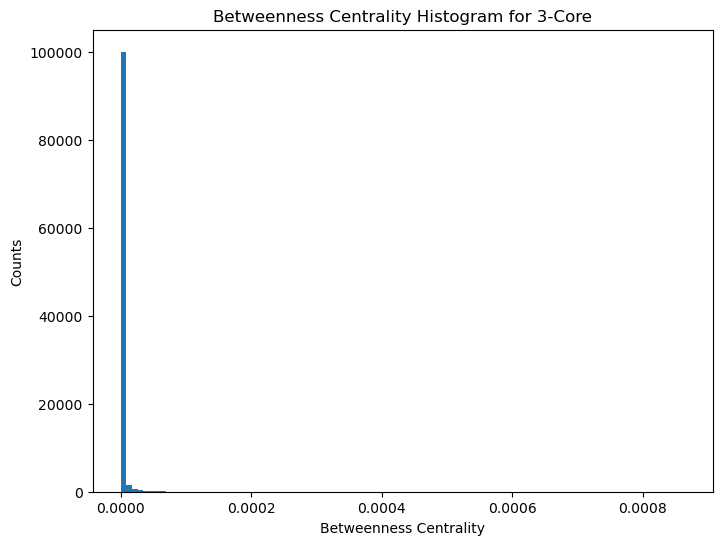

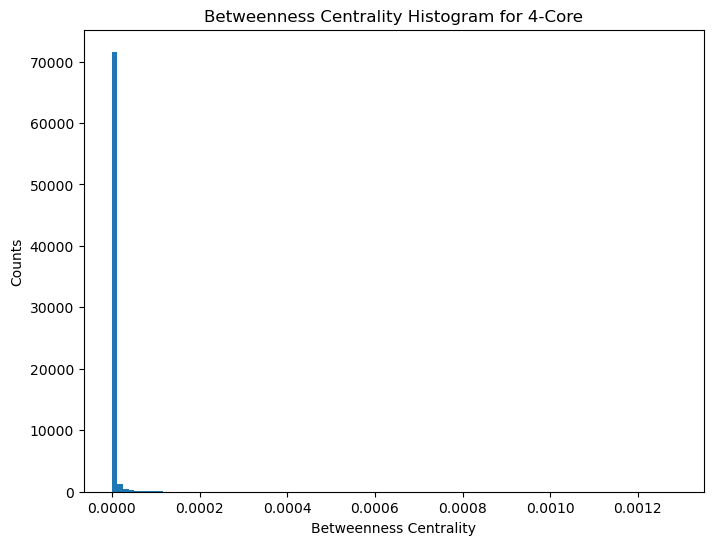

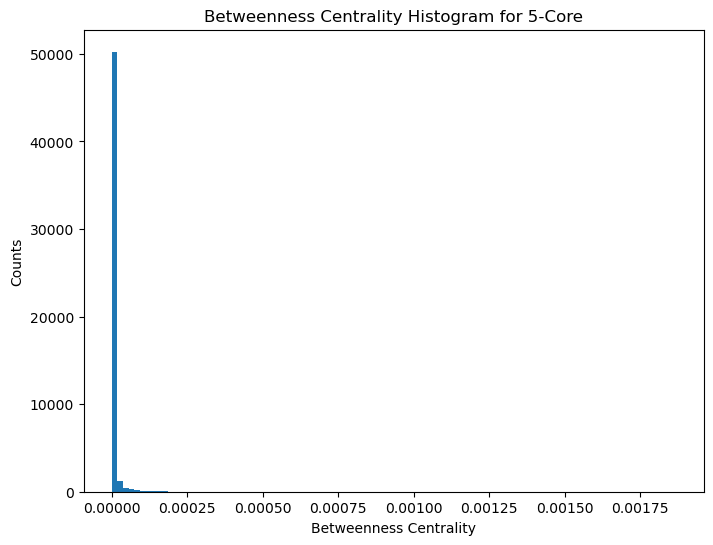

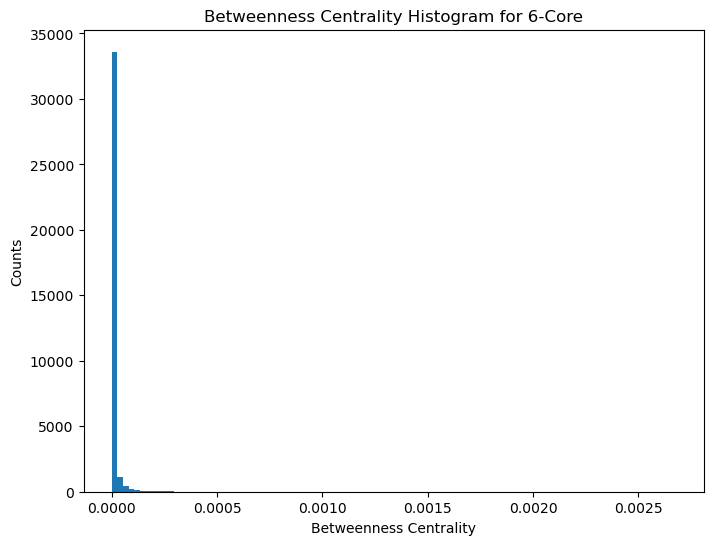

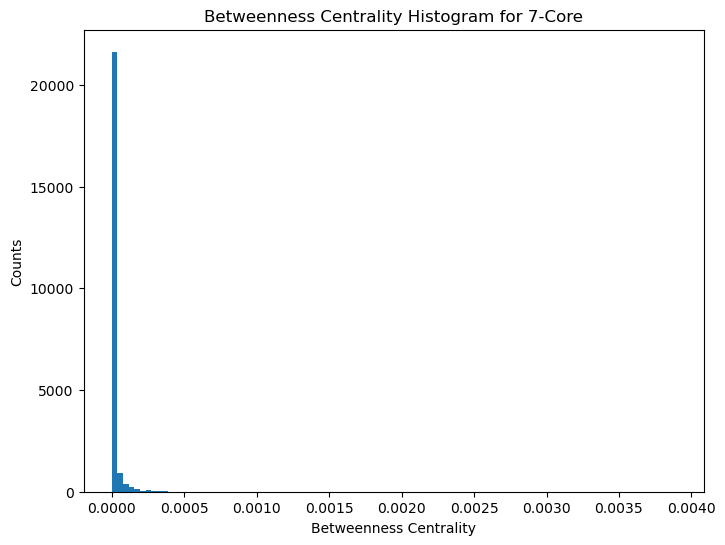

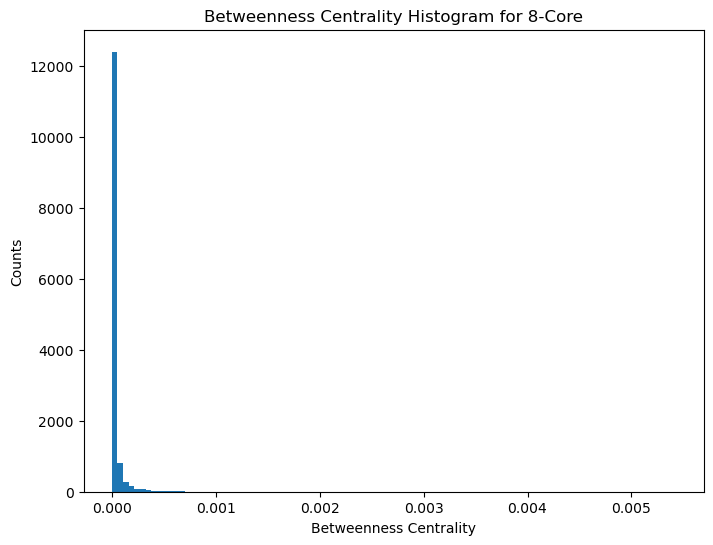

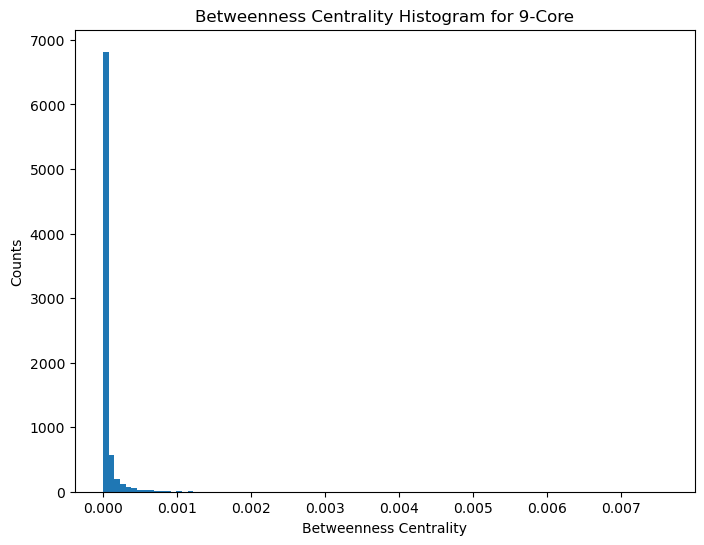

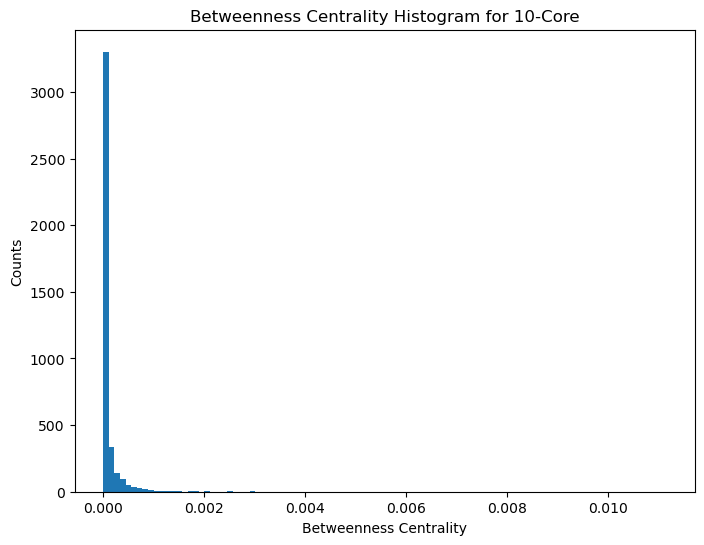

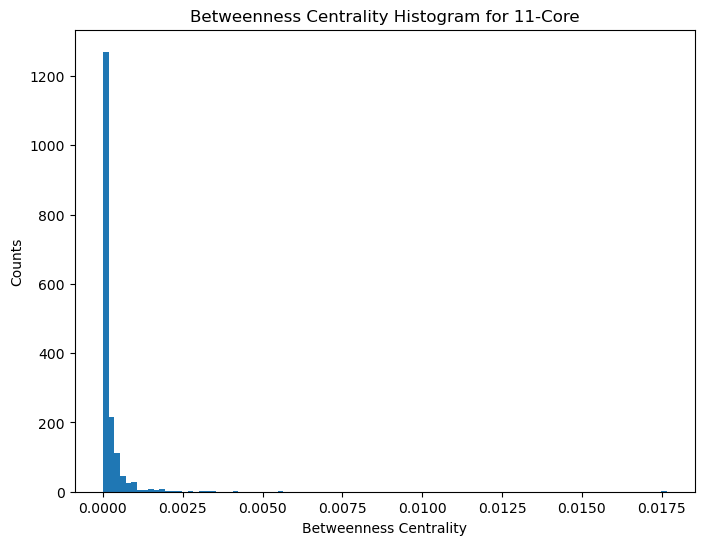

In [124]:
hist_cent_plotter2(core_deg, 'Betweenness')

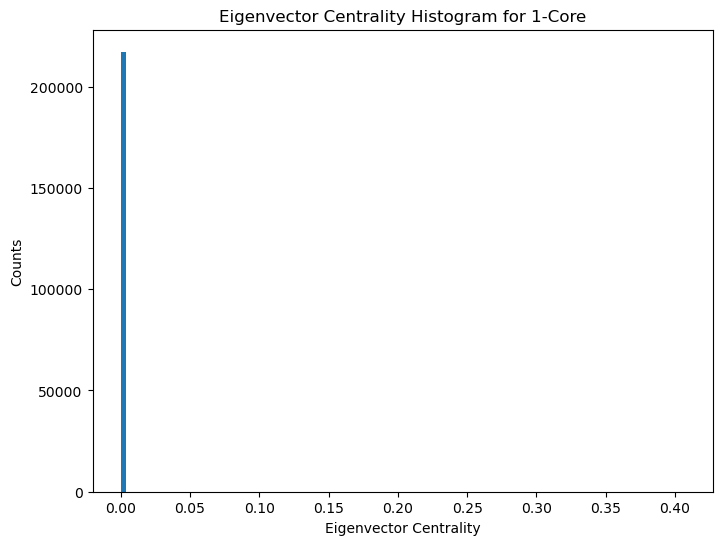

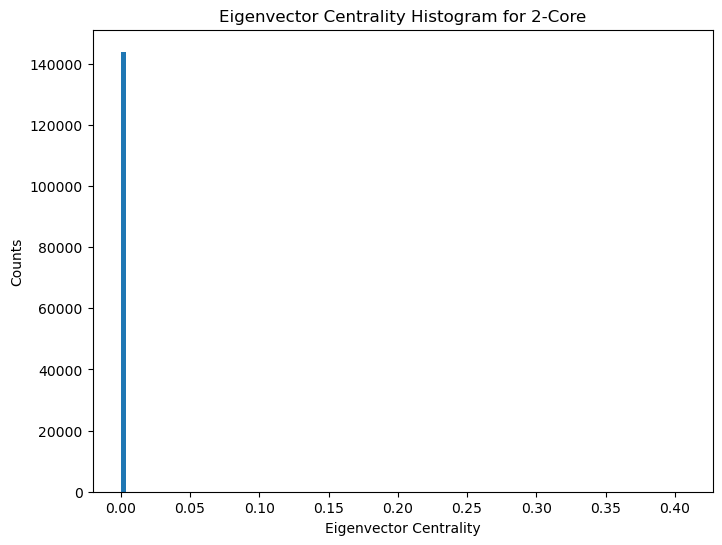

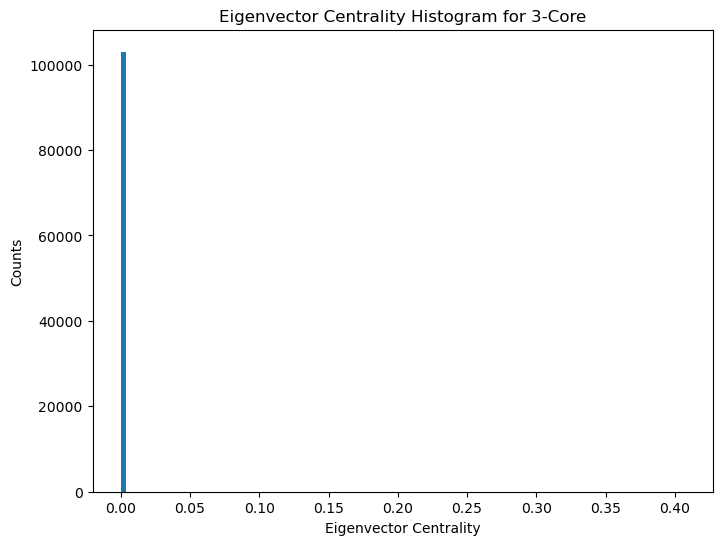

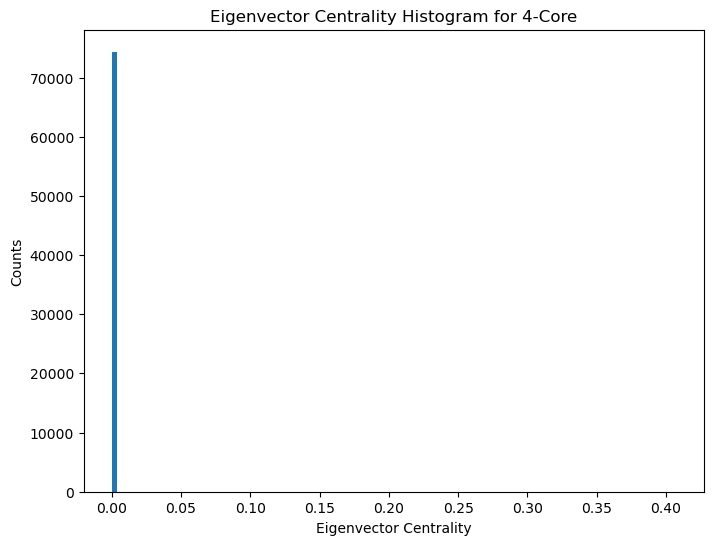

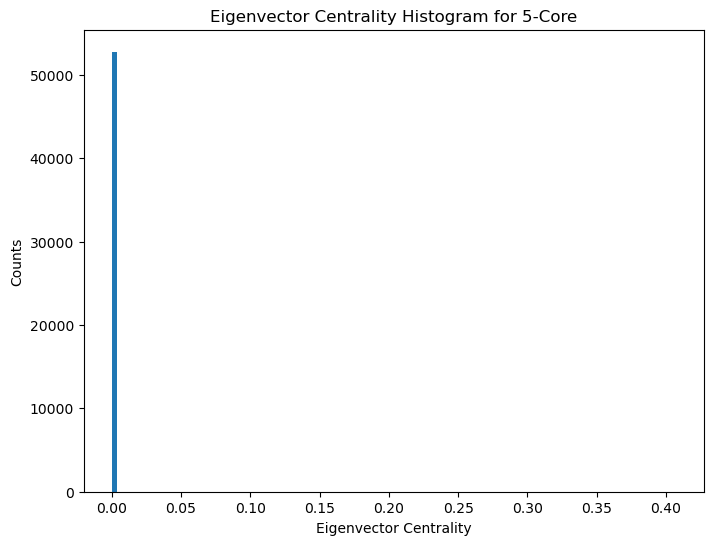

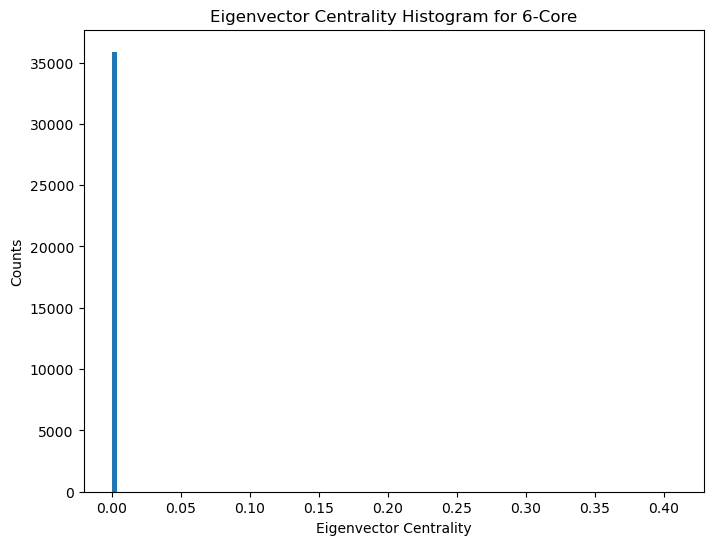

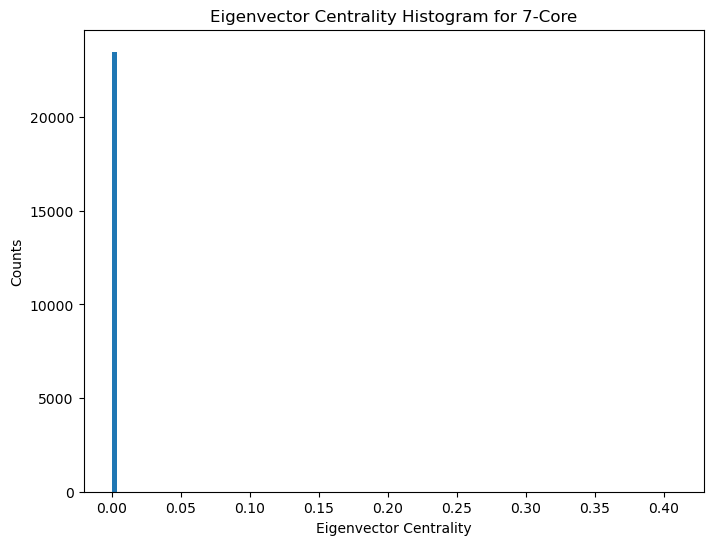

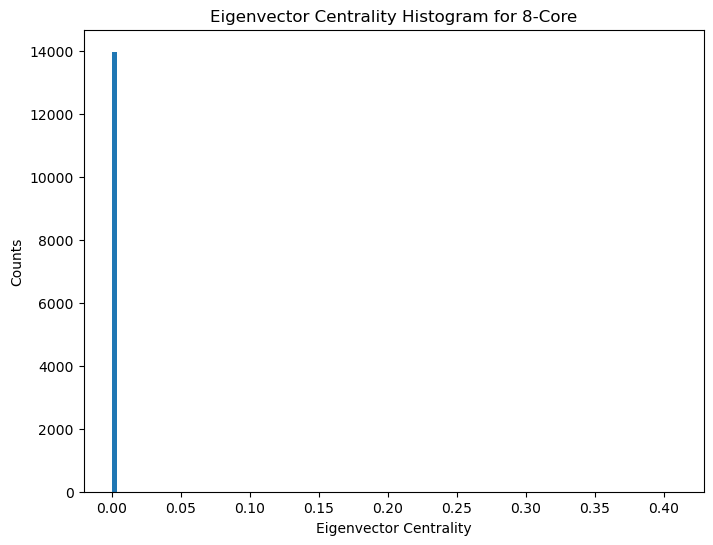

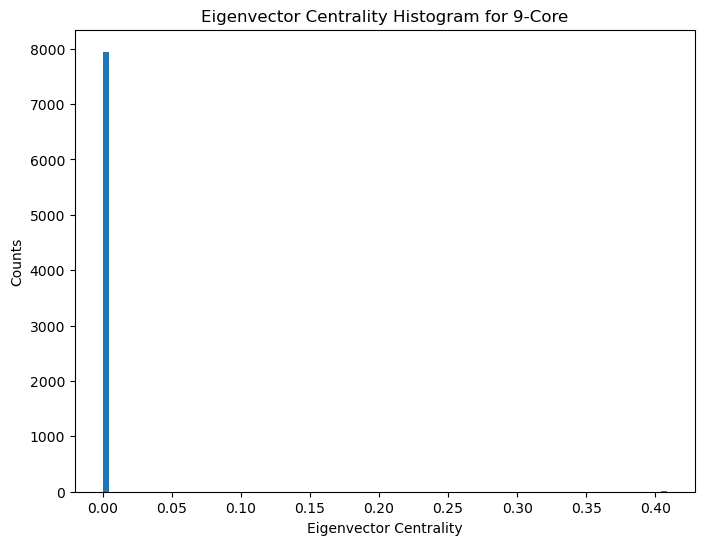

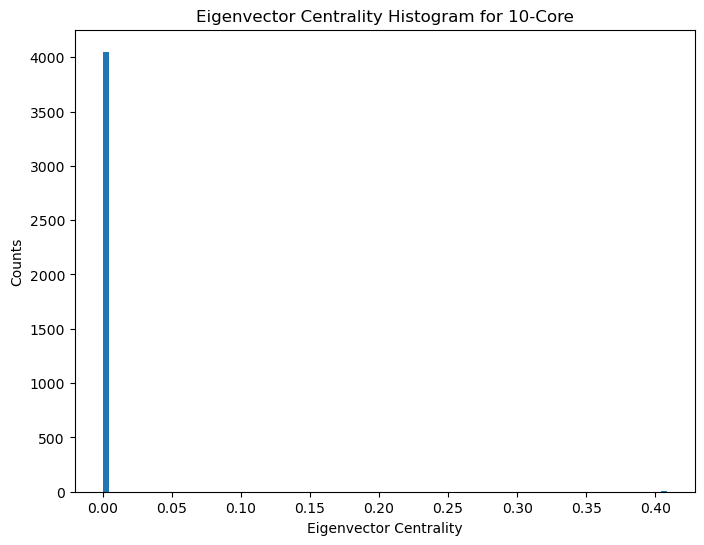

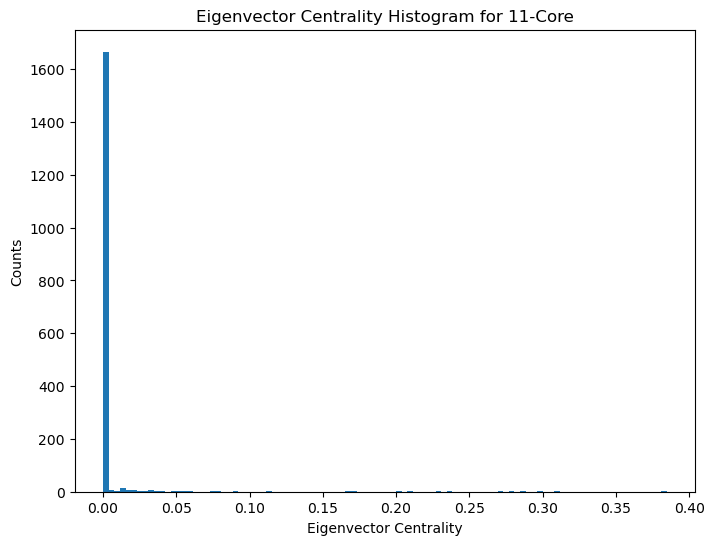

In [125]:
hist_cent_plotter2(core_deg, 'Eigenvector')

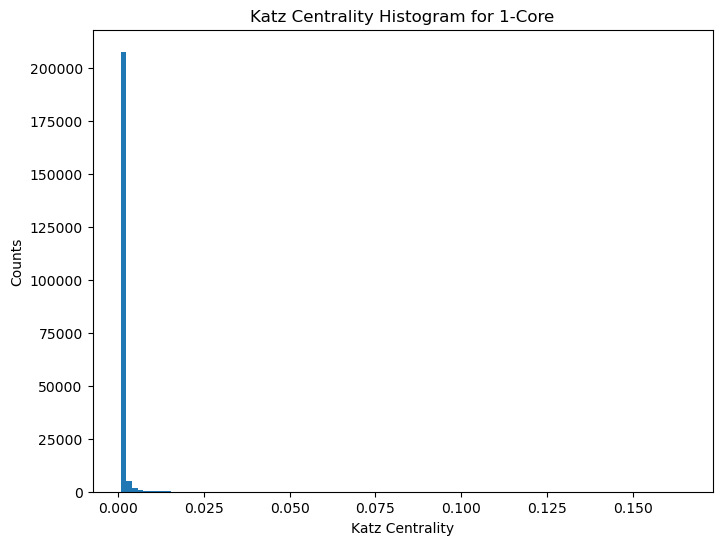

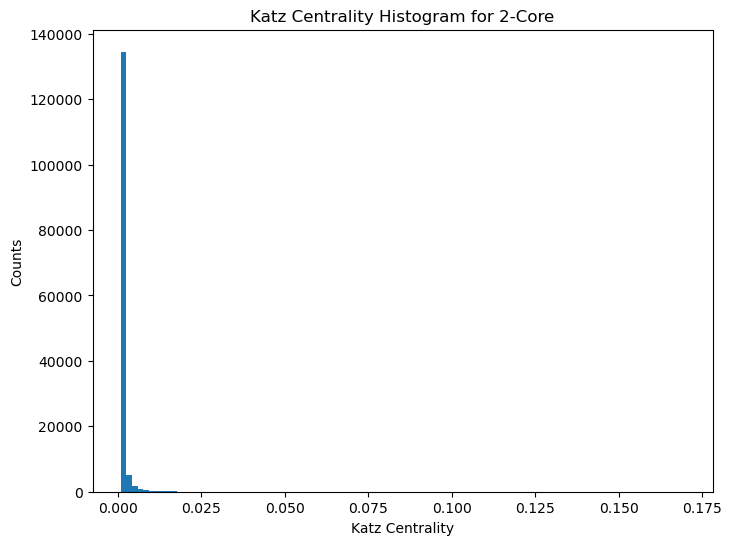

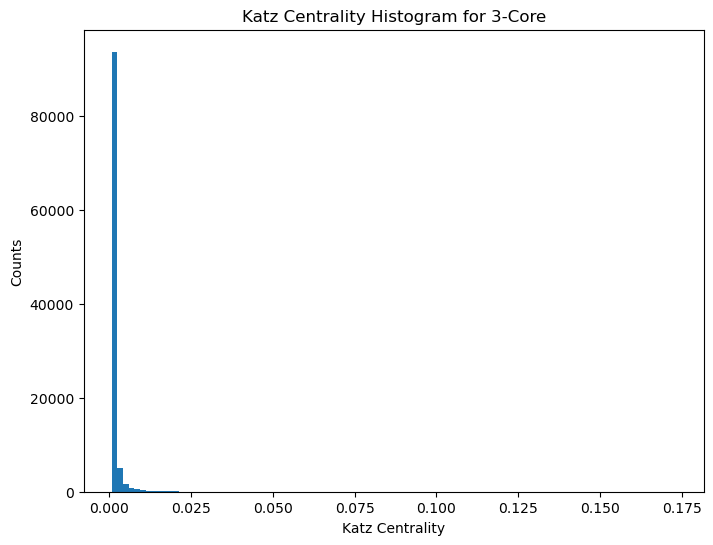

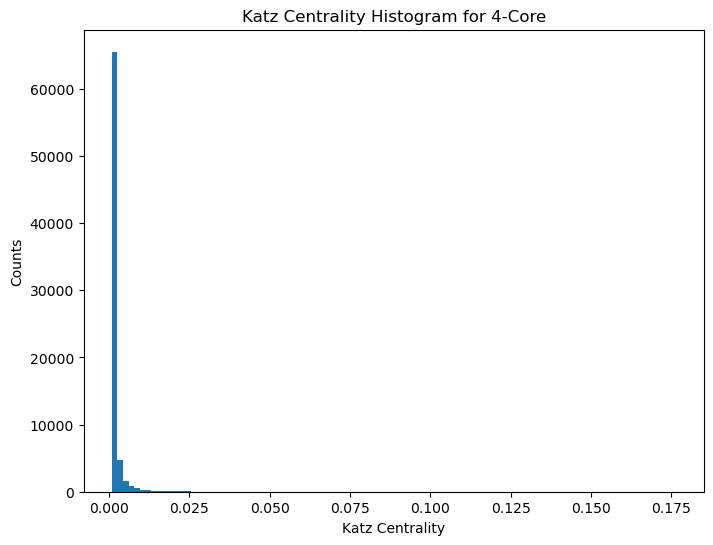

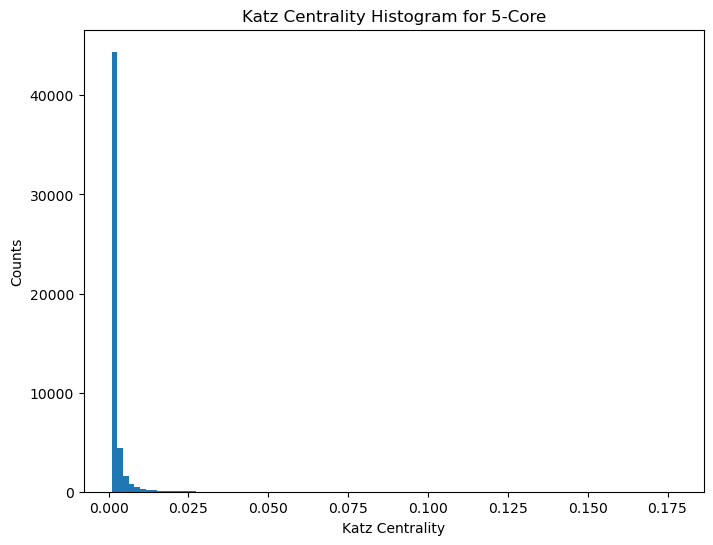

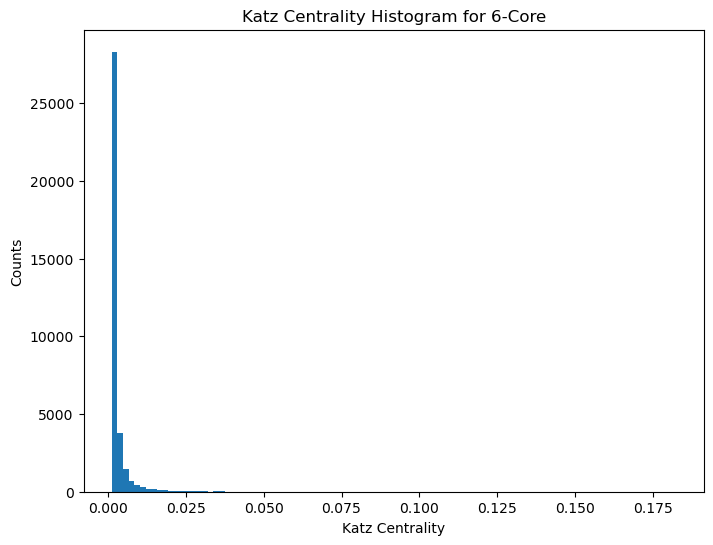

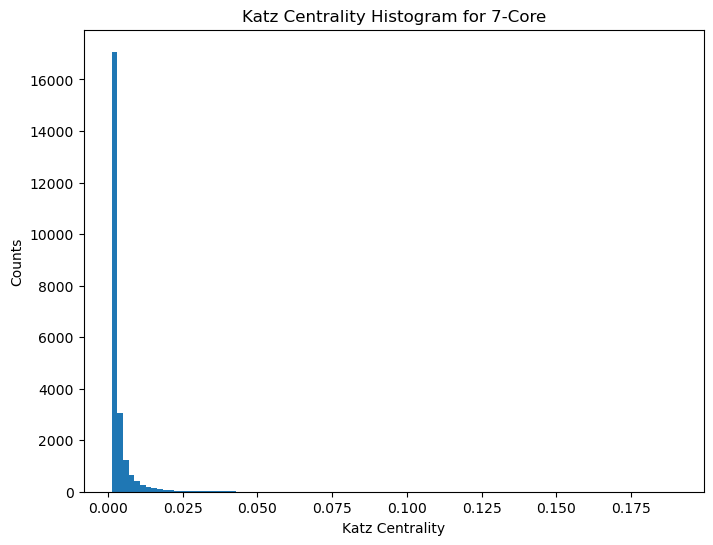

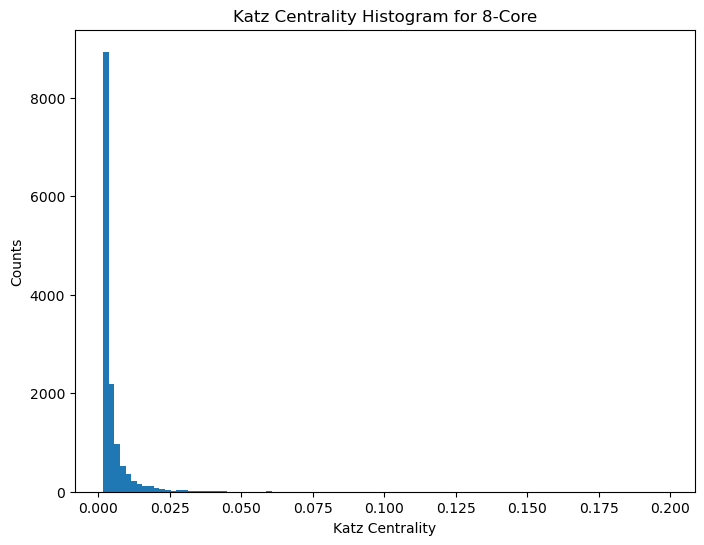

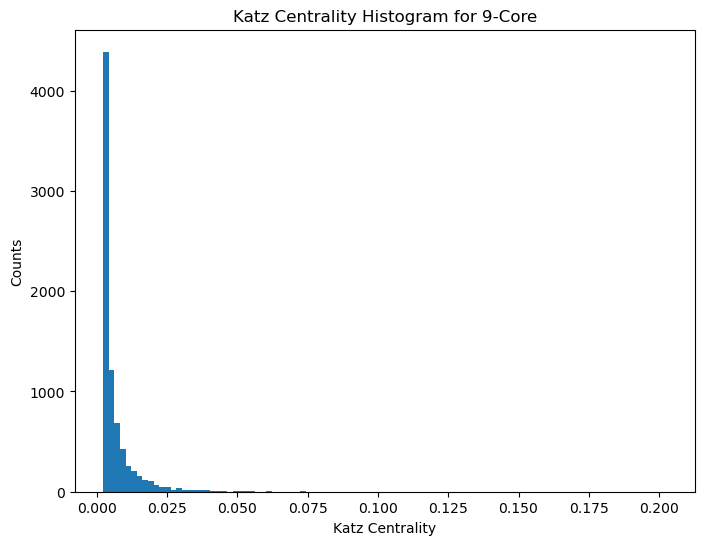

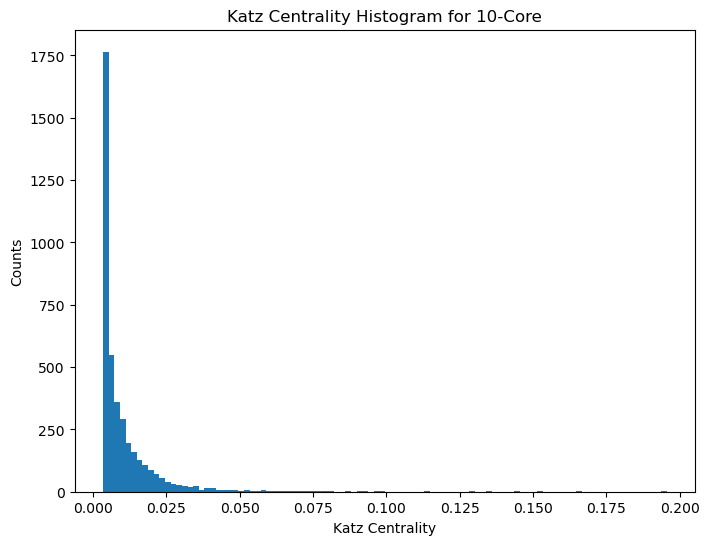

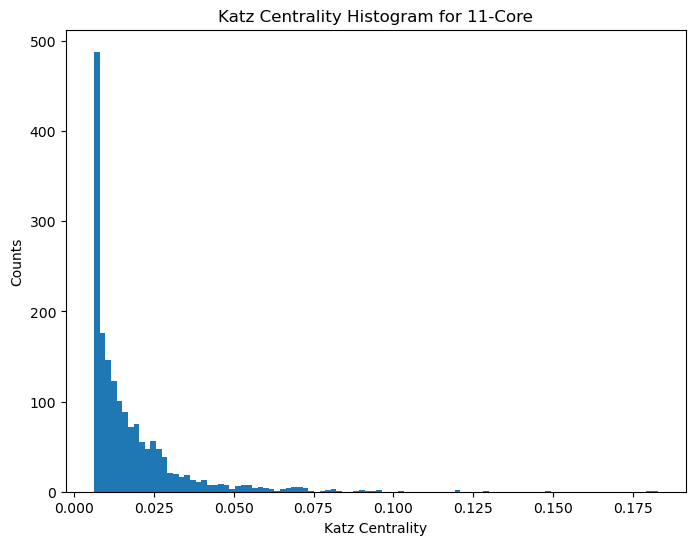

In [126]:
hist_cent_plotter2(core_deg, 'Katz')

### Back to normal

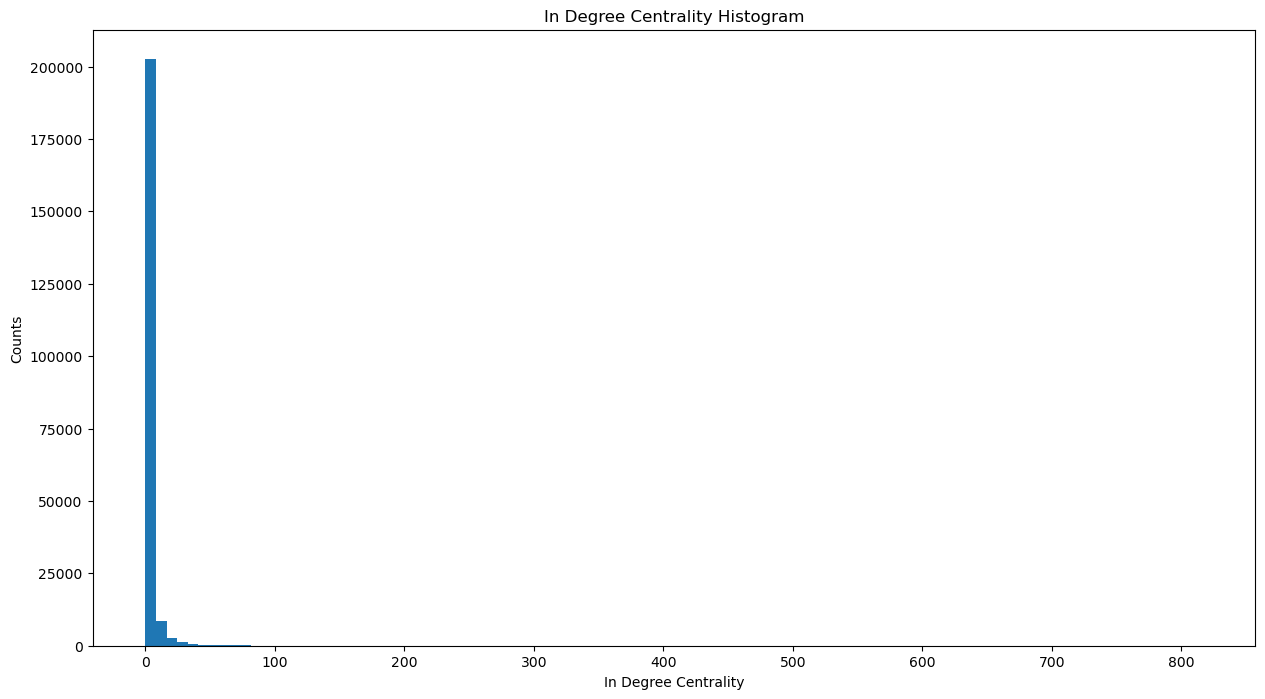

In [55]:
test = [v for _, v in core_deg[1]["In Degree"]]
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=100)
plt.title("In Degree Centrality Histogram")
plt.xlabel("In Degree Centrality")
plt.ylabel("Counts")
plt.show()

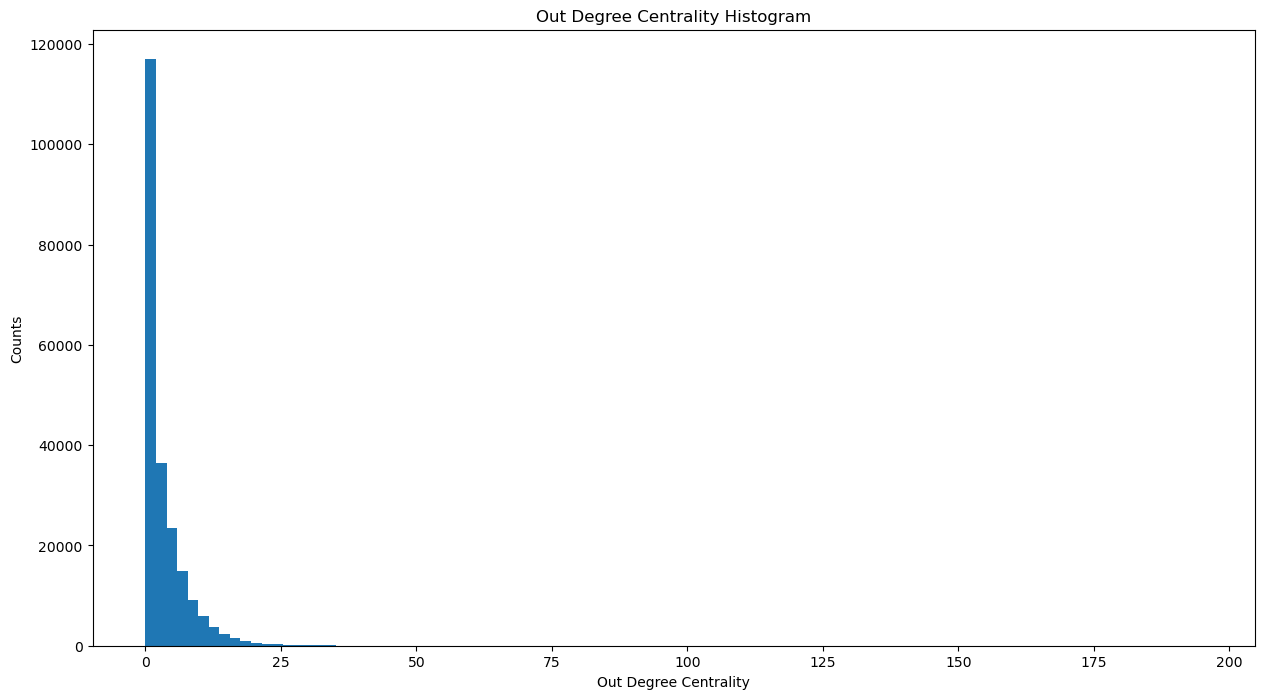

In [56]:
test = [v for _, v in core_deg[1]["Out Degree"]]
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=100)
plt.title("Out Degree Centrality Histogram")
plt.xlabel("Out Degree Centrality")
plt.ylabel("Counts")
plt.show()

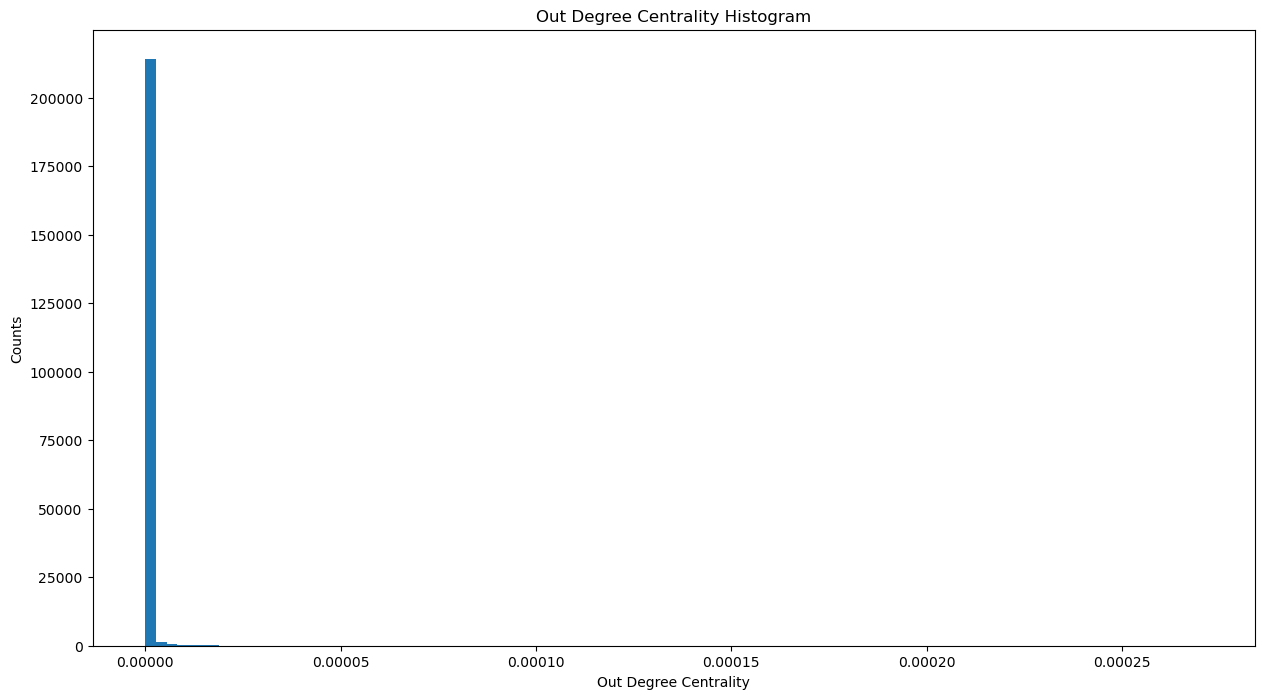

In [62]:
# test = [v for _, v in core_deg[1]["Betweenness"]]
test = list(core_deg[1]["Betweenness"].values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=100)
plt.title("Out Degree Centrality Histogram")
plt.xlabel("Out Degree Centrality")
plt.ylabel("Counts")
plt.show()

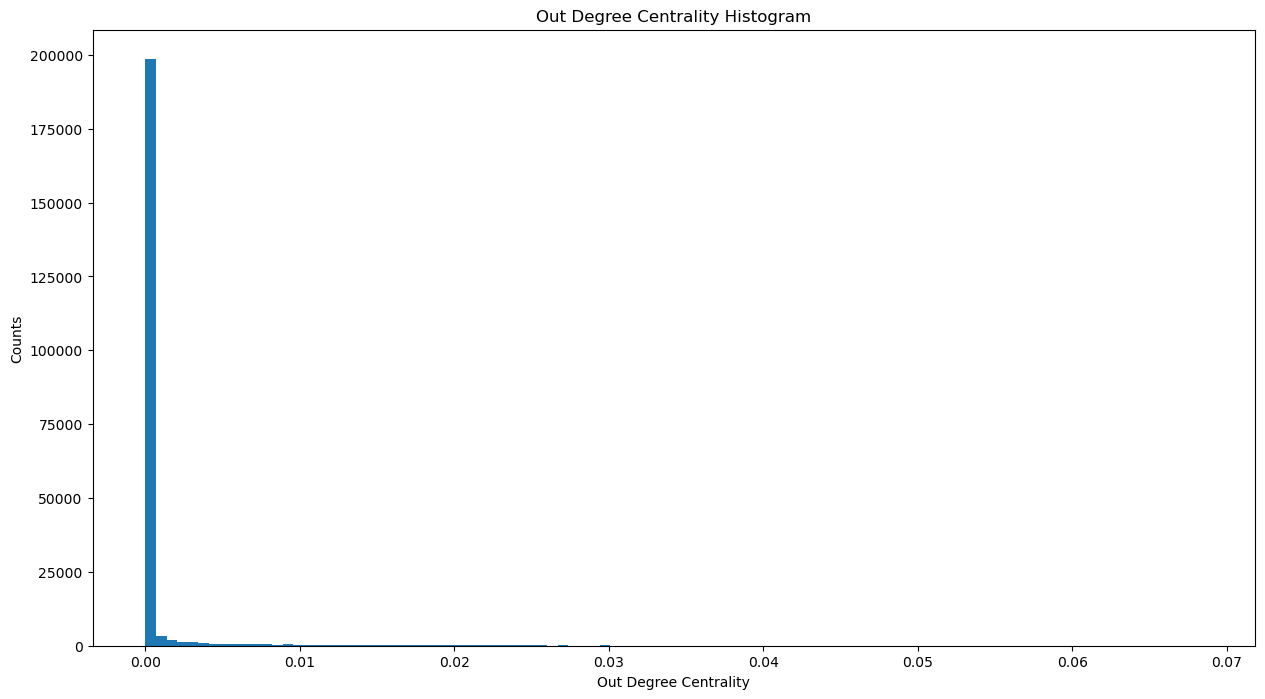

In [63]:
test = list(core_deg[1]["closeness"].values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=100)
plt.title("Out Degree Centrality Histogram")
plt.xlabel("Out Degree Centrality")
plt.ylabel("Counts")
plt.show()

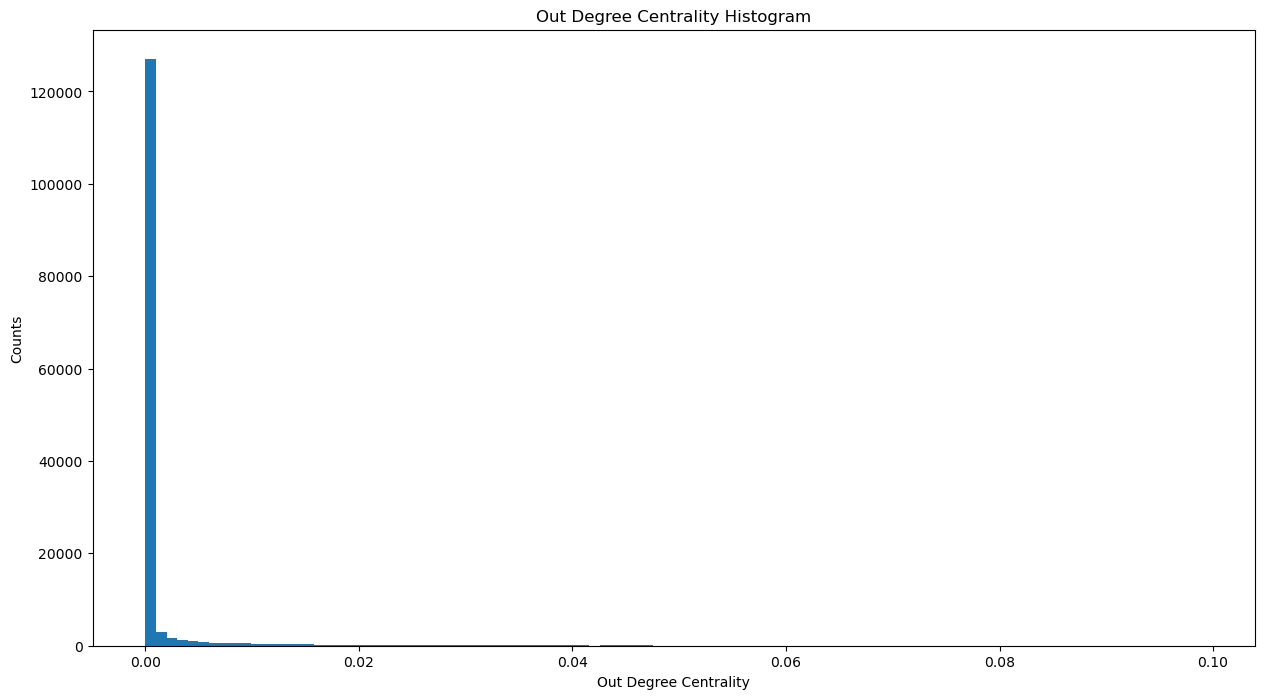

In [64]:
test = list(core_deg[2]["closeness"].values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=100)
plt.title("Out Degree Centrality Histogram")
plt.xlabel("Out Degree Centrality")
plt.ylabel("Counts")
plt.show()

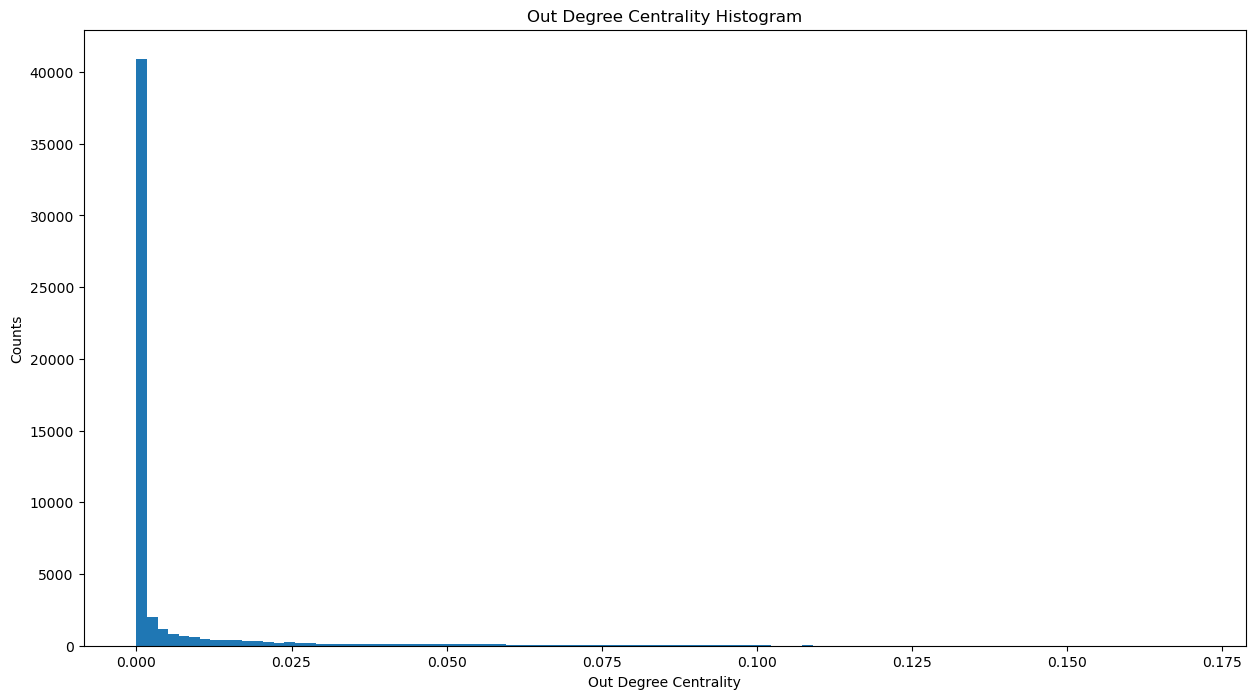

In [65]:
test = list(core_deg[5]["closeness"].values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=100)
plt.title("Out Degree Centrality Histogram")
plt.xlabel("Out Degree Centrality")
plt.ylabel("Counts")
plt.show()

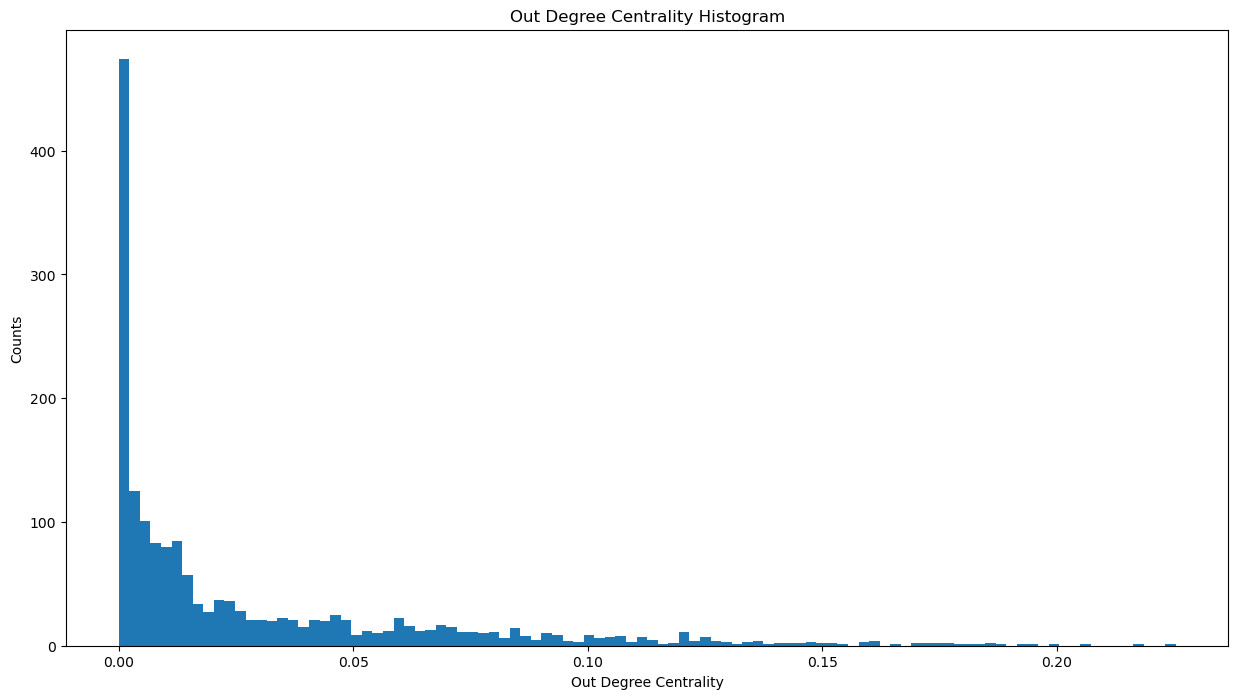

In [66]:
test = list(core_deg[11]["closeness"].values())
test2 = np.array(test)
plt.figure(figsize=(15, 8))
plt.hist(test2, bins=100)
plt.title("Out Degree Centrality Histogram")
plt.xlabel("Out Degree Centrality")
plt.ylabel("Counts")
plt.show()

In [68]:
nx.number_of_isolates(G)

412502

In [69]:
len(G.nodes)

629814

In [70]:
len(G.nodes) - 217312

412502

So we have about 400000 isolates. We should probably just look at 1 cores for serious analysis. I recognize they are technically data, but frankly this is a huge improvement in our ability to actually do useful analysis. May still be able to do something with them like look at how topic changes or whatever.

In [71]:
len(core_graphs[1].nodes)

217312

In [73]:
nx.flow_hierarchy(core_graphs[1])

0.995639815221756

In [76]:
nx.flow_hierarchy(core_graphs[11])

0.9901948218405537

Flow hierarchy is defined as the fraction of edges not participating in cycles in a directed graph.

Lets think about this. Citation networks can only ever point backwards in time. The end of a citation chain can never point back to the first. To some extent it's amazing we have cycles AT ALL. Could this be a case of citing a paper that hasn't come out yet? Is that even a common practice? ie "In an upcoming/companion paper yada yada ya"

In [77]:
nx.diameter(core_graphs[11])

NetworkXError: Found infinite path length because the digraph is not strongly connected

Compute the reciprocity in a directed graph.

The reciprocity of a directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph. Formally(see networkx page), 
.

The reciprocity of a single node u is defined similarly, it is the ratio of the number of edges in both directions to the total number of edges attached to node u.

In [80]:
nx.reciprocity(G)

0.003980763332711503

In [82]:
nx.reciprocity(core_graphs[1])

0.003980763332711503

In [83]:
nx.reciprocity(core_graphs[2])

0.004468944562369996

These would be papers referencing each other. Is this academic malfeasance? Or companion paper silliness.

can also try for other cores

#### Transitivity

Shows directional flow. Lack of triangles, see networkx page and lecture 3. This and reciprocity are related and also lecture 3 has good images for explaining it

can also try for other cores

In [13]:
nx.transitivity(one_core)

0.043069561049733536

In [89]:
baba = nx.minimum_edge_cut(core_graphs[5])

In [90]:
len(baba)

0

In [110]:
mec7 = nx.minimum_edge_cut(core_graphs[7])
print(len(mec7))
mec6 = nx.minimum_edge_cut(core_graphs[6])
print(len(mec6))

0
0


In [106]:
baba = nx.minimum_edge_cut(core_graphs[11])

In [107]:
baba

set()

In [103]:
baba = nx.minimum_node_cut(core_graphs[11])

In [104]:
len(baba)

0

In [101]:
baba = nx.minimum_node_cut(core_graphs[5])

In [102]:
len(baba)

0

In [114]:
mnc7 = nx.minimum_node_cut(core_graphs[7])
print(len(mnc7))
mnc6 = nx.minimum_node_cut(core_graphs[6])
print(len(mnc6))

0
0


In [8]:
G.remove_edges_from(nx.selfloop_edges(G))
one_core = nx.k_core(G, k=1)

#### Clustering

In [14]:
cluster_coefs = nx.clustering(one_core)

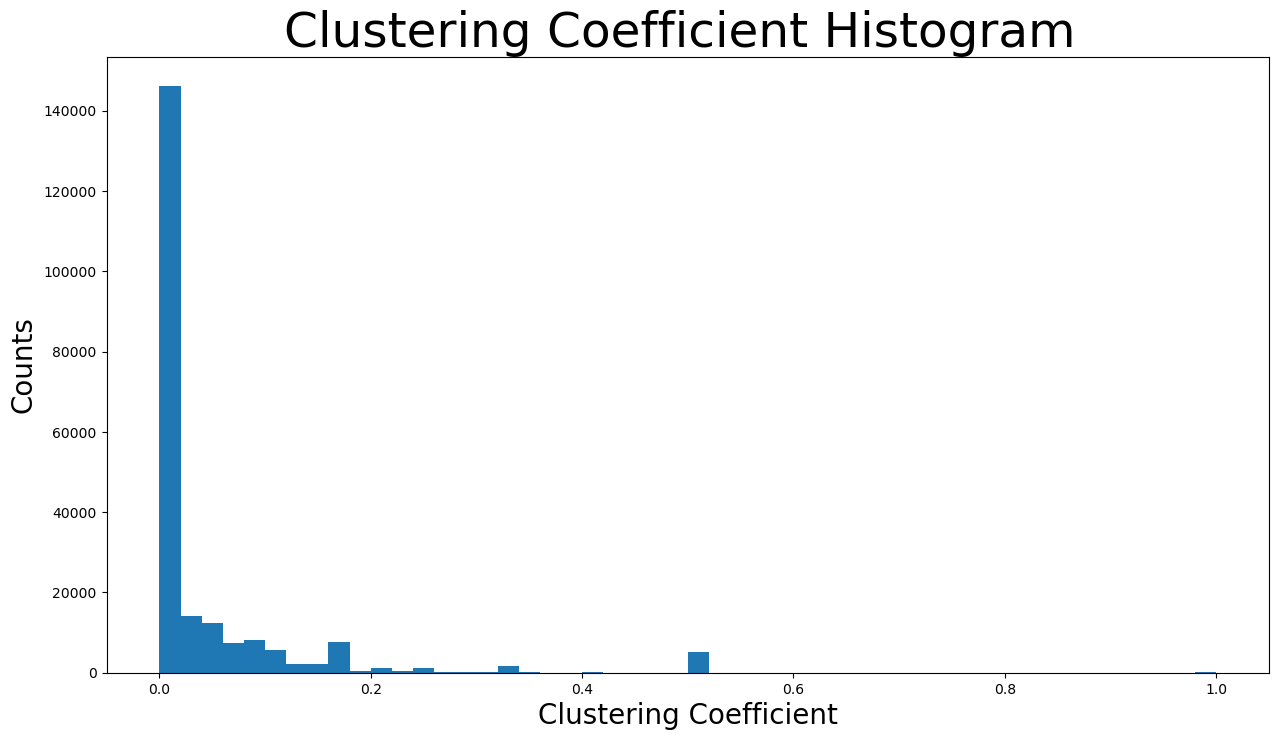

In [26]:
plt.figure(figsize=(15, 8))
plt.hist(cluster_coefs.values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})
plt.show()

In [31]:
print('Max Cluster Coef:', max(cluster_coefs.values()))
print('Min Cluster Coef:', min(cluster_coefs.values()))
print('Mean Cluster Coef:', np.mean([v for v in cluster_coefs.values()]))

Max Cluster Coef: 1.0
Min Cluster Coef: 0
Mean Cluster Coef: 0.04230367073440475


In [35]:
gn = nx.community.girvan_newman(one_core)

In [37]:
gn

<generator object girvan_newman at 0x000001D8603B7300>

In [38]:
tuple(sorted(c) for c in next(gn))

KeyboardInterrupt: 

In [24]:
two_clique = nx.community.k_clique_communities(one_core, 2)

AttributeError: module 'networkx' has no attribute 'k_clique_communities'